In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Load Data

In [ ]:
df_store = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sales Forcasting/store5.csv')
df_store

id        date  store_nbr                      family     sales  \
0         1452  2013-01-01          5                  AUTOMOTIVE     0.000   
1         1453  2013-01-01          5                   BABY CARE     0.000   
2         1454  2013-01-01          5                      BEAUTY     0.000   
3         1455  2013-01-01          5                   BEVERAGES     0.000   
4         1456  2013-01-01          5                       BOOKS     0.000   
...        ...         ...        ...                         ...       ...   
55567  3000586  2017-08-15          5                     POULTRY   241.011   
55568  3000587  2017-08-15          5              PREPARED FOODS    52.121   
55569  3000588  2017-08-15          5                     PRODUCE  1357.823   
55570  3000589  2017-08-15          5  SCHOOL AND OFFICE SUPPLIES     0.000   
55571  3000590  2017-08-15          5                     SEAFOOD     9.669   

       onpromotion  dcoilwtico  
0                0         NaN  
1                0         NaN  
2                0         NaN  
3                0         NaN  
4                0         NaN  
...            ...         ...  
55567            1       47.57  
55568            0       47.57  
55569            4       47.57  
55570            0       47.57  
55571            0       47.57  

[55572 rows x 7 columns]

In [ ]:
# df_store = pd.read_csv('store5.csv')
# df_store

Ambil Bakery

In [ ]:
df_bakery = df_store[df_store['family'] == 'BREAD/BAKERY']
df_bakery

id        date  store_nbr        family    sales  onpromotion  \
5         1457  2013-01-01          5  BREAD/BAKERY    0.000            0   
38        3239  2013-01-02          5  BREAD/BAKERY  566.917            0   
71        5021  2013-01-03          5  BREAD/BAKERY  377.887            0   
104       6803  2013-01-04          5  BREAD/BAKERY  335.761            0   
137       8585  2013-01-05          5  BREAD/BAKERY  402.286            0   
...        ...         ...        ...           ...      ...          ...   
55412  2993435  2017-08-11          5  BREAD/BAKERY  312.186            8   
55445  2995217  2017-08-12          5  BREAD/BAKERY  247.893            8   
55478  2996999  2017-08-13          5  BREAD/BAKERY  366.425            8   
55511  2998781  2017-08-14          5  BREAD/BAKERY  393.150            8   
55544  3000563  2017-08-15          5  BREAD/BAKERY  334.434            6   

       dcoilwtico  
5             NaN  
38          93.14  
71          92.97  
104         93.12  
137           NaN  
...           ...  
55412       48.81  
55445         NaN  
55478         NaN  
55511       47.59  
55544       47.57  

[1684 rows x 7 columns]

In [ ]:
df_bakery['store_nbr'].value_counts() # hanya ada 1 store

store_nbr
5    1684
Name: count, dtype: int64

Kelompokan hari bulan tahun dan weekdays

In [ ]:
# Membagi data berdasarkan tahun, bulan , hari dan hari dalam seminggu.
df_bakery['date'] = pd.to_datetime(df_bakery['date'])

<ipython-input-9-b0ef6e59c3b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bakery['date'] = pd.to_datetime(df_bakery['date'])


In [ ]:
# rubah tipe data
df_bakery.index = pd.to_datetime(df_bakery['date'], format = '%Y - %m - %d')

In [ ]:
# Membagi data berdasarkan tahun, bulan, hari dalam seminggu.
df_bakery['year'] = df_bakery.index.year
df_bakery['month'] = df_bakery.index.month
df_bakery['day'] = df_bakery.index.day
df_bakery['weekday'] = df_bakery.index.weekday
df_bakery

<ipython-input-11-c0f921e72693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bakery['year'] = df_bakery.index.year
<ipython-input-11-c0f921e72693>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bakery['month'] = df_bakery.index.month
<ipython-input-11-c0f921e72693>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

id       date  store_nbr        family    sales  onpromotion  \
date                                                                            
2013-01-01     1457 2013-01-01          5  BREAD/BAKERY    0.000            0   
2013-01-02     3239 2013-01-02          5  BREAD/BAKERY  566.917            0   
2013-01-03     5021 2013-01-03          5  BREAD/BAKERY  377.887            0   
2013-01-04     6803 2013-01-04          5  BREAD/BAKERY  335.761            0   
2013-01-05     8585 2013-01-05          5  BREAD/BAKERY  402.286            0   
...             ...        ...        ...           ...      ...          ...   
2017-08-11  2993435 2017-08-11          5  BREAD/BAKERY  312.186            8   
2017-08-12  2995217 2017-08-12          5  BREAD/BAKERY  247.893            8   
2017-08-13  2996999 2017-08-13          5  BREAD/BAKERY  366.425            8   
2017-08-14  2998781 2017-08-14          5  BREAD/BAKERY  393.150            8   
2017-08-15  3000563 2017-08-15          5  BREAD/BAKERY  334.434            6   

            dcoilwtico  year  month  day  weekday  
date                                               
2013-01-01         NaN  2013      1    1        1  
2013-01-02       93.14  2013      1    2        2  
2013-01-03       92.97  2013      1    3        3  
2013-01-04       93.12  2013      1    4        4  
2013-01-05         NaN  2013      1    5        5  
...                ...   ...    ...  ...      ...  
2017-08-11       48.81  2017      8   11        4  
2017-08-12         NaN  2017      8   12        5  
2017-08-13         NaN  2017      8   13        6  
2017-08-14       47.59  2017      8   14        0  
2017-08-15       47.57  2017      8   15        1  

[1684 rows x 11 columns]

# EDA

## Define Target Variable

In [ ]:
df_bakery.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1684 non-null   int64         
 1   date         1684 non-null   datetime64[ns]
 2   store_nbr    1684 non-null   int64         
 3   family       1684 non-null   object        
 4   sales        1684 non-null   float64       
 5   onpromotion  1684 non-null   int64         
 6   dcoilwtico   1163 non-null   float64       
 7   year         1684 non-null   int32         
 8   month        1684 non-null   int32         
 9   day          1684 non-null   int32         
 10  weekday      1684 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(3), object(1)
memory usage: 131.6+ KB


In [ ]:
df_bakery.describe()

id                           date  store_nbr        sales  \
count  1.684000e+03                           1684     1684.0  1684.000000   
mean   1.501010e+06  2015-04-24 08:27:04.703088128        5.0   381.742610   
min    1.457000e+03            2013-01-01 00:00:00        5.0     0.000000   
25%    7.512335e+05            2014-02-26 18:00:00        5.0   323.079500   
50%    1.501010e+06            2015-04-24 12:00:00        5.0   369.997500   
75%    2.250786e+06            2016-06-19 06:00:00        5.0   428.413250   
max    3.000563e+06            2017-08-15 00:00:00        5.0   802.359000   
std    8.665389e+05                            NaN        0.0    87.285337   

       onpromotion   dcoilwtico         year        month          day  \
count  1684.000000  1163.000000  1684.000000  1684.000000  1684.000000   
mean      1.987530    67.925589  2014.837886     6.207838    15.630048   
min       0.000000    26.190000  2013.000000     1.000000     1.000000   
25%       0.000000    46.390000  2014.000000     3.000000     8.000000   
50%       0.000000    53.330000  2015.000000     6.000000    16.000000   
75%       3.000000    95.790000  2016.000000     9.000000    23.000000   
max      21.000000   110.620000  2017.000000    12.000000    31.000000   
std       3.199705    25.677366     1.345917     3.386673     8.797400   

           weekday  
count  1684.000000  
mean      2.997031  
min       0.000000  
25%       1.000000  
50%       3.000000  
75%       5.000000  
max       6.000000  
std       2.001334

Sales sebagai variable target (gaada missing value)

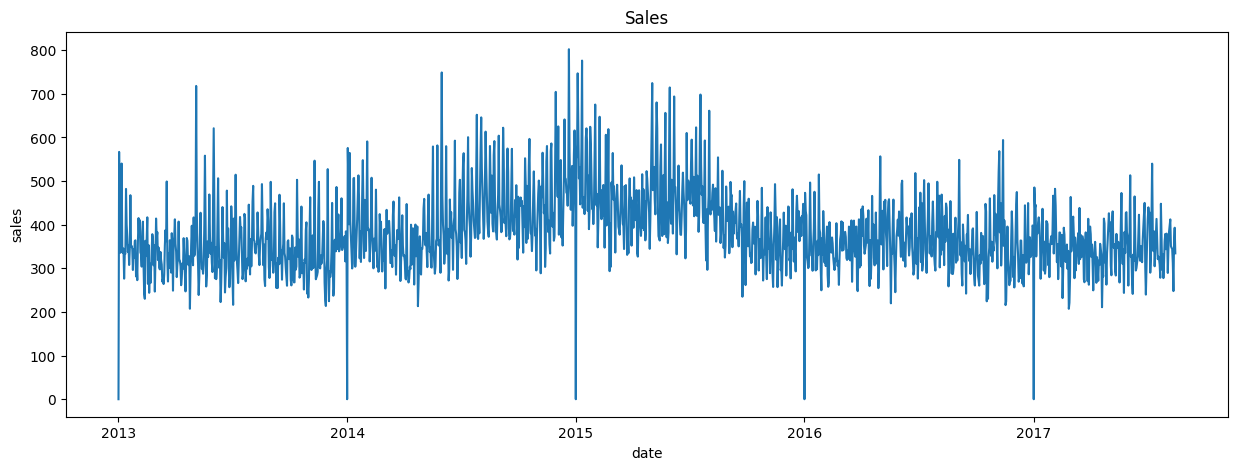

In [ ]:
# Seasonal Plot in one store (Store 5)
plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='sales', data = df_bakery)
plt.title('Sales')
plt.show()

<ipython-input-15-112936ac92f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='sales', data=df_bakery, palette='viridis')


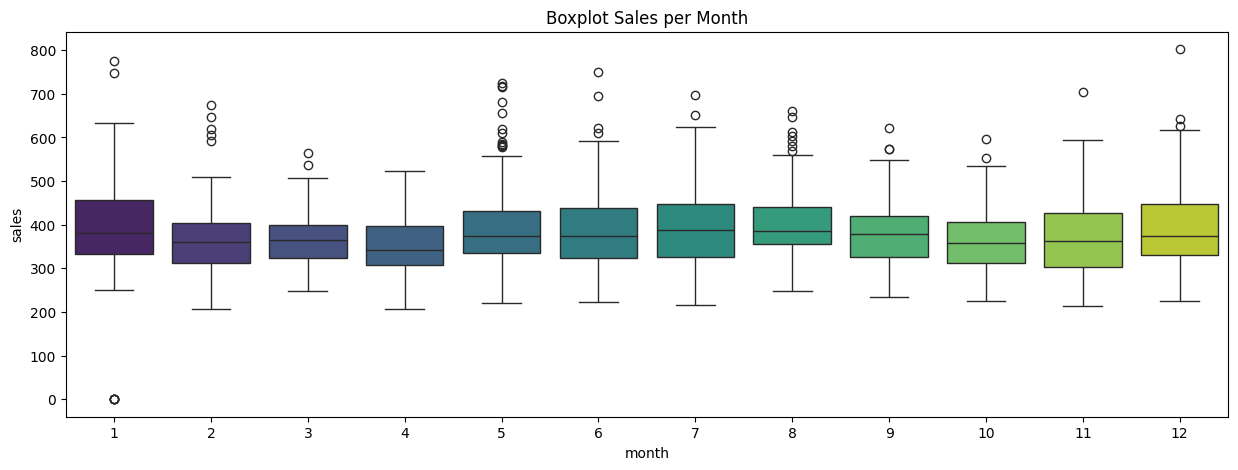

In [ ]:
# Visualisasi data berdasarkan bulan dengan boxplot

plt.figure(figsize=(15, 5))
sns.boxplot(x='month', y='sales', data=df_bakery, palette='viridis')
plt.title('Boxplot Sales per Month')
plt.show()

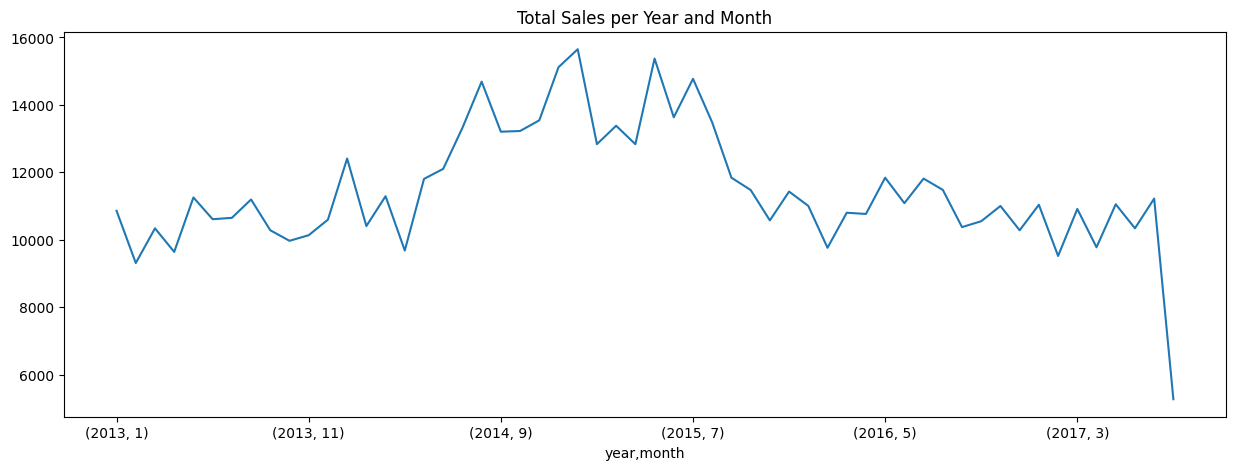

In [ ]:
# Membuat total sales per tahun dan per bulan
df_bakery.groupby(['year', 'month'])['sales'].sum()

# Membuat visualisasi data berdasarkan per tahun dan per bulan
plt.figure(figsize=(15,5))
df_bakery.groupby(['year', 'month'])['sales'].sum().plot()
plt.title('Total Sales per Year and Month')
plt.show()


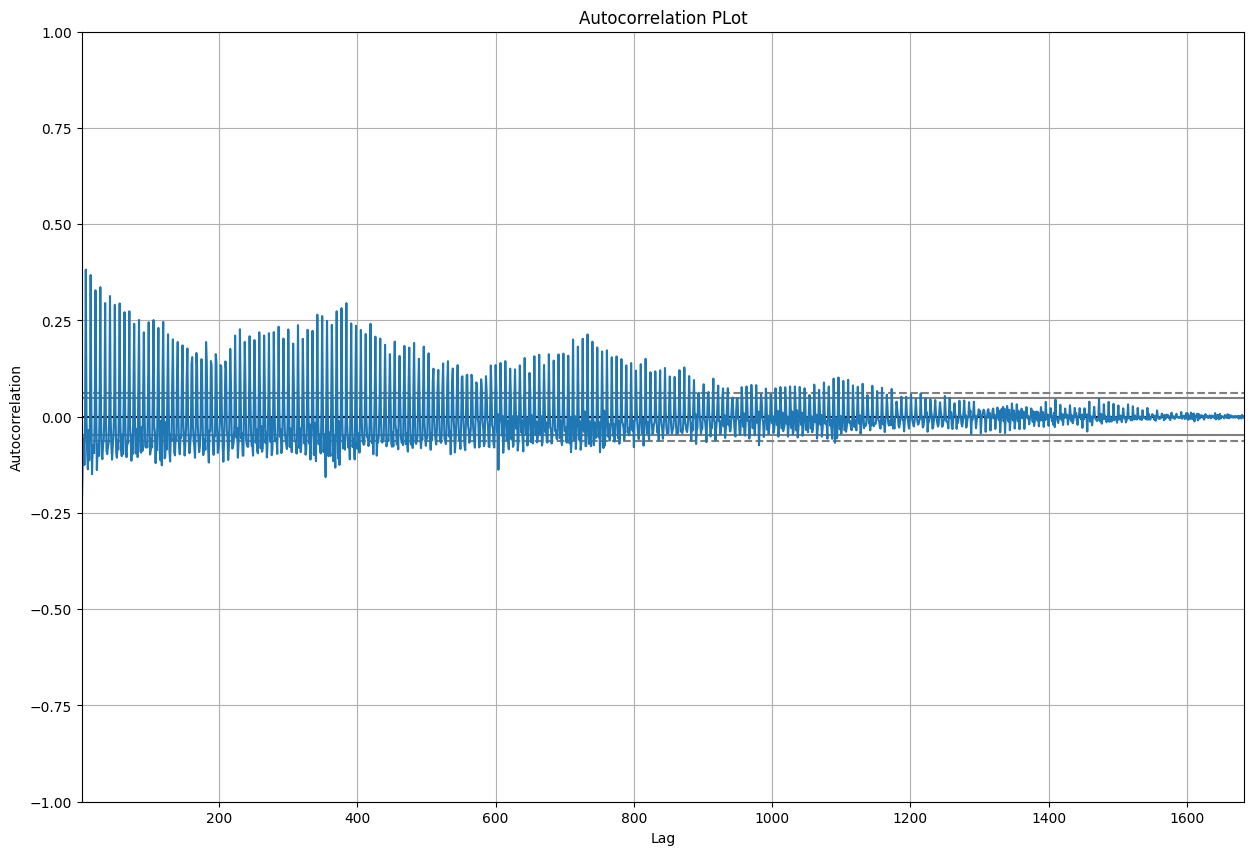

In [ ]:
# Autocorrelation Plot

plt.figure(figsize=(15, 10))
autocorrelation_plot(df_bakery['sales'].diff().dropna())

plt.title('Autocorrelation PLot')
plt.show()

## Explore Each Variables

promosi mulai dilakukan pada pertengahan 2014, menurun di awal 2016 dan meningkat kembali pada pertengahan 2016 pertengahan

Text(0.5, 1.0, 'Promotion')

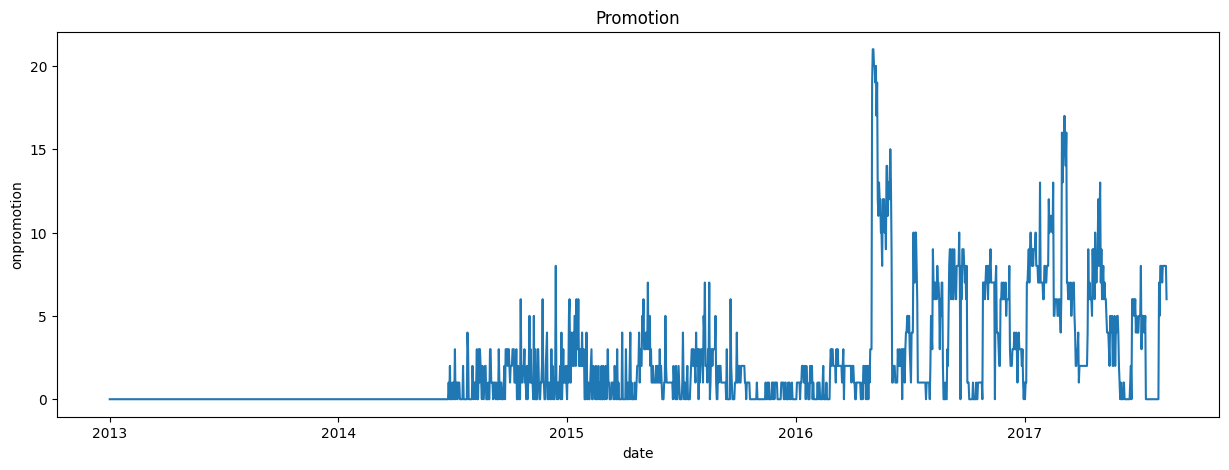

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='onpromotion', data = df_bakery)
plt.title('Promotion')

nilai dcoilwtico tinggi hingga akhir 2014, menurn hingga sekitar 1/3 dari rata rata sebelumnya semenjak 2015

Text(0.5, 1.0, 'Dcoilwtico')

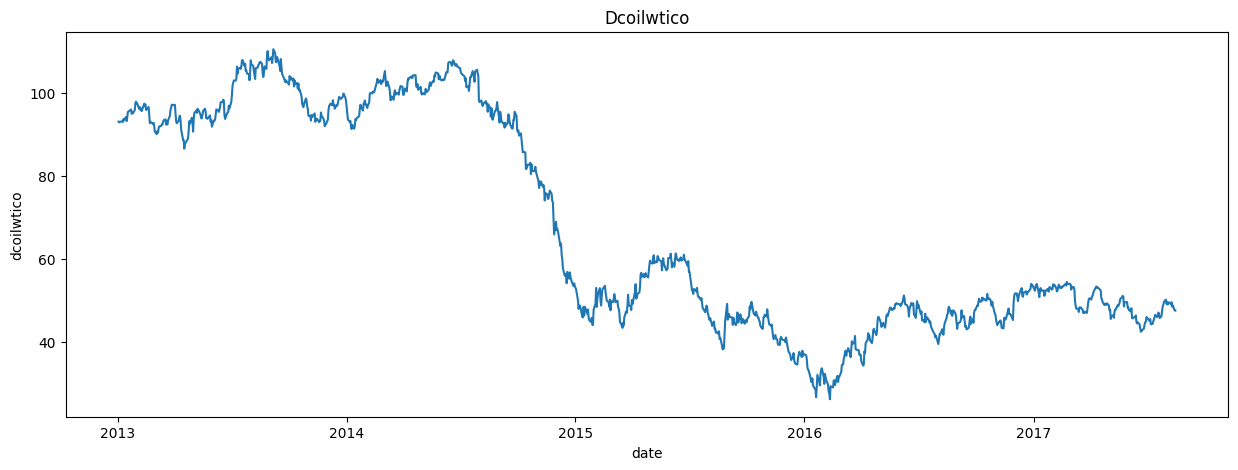

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='dcoilwtico', data = df_bakery)
plt.title('Dcoilwtico')

# Data Preprocessing

## Checking Missing Values

In [ ]:
df_bakery.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1684 non-null   int64         
 1   date         1684 non-null   datetime64[ns]
 2   store_nbr    1684 non-null   int64         
 3   family       1684 non-null   object        
 4   sales        1684 non-null   float64       
 5   onpromotion  1684 non-null   int64         
 6   dcoilwtico   1163 non-null   float64       
 7   year         1684 non-null   int32         
 8   month        1684 non-null   int32         
 9   day          1684 non-null   int32         
 10  weekday      1684 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(3), object(1)
memory usage: 131.6+ KB


## Handling Missing Values

Karena datanya naik turun maka mnggunakan interpolasi dengan moving average agar data lebih menyatu dengan data sesudah dan sebelumnya

In [ ]:
df_bakery['dcoilwtico'] = df_bakery['dcoilwtico'].fillna(df_bakery['dcoilwtico'].rolling(window=7, min_periods=1).mean())

<ipython-input-21-9d079b05abf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bakery['dcoilwtico'] = df_bakery['dcoilwtico'].fillna(df_bakery['dcoilwtico'].rolling(window=7, min_periods=1).mean())


In [ ]:
df_bakery.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1684 non-null   int64         
 1   date         1684 non-null   datetime64[ns]
 2   store_nbr    1684 non-null   int64         
 3   family       1684 non-null   object        
 4   sales        1684 non-null   float64       
 5   onpromotion  1684 non-null   int64         
 6   dcoilwtico   1683 non-null   float64       
 7   year         1684 non-null   int32         
 8   month        1684 non-null   int32         
 9   day          1684 non-null   int32         
 10  weekday      1684 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(3), object(1)
memory usage: 131.6+ KB


In [ ]:
df_bakery.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1684 entries, 2013-01-01 to 2017-08-15
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           1684 non-null   int64         
 1   date         1684 non-null   datetime64[ns]
 2   store_nbr    1684 non-null   int64         
 3   family       1684 non-null   object        
 4   sales        1684 non-null   float64       
 5   onpromotion  1684 non-null   int64         
 6   dcoilwtico   1683 non-null   float64       
 7   year         1684 non-null   int32         
 8   month        1684 non-null   int32         
 9   day          1684 non-null   int32         
 10  weekday      1684 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(3), object(1)
memory usage: 131.6+ KB


In [ ]:
df_bakery = df_bakery.dropna()

Text(0.5, 1.0, 'Dcoilwtico')

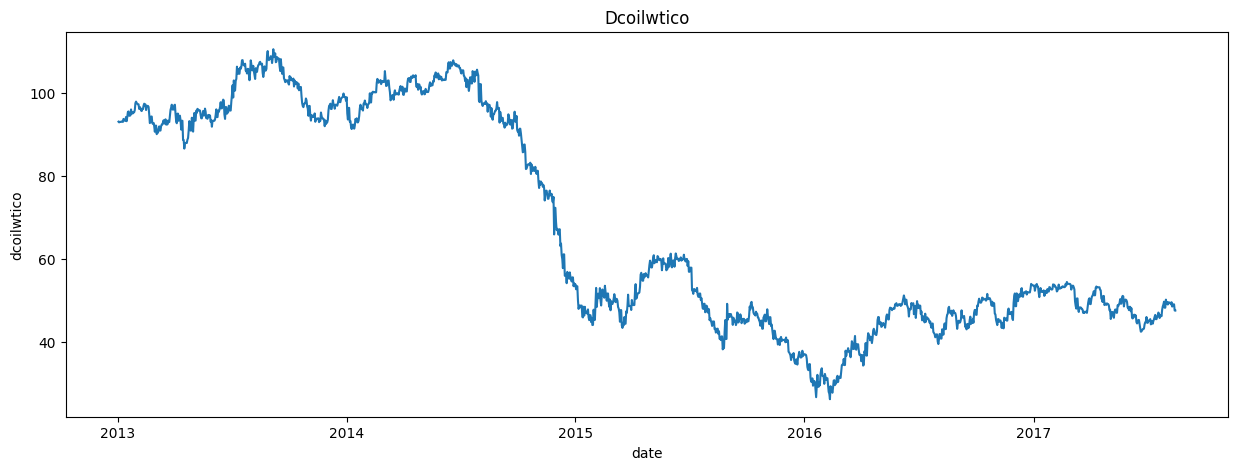

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='dcoilwtico', data = df_bakery)
plt.title('Dcoilwtico')

In [ ]:
df_bakery

id       date  store_nbr        family    sales  onpromotion  \
date                                                                            
2013-01-02     3239 2013-01-02          5  BREAD/BAKERY  566.917            0   
2013-01-03     5021 2013-01-03          5  BREAD/BAKERY  377.887            0   
2013-01-04     6803 2013-01-04          5  BREAD/BAKERY  335.761            0   
2013-01-05     8585 2013-01-05          5  BREAD/BAKERY  402.286            0   
2013-01-06    10367 2013-01-06          5  BREAD/BAKERY  540.281            0   
...             ...        ...        ...           ...      ...          ...   
2017-08-11  2993435 2017-08-11          5  BREAD/BAKERY  312.186            8   
2017-08-12  2995217 2017-08-12          5  BREAD/BAKERY  247.893            8   
2017-08-13  2996999 2017-08-13          5  BREAD/BAKERY  366.425            8   
2017-08-14  2998781 2017-08-14          5  BREAD/BAKERY  393.150            8   
2017-08-15  3000563 2017-08-15          5  BREAD/BAKERY  334.434            6   

            dcoilwtico  year  month  day  weekday  
date                                               
2013-01-02   93.140000  2013      1    2        2  
2013-01-03   92.970000  2013      1    3        3  
2013-01-04   93.120000  2013      1    4        4  
2013-01-05   93.076667  2013      1    5        5  
2013-01-06   93.076667  2013      1    6        6  
...                ...   ...    ...  ...      ...  
2017-08-11   48.810000  2017      8   11        4  
2017-08-12   49.076000  2017      8   12        5  
2017-08-13   49.076000  2017      8   13        6  
2017-08-14   47.590000  2017      8   14        0  
2017-08-15   47.570000  2017      8   15        1  

[1683 rows x 11 columns]

## Feature Engineering / New Features

## Stationarity Data

Cek stasioner variable target

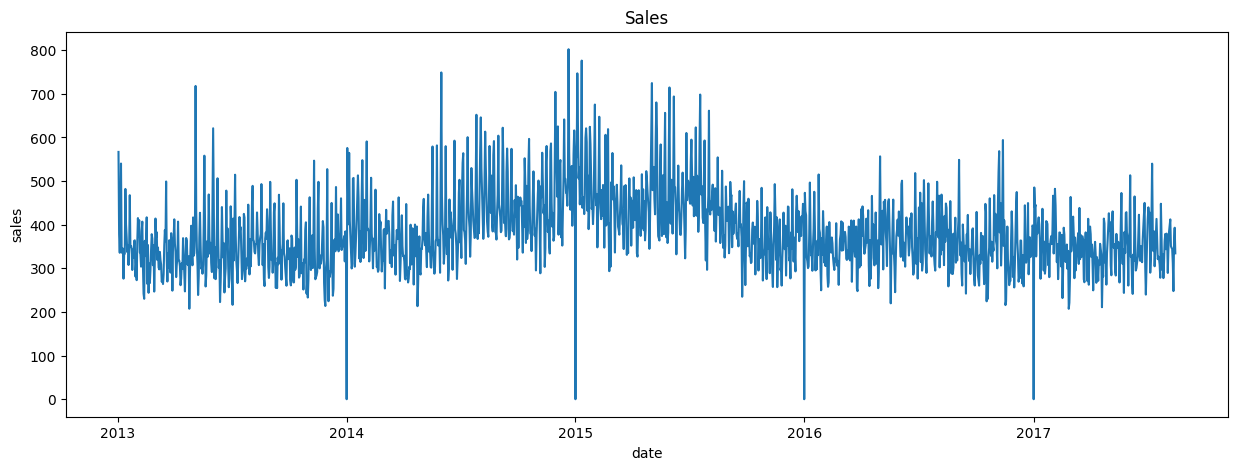

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='sales', data = df_bakery)
plt.title('Sales')
plt.show()

In [ ]:
# check p-value (kurang dari 0.05 atau lebih dari 0,05)

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_bakery['sales'].dropna())
print('ADF Statistic: %f' %result[0])
print('p-value: %f' %result[1])

ADF Statistic: -2.468407
p-value: 0.123352


Belum stasioner, di differencing dlu

In [ ]:
# Differencing p-value agar kurang dari 0,05

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_bakery['sales'].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' %result [1])

ADF Statistic: -11.450510
p-value: 0.000000


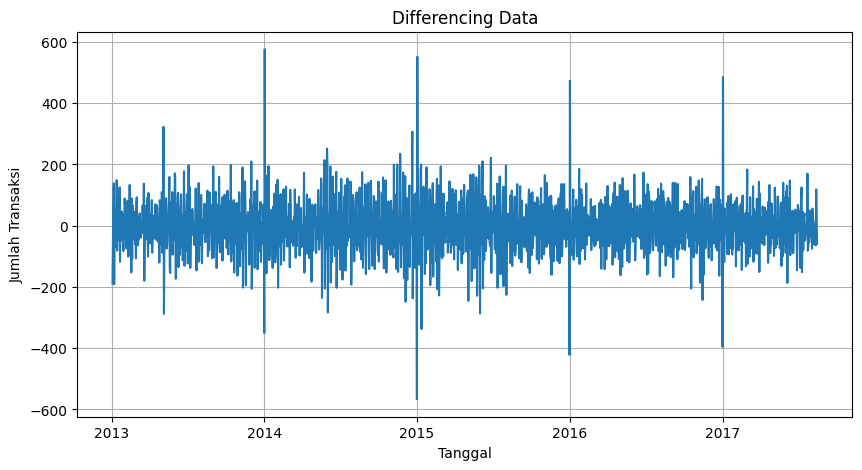

In [ ]:
# Plot data setelah differencing

plt.figure(figsize=(10, 5))
plt.plot(df_bakery['sales'].diff().dropna())
plt.title('Differencing Data')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Transaksi')
plt.grid(True)
plt.show()

## Correlation

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

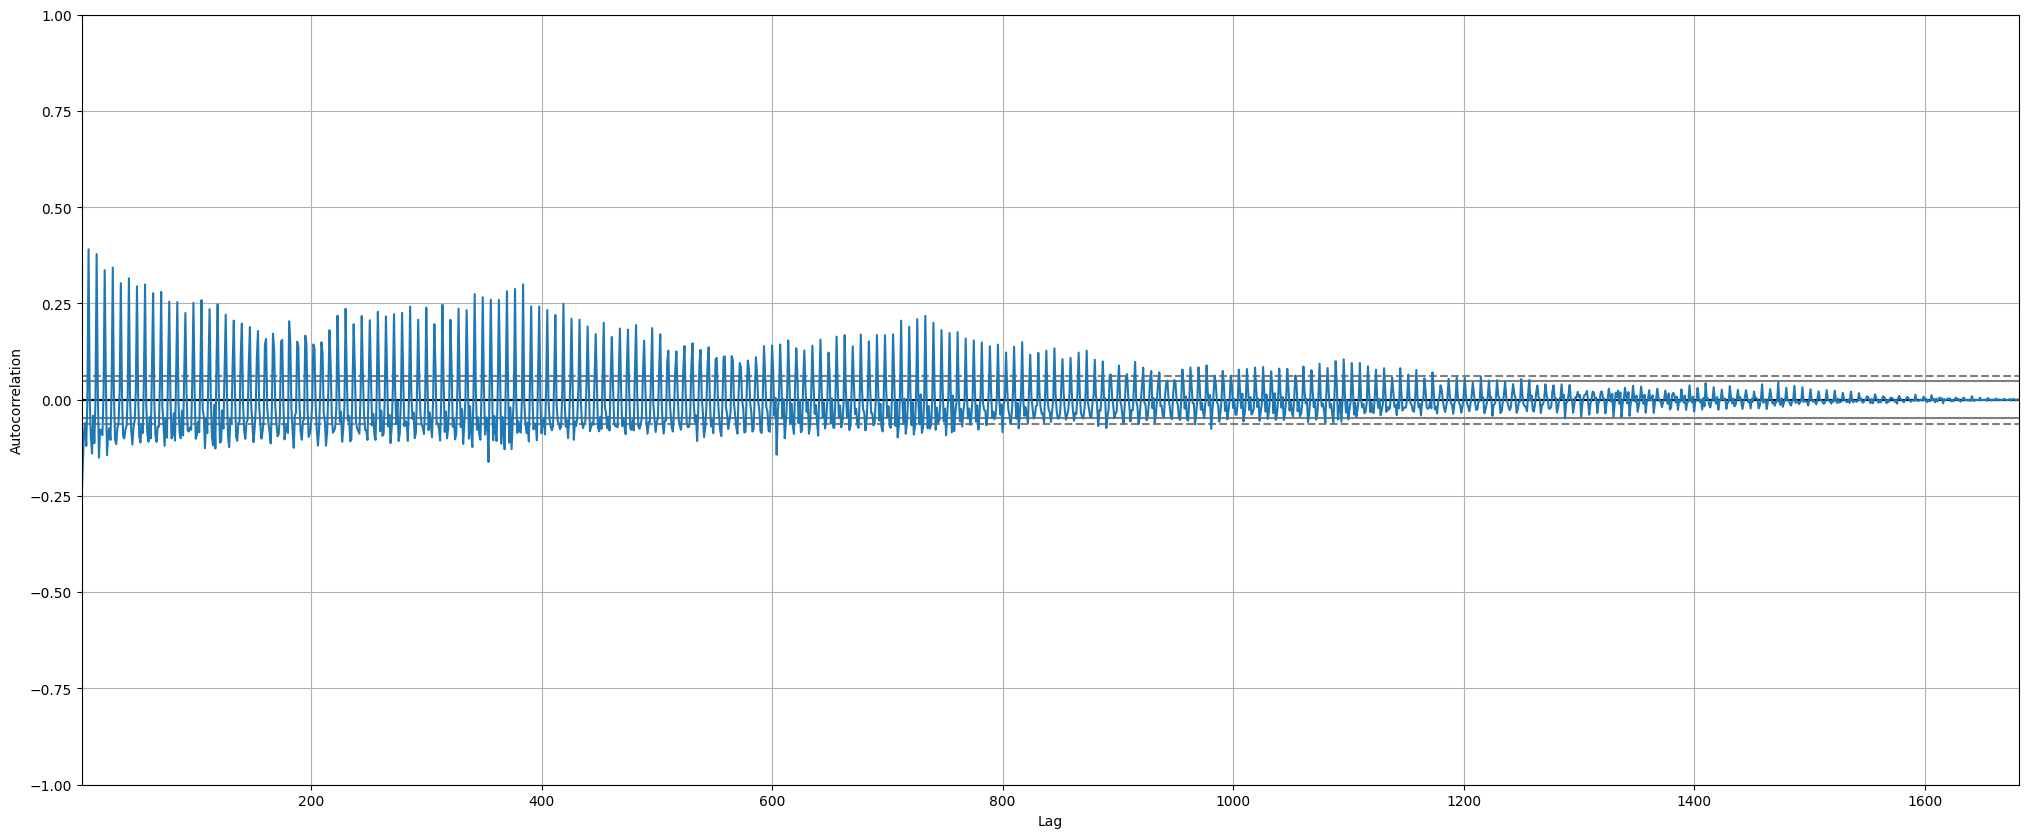

In [ ]:
plt.figure(figsize = (25,10))
autocorrelation_plot(df_bakery['sales'].diff().dropna())

<Figure size 2500x1500 with 0 Axes>

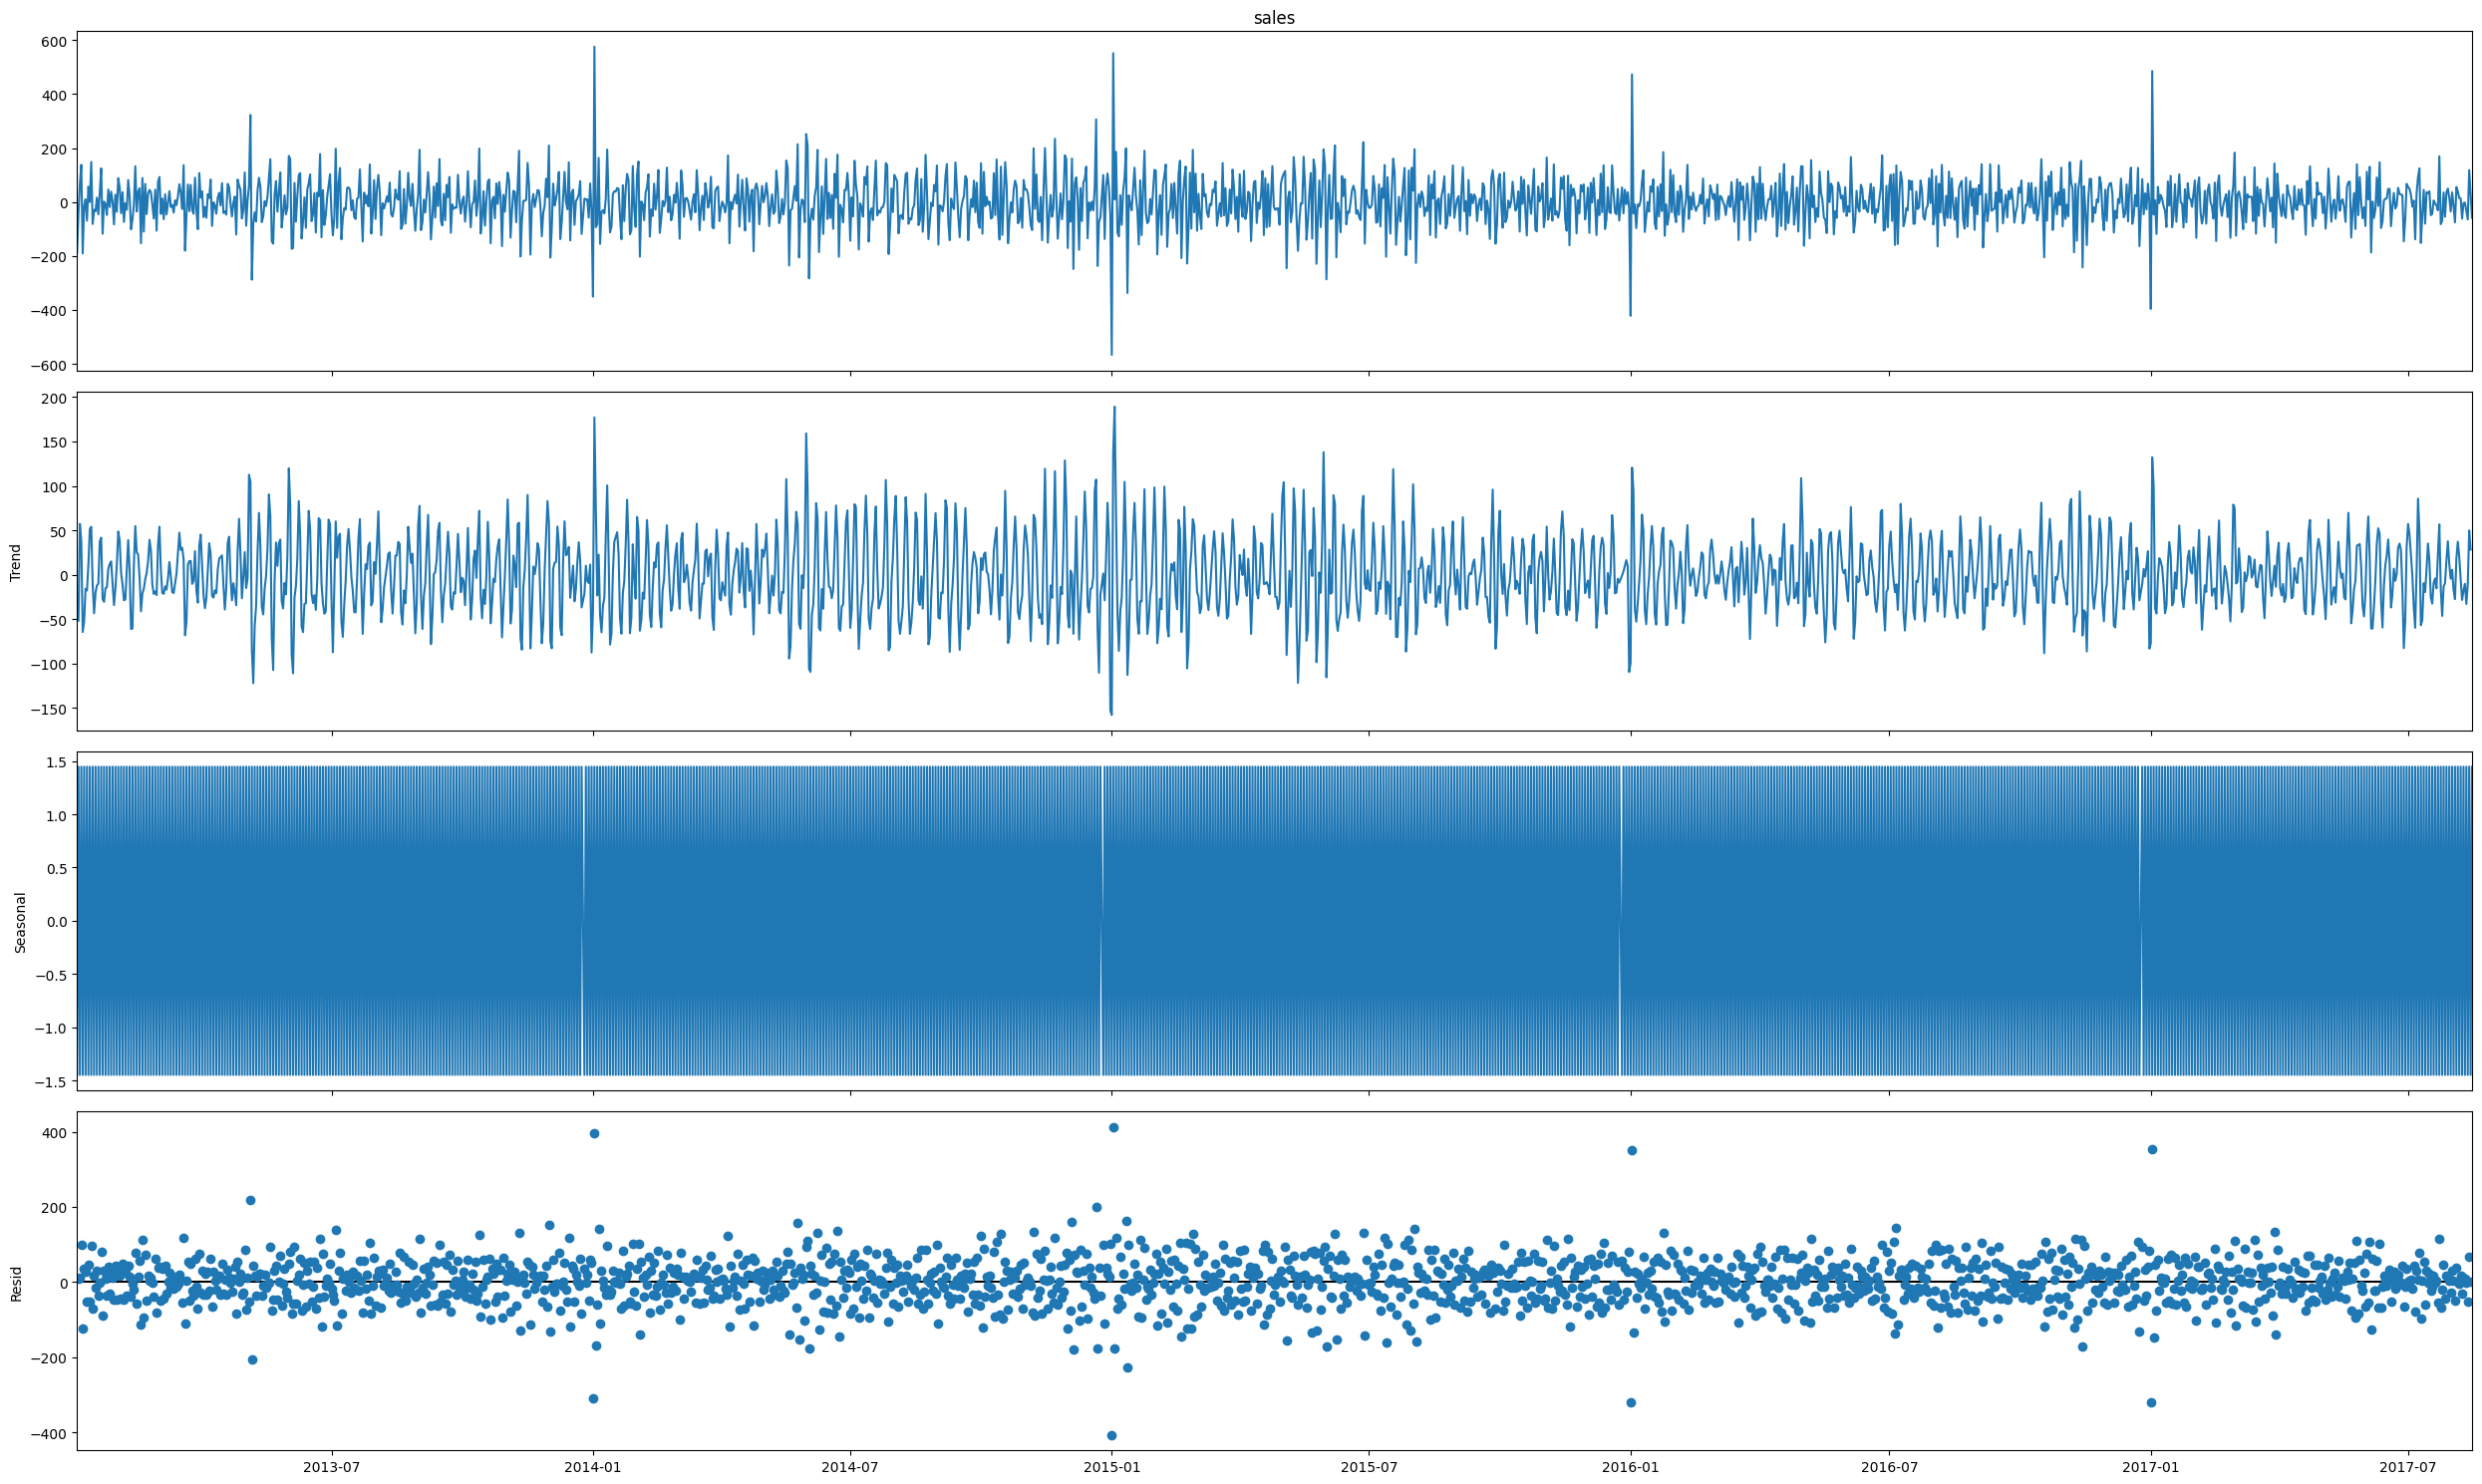

In [ ]:
# Decompose Time Series

# Make Fig Size Bigger
plt.rcParams['figure.figsize'] = (25,15)

# Decompose Time Series
decomposition = seasonal_decompose(df_bakery['sales'].diff().dropna(), model = 'additive', period = 2)
fig = plt.figure()
fig = decomposition.plot()

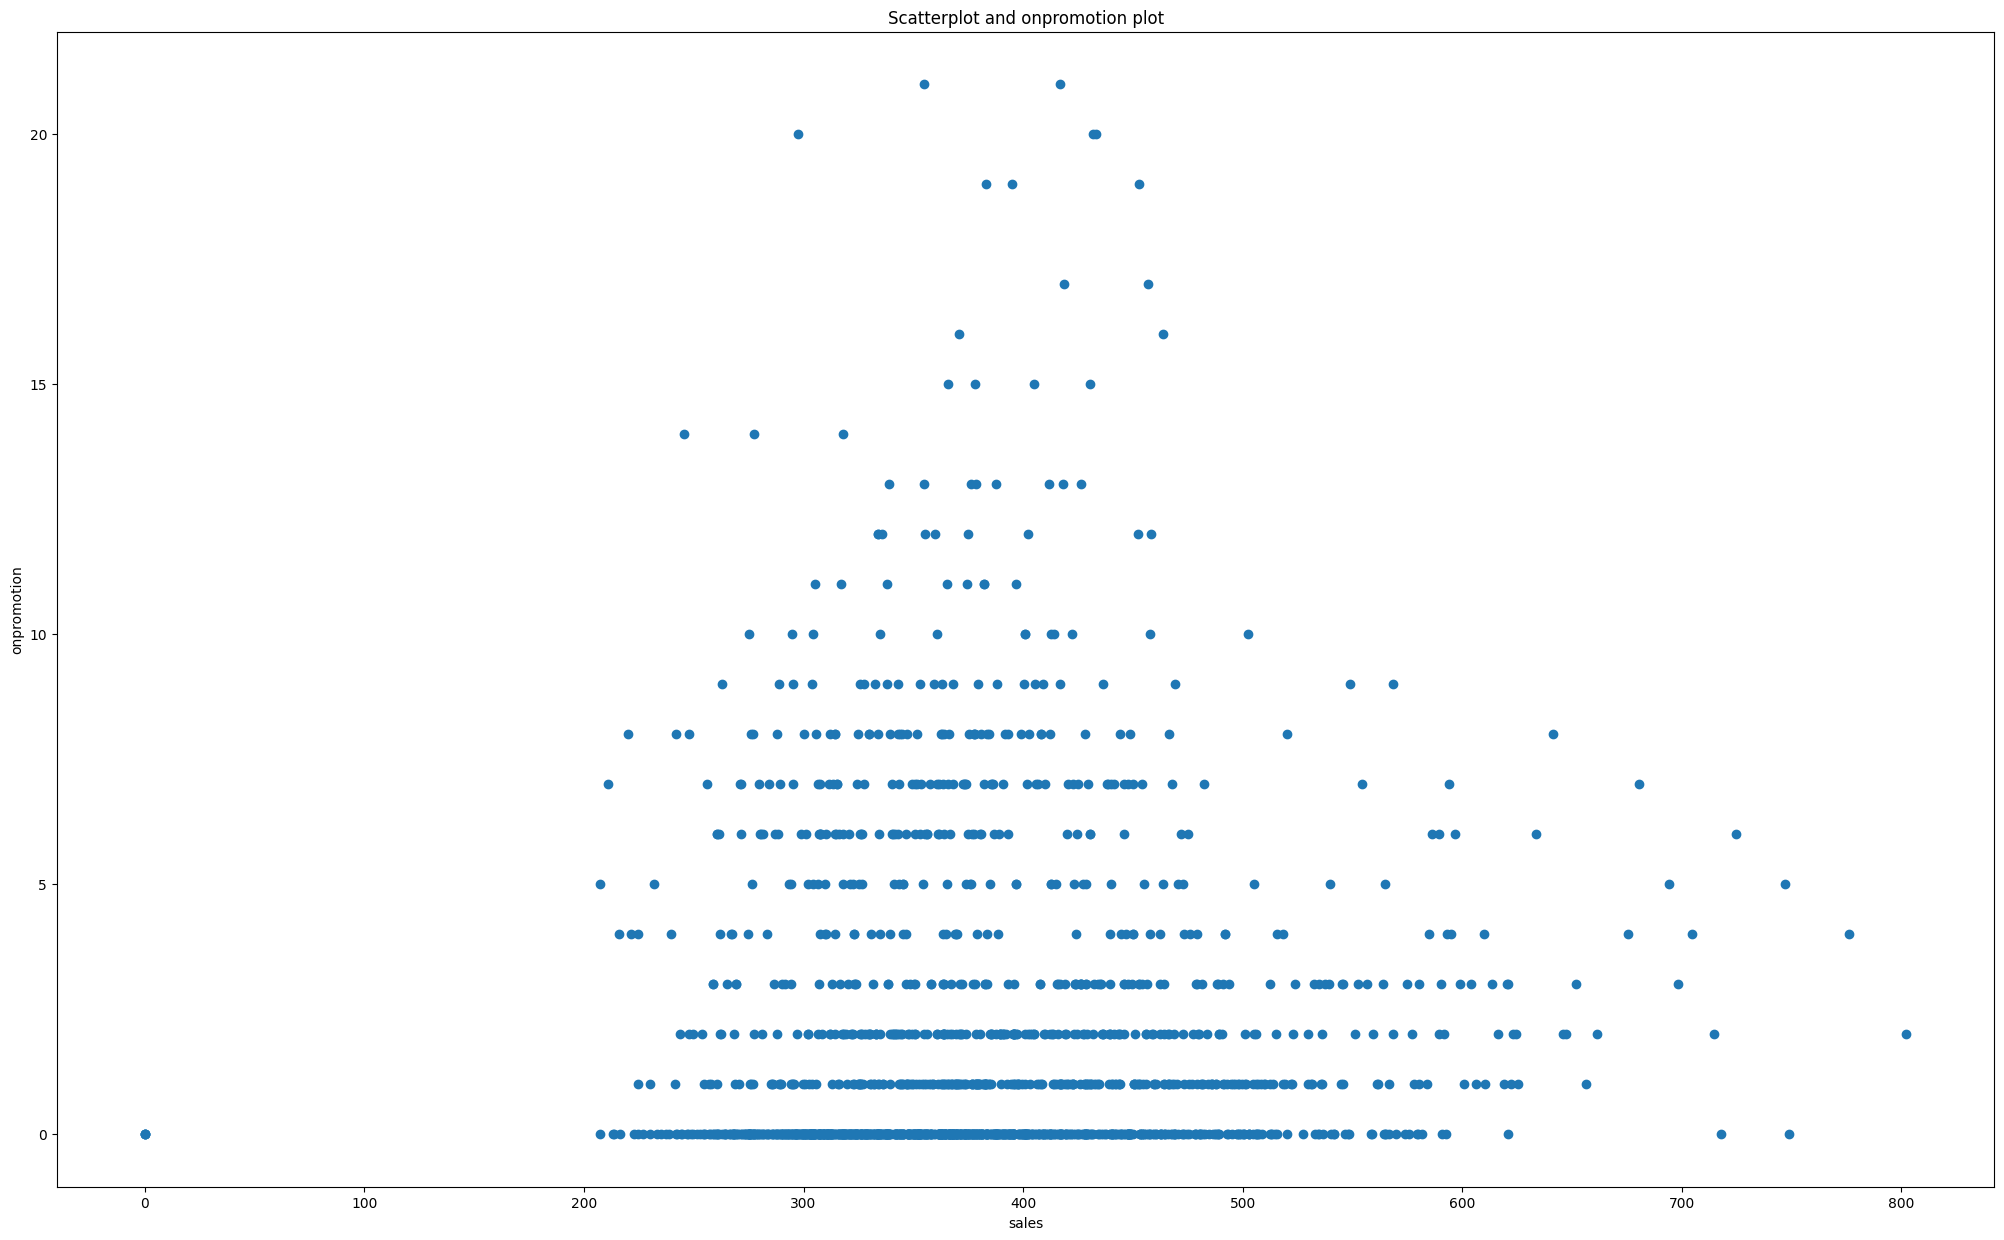

In [ ]:
plt.scatter(x = df_bakery['sales'], y = df_bakery['onpromotion'])
plt.xlabel('sales')
plt.ylabel('onpromotion')
plt.title('Scatterplot and onpromotion plot')
plt.show()

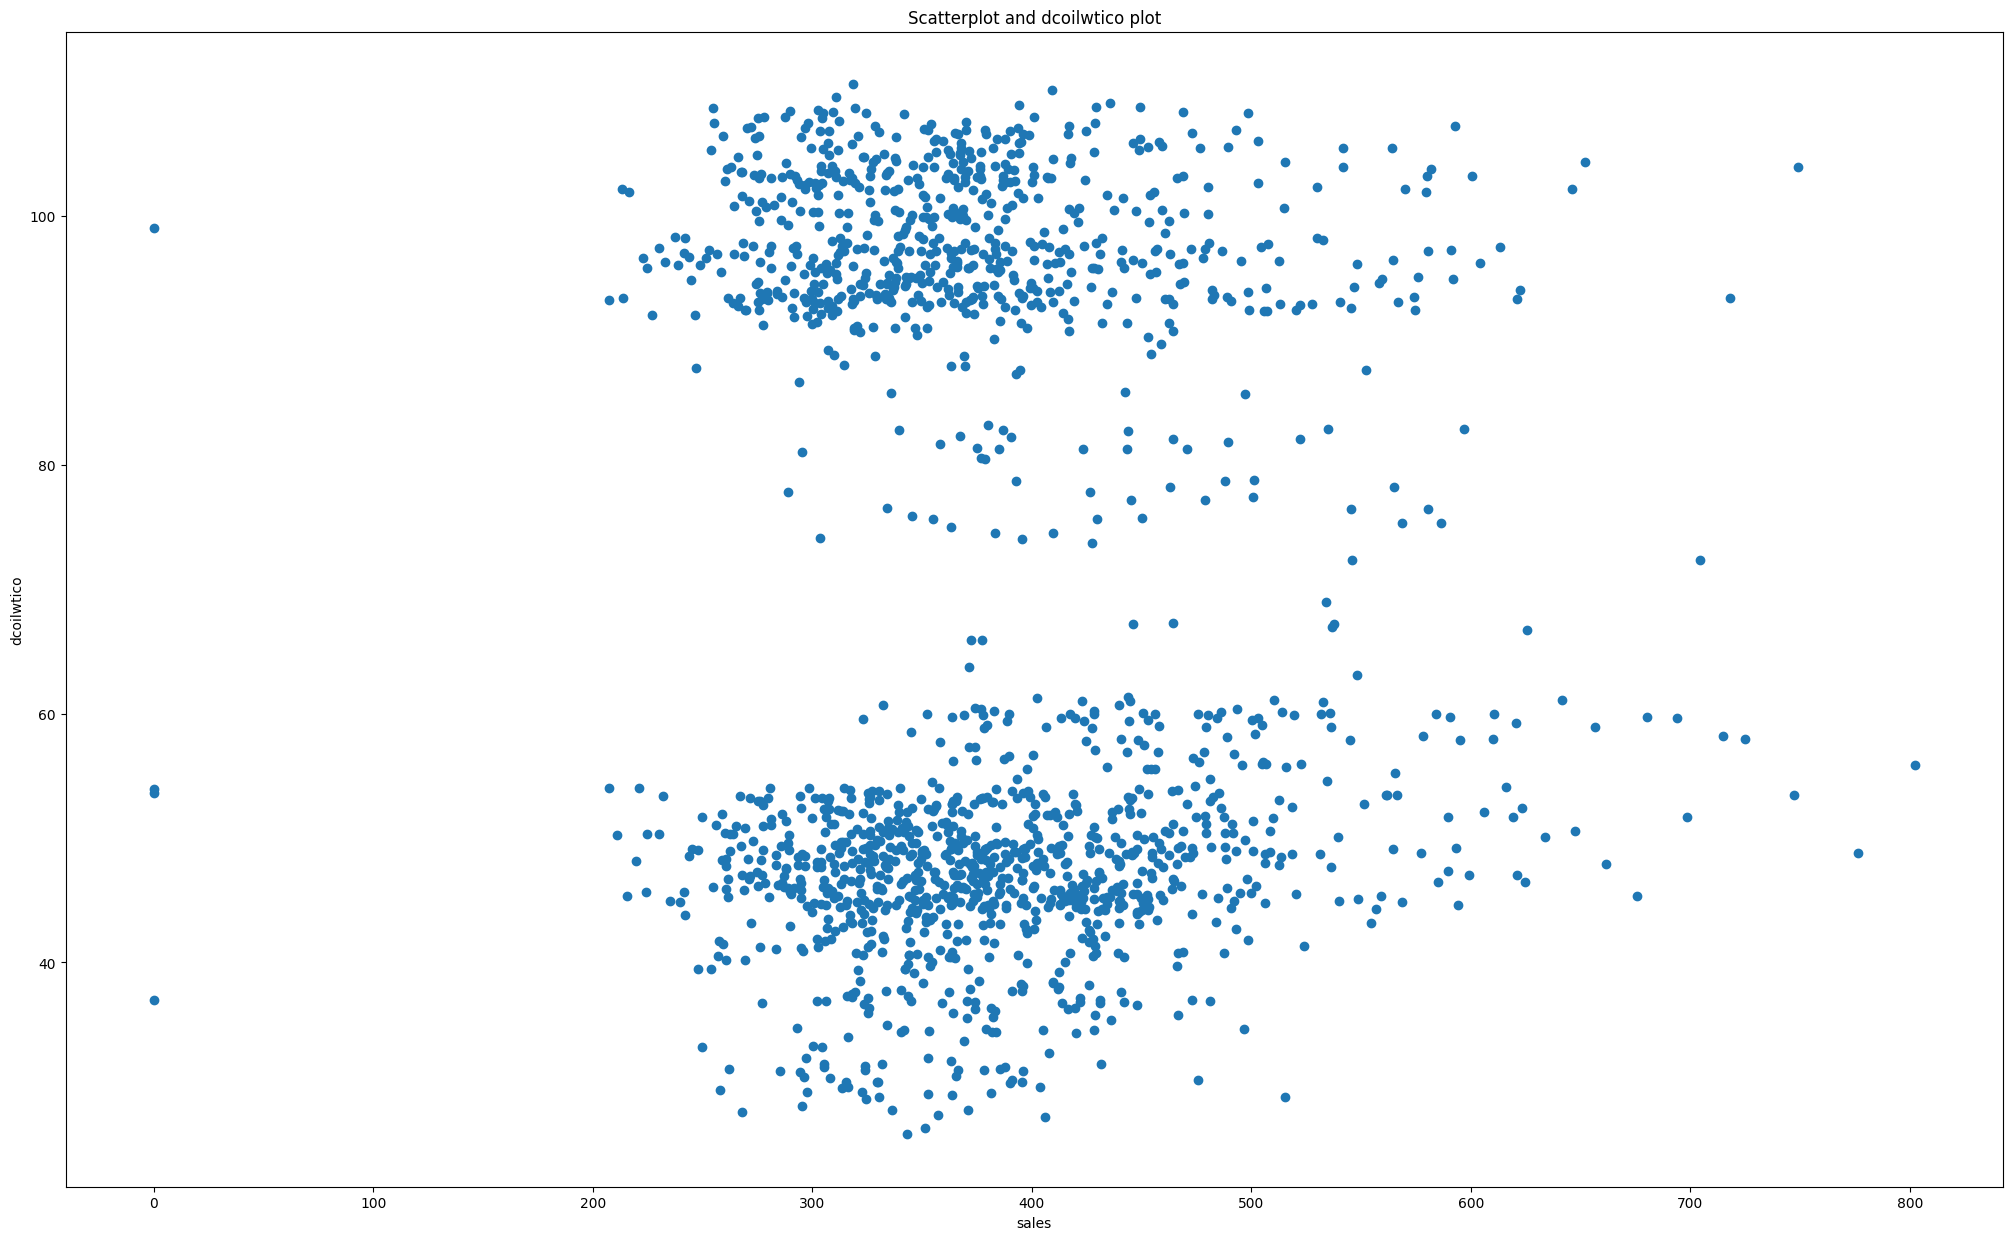

In [ ]:
plt.scatter(x = df_bakery['sales'], y = df_bakery['dcoilwtico'])
plt.xlabel('sales')
plt.ylabel('dcoilwtico')
plt.title('Scatterplot and dcoilwtico plot')
plt.show()

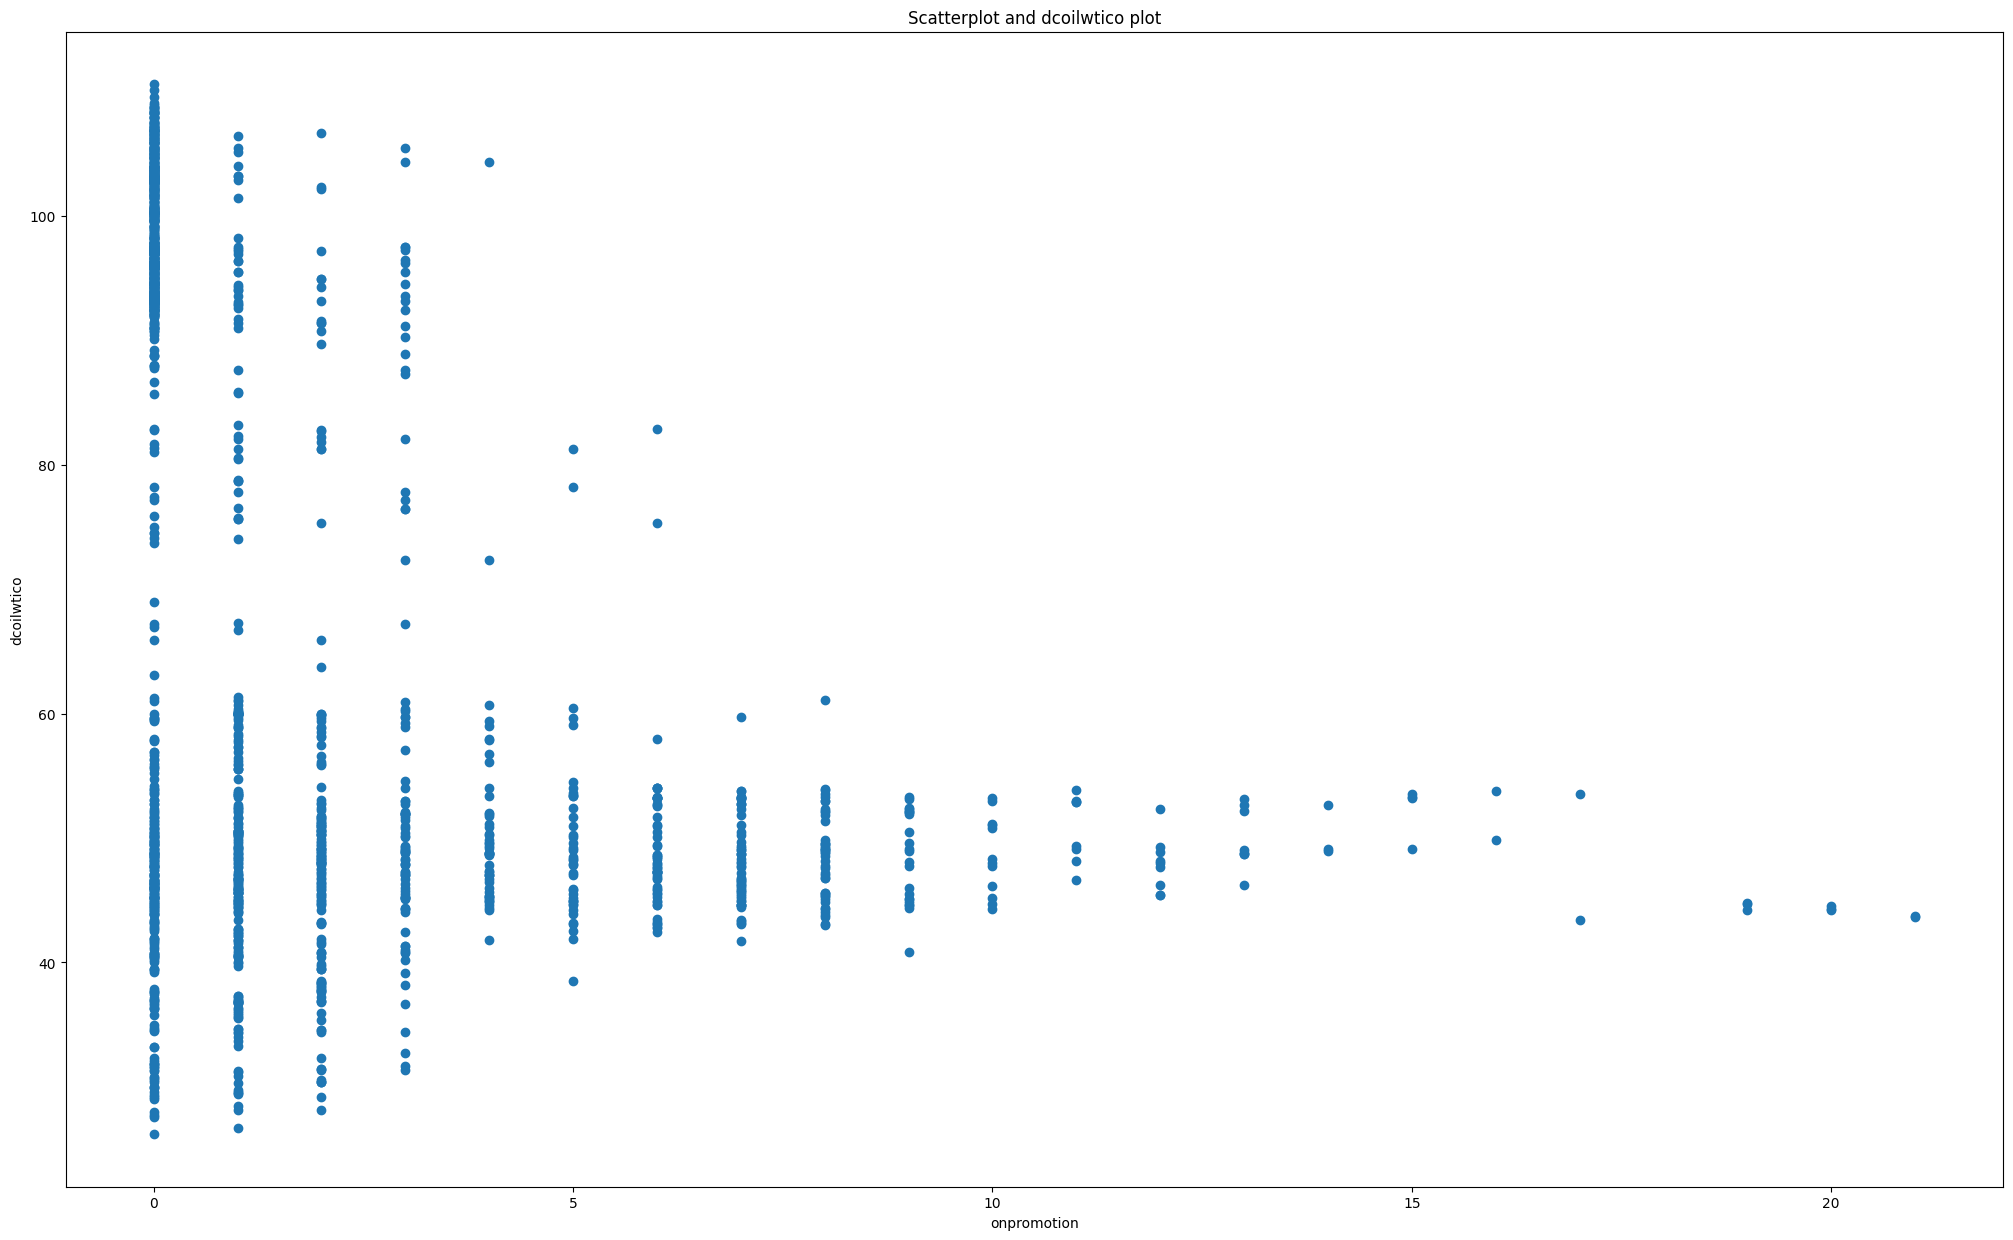

In [ ]:
plt.scatter(x = df_bakery['onpromotion'], y = df_bakery['dcoilwtico'])
plt.xlabel('onpromotion')
plt.ylabel('dcoilwtico')
plt.title('Scatterplot and dcoilwtico plot')
plt.show()

In [ ]:
df_bakerycorr = df_bakery.iloc[:, [1,4,5,6]]
df_bakerycorr.corr()

date     sales  onpromotion  dcoilwtico
date         1.000000 -0.034842     0.566388   -0.839113
sales       -0.034842  1.000000     0.045416   -0.052117
onpromotion  0.566388  0.045416     1.000000   -0.421774
dcoilwtico  -0.839113 -0.052117    -0.421774    1.000000

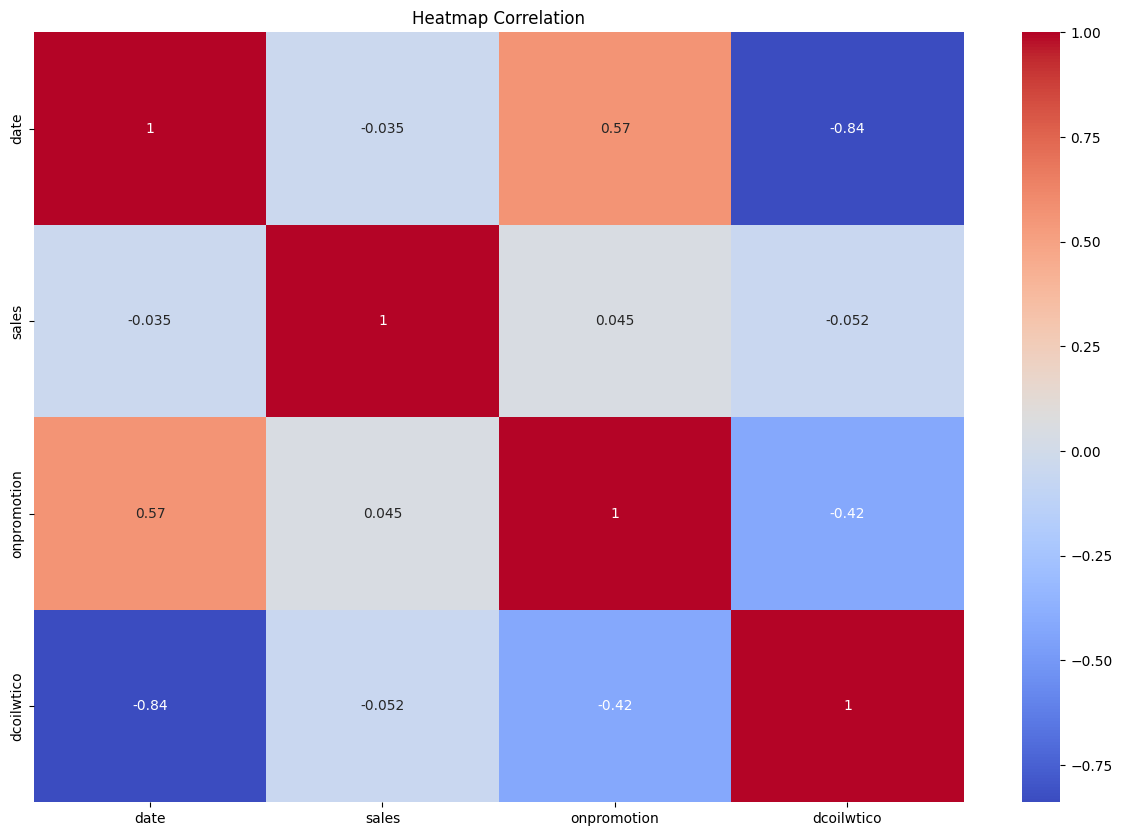

In [ ]:
# Menggunakan metode pearsing correlation
df_bakerycorr.corr(method='pearson')

# Membuat heatmap dari correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df_bakerycorr.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.show()

## Feature Selection

### Calendar Features (Day, Month, Year, Week, day of Week, Day of Year)

In [ ]:
# Membagi data berdasarkan tahun, bulan, minggu, hari, dan hari dalam seminggu
df_bakery = df_bakery[df_bakery['store_nbr'] == 5].copy()

# Membagi data berdasarkan tahun, bulan, minggu, hari, dan hari dalam seminggu

df_bakery.loc[:, 'year'] = df_bakery.index.year
df_bakery.loc[:, 'month'] = df_bakery.index.month
df_bakery.loc[:, 'day'] = df_bakery.index.day
df_bakery.loc[:, 'dayofweek'] = df_bakery.index.dayofweek
df_bakery

id       date  store_nbr        family    sales  onpromotion  \
date                                                                            
2013-01-02     3239 2013-01-02          5  BREAD/BAKERY  566.917            0   
2013-01-03     5021 2013-01-03          5  BREAD/BAKERY  377.887            0   
2013-01-04     6803 2013-01-04          5  BREAD/BAKERY  335.761            0   
2013-01-05     8585 2013-01-05          5  BREAD/BAKERY  402.286            0   
2013-01-06    10367 2013-01-06          5  BREAD/BAKERY  540.281            0   
...             ...        ...        ...           ...      ...          ...   
2017-08-11  2993435 2017-08-11          5  BREAD/BAKERY  312.186            8   
2017-08-12  2995217 2017-08-12          5  BREAD/BAKERY  247.893            8   
2017-08-13  2996999 2017-08-13          5  BREAD/BAKERY  366.425            8   
2017-08-14  2998781 2017-08-14          5  BREAD/BAKERY  393.150            8   
2017-08-15  3000563 2017-08-15          5  BREAD/BAKERY  334.434            6   

            dcoilwtico  year  month  day  weekday  dayofweek  
date                                                          
2013-01-02   93.140000  2013      1    2        2          2  
2013-01-03   92.970000  2013      1    3        3          3  
2013-01-04   93.120000  2013      1    4        4          4  
2013-01-05   93.076667  2013      1    5        5          5  
2013-01-06   93.076667  2013      1    6        6          6  
...                ...   ...    ...  ...      ...        ...  
2017-08-11   48.810000  2017      8   11        4          4  
2017-08-12   49.076000  2017      8   12        5          5  
2017-08-13   49.076000  2017      8   13        6          6  
2017-08-14   47.590000  2017      8   14        0          0  
2017-08-15   47.570000  2017      8   15        1          1  

[1683 rows x 12 columns]

In [ ]:
df_bakery.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'dcoilwtico', 'year', 'month', 'day', 'weekday', 'dayofweek'],
      dtype='object')

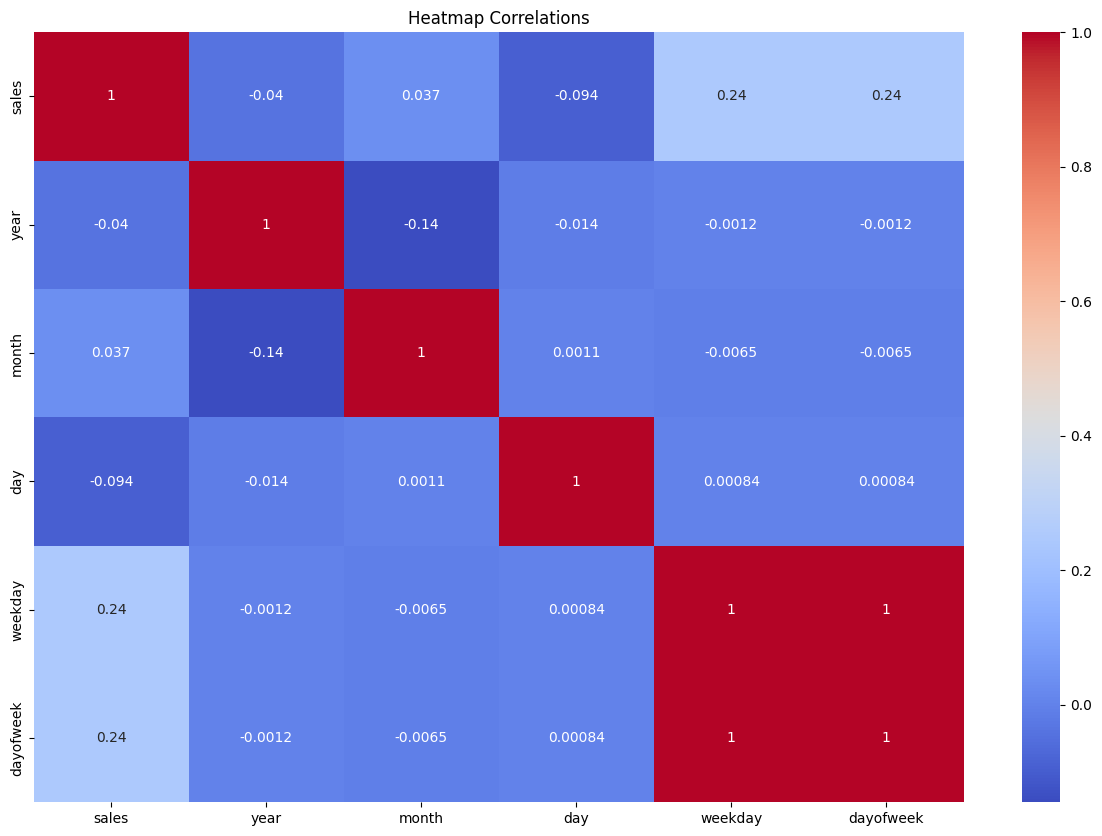

In [ ]:
# Correlations
df_time = df_bakery [['sales', 'year','month', 'day', 'weekday', 'dayofweek']].corr()

#Plot Heatmap daari correlations

plt.figure(figsize=(15, 10))
sns.heatmap(df_time, annot=True, cmap='coolwarm' )
plt.title('Heatmap Correlations')
plt.show()


### Lag Feature

In [ ]:
# Lag Features
# Lag 1
df_bakery.loc[:, 'lag1'] = df_bakery['sales'].shift(1)
df_bakery.loc[:, 'lag2'] = df_bakery['sales'].shift(2)
df_bakery.loc[:, 'lag3'] = df_bakery['sales'].shift(3)
df_bakery.loc[:, 'lag4'] = df_bakery['sales'].shift(4)
df_bakery.loc[:, 'lag5'] = df_bakery['sales'].shift(5)
df_bakery.loc[:, 'lag6'] = df_bakery['sales'].shift(6)
df_bakery.loc[:, 'lag7'] = df_bakery['sales'].shift(7)

# Remove store_nbr
df_bakery.drop(columns='store_nbr', inplace=True)

df_bakery

id       date        family    sales  onpromotion  \
date                                                                 
2013-01-02     3239 2013-01-02  BREAD/BAKERY  566.917            0   
2013-01-03     5021 2013-01-03  BREAD/BAKERY  377.887            0   
2013-01-04     6803 2013-01-04  BREAD/BAKERY  335.761            0   
2013-01-05     8585 2013-01-05  BREAD/BAKERY  402.286            0   
2013-01-06    10367 2013-01-06  BREAD/BAKERY  540.281            0   
...             ...        ...           ...      ...          ...   
2017-08-11  2993435 2017-08-11  BREAD/BAKERY  312.186            8   
2017-08-12  2995217 2017-08-12  BREAD/BAKERY  247.893            8   
2017-08-13  2996999 2017-08-13  BREAD/BAKERY  366.425            8   
2017-08-14  2998781 2017-08-14  BREAD/BAKERY  393.150            8   
2017-08-15  3000563 2017-08-15  BREAD/BAKERY  334.434            6   

            dcoilwtico  year  month  day  weekday  dayofweek     lag1  \
date                                                                    
2013-01-02   93.140000  2013      1    2        2          2      NaN   
2013-01-03   92.970000  2013      1    3        3          3  566.917   
2013-01-04   93.120000  2013      1    4        4          4  377.887   
2013-01-05   93.076667  2013      1    5        5          5  335.761   
2013-01-06   93.076667  2013      1    6        6          6  402.286   
...                ...   ...    ...  ...      ...        ...      ...   
2017-08-11   48.810000  2017      8   11        4          4  344.701   
2017-08-12   49.076000  2017      8   12        5          5  312.186   
2017-08-13   49.076000  2017      8   13        6          6  247.893   
2017-08-14   47.590000  2017      8   14        0          0  366.425   
2017-08-15   47.570000  2017      8   15        1          1  393.150   

               lag2     lag3     lag4     lag5     lag6     lag7  
date                                                              
2013-01-02      NaN      NaN      NaN      NaN      NaN      NaN  
2013-01-03      NaN      NaN      NaN      NaN      NaN      NaN  
2013-01-04  566.917      NaN      NaN      NaN      NaN      NaN  
2013-01-05  377.887  566.917      NaN      NaN      NaN      NaN  
2013-01-06  335.761  377.887  566.917      NaN      NaN      NaN  
...             ...      ...      ...      ...      ...      ...  
2017-08-11  347.098  350.951  412.288  399.051  384.263  345.226  
2017-08-12  344.701  347.098  350.951  412.288  399.051  384.263  
2017-08-13  312.186  344.701  347.098  350.951  412.288  399.051  
2017-08-14  247.893  312.186  344.701  347.098  350.951  412.288  
2017-08-15  366.425  247.893  312.186  344.701  347.098  350.951  

[1683 rows x 18 columns]

In [ ]:
df_bakerylagcorr = df_bakery.iloc[:, [1, 3, 11, 12, 13, 14, 15, 16, 17]]
df_bakerylagcorr.corr()

date     sales      lag1      lag2      lag3      lag4      lag5  \
date   1.000000 -0.034842 -0.034314 -0.034473 -0.034317 -0.032772 -0.031975   
sales -0.034842  1.000000  0.474071  0.217845  0.142247  0.155977  0.232433   
lag1  -0.034314  0.474071  1.000000  0.474157  0.217808  0.141857  0.155759   
lag2  -0.034473  0.217845  0.474157  1.000000  0.474178  0.218084  0.141947   
lag3  -0.034317  0.142247  0.217808  0.474178  1.000000  0.474355  0.218042   
lag4  -0.032772  0.155977  0.141857  0.218084  0.474355  1.000000  0.474043   
lag5  -0.031975  0.232433  0.155759  0.141947  0.218042  0.474043  1.000000   
lag6  -0.031560  0.438268  0.232327  0.155802  0.141910  0.217812  0.473954   
lag7  -0.031171  0.638290  0.438196  0.232370  0.155768  0.141646  0.217671   

           lag6      lag7  
date  -0.031560 -0.031171  
sales  0.438268  0.638290  
lag1   0.232327  0.438196  
lag2   0.155802  0.232370  
lag3   0.141910  0.155768  
lag4   0.217812  0.141646  
lag5   0.473954  0.217671  
lag6   1.000000  0.473900  
lag7   0.473900  1.000000

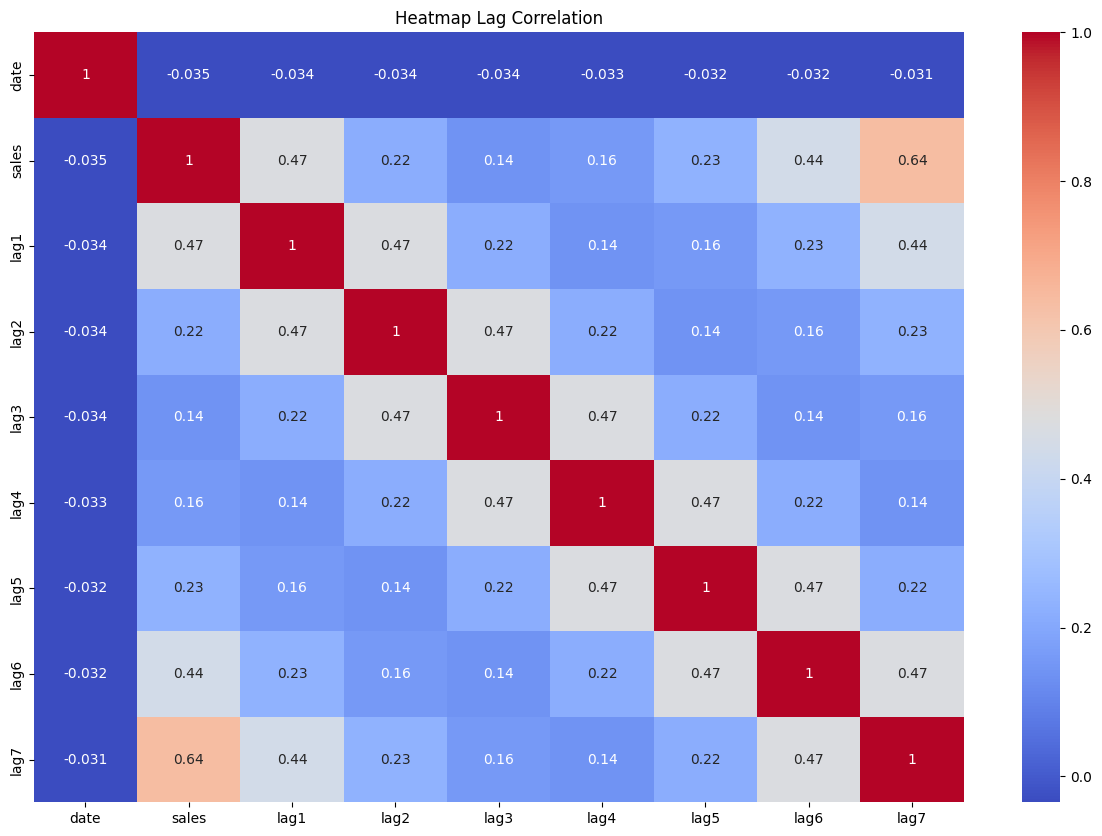

In [ ]:
# Menggunakan metode pearsing correlation
df_bakerylagcorr.corr(method='pearson')

# Membuat heatmap dari correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df_bakerylagcorr.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Lag Correlation')
plt.show()

### Correlation

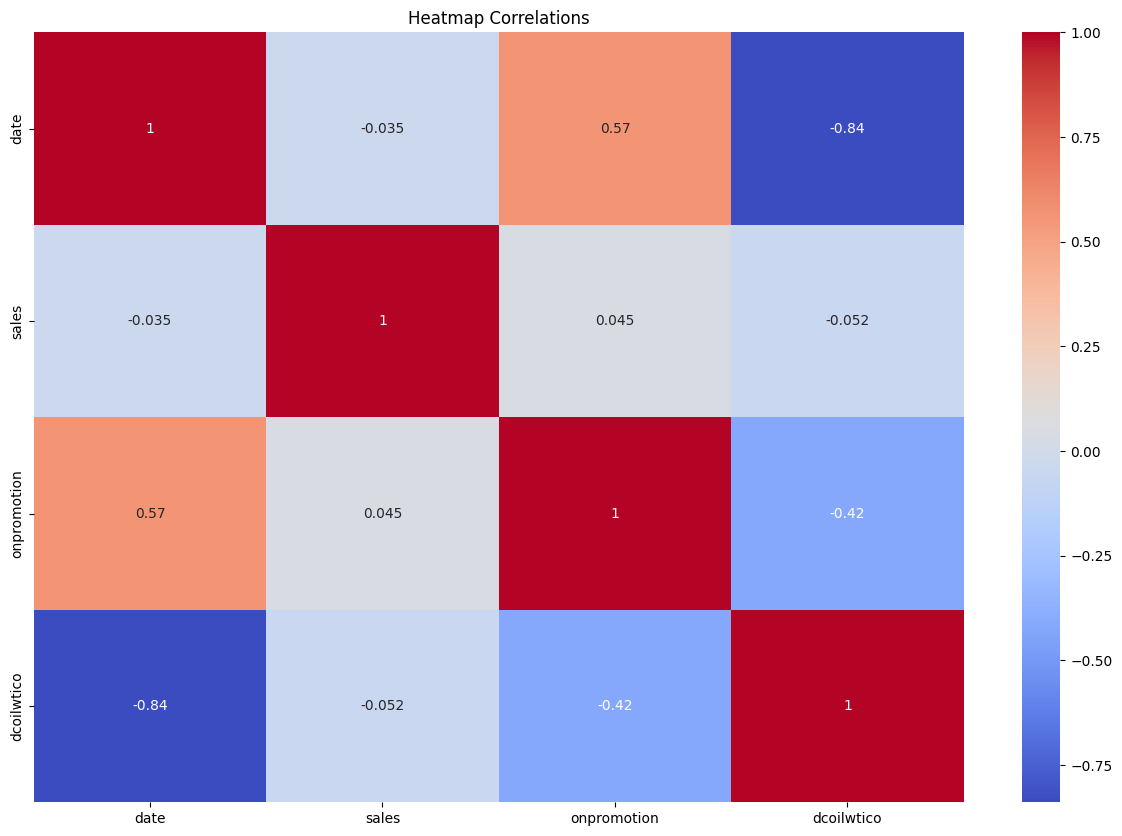

In [ ]:
# Correlations

df_bakerycorr.corr(method='pearson')

#Plot Heatmap daari correlations

plt.figure(figsize=(15, 10))
sns.heatmap(df_bakerycorr.corr(), annot=True, cmap='coolwarm' )
plt.title('Heatmap Correlations')
plt.show()


### Rolling Window Feature (Mean, Median)

> Add blockquote



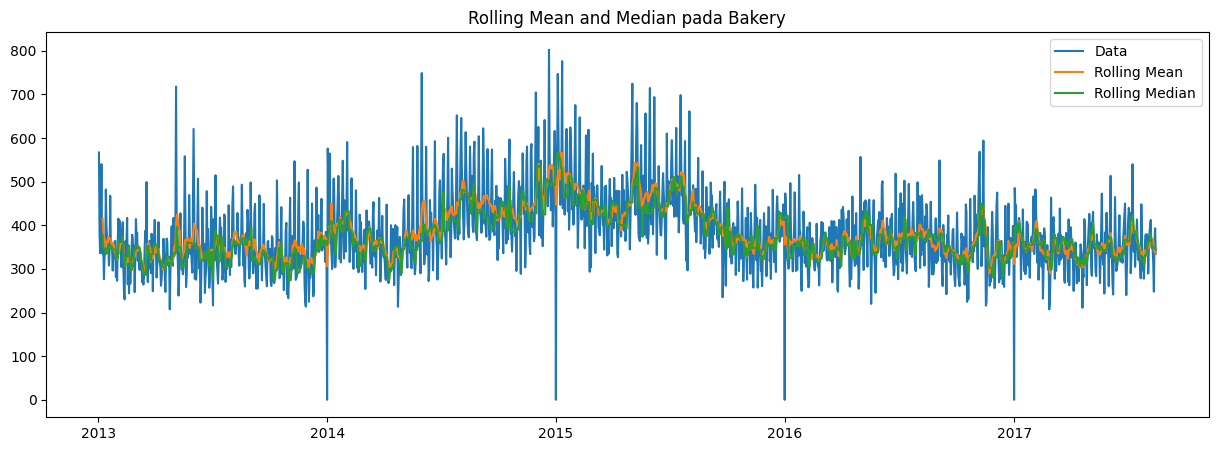

In [ ]:
# Hitung rolling mean
df_bakery['rolling_mean'] = df_bakery['sales'].rolling(window=7).mean()
df_bakery['rolling_median'] = df_bakery['sales'].rolling(window=7).median()

# Plot rolling mean
plt.figure(figsize=(15, 5))
# Plot data dan rolling mean, difference the colour
plt.plot(df_bakery['date'], df_bakery['sales'], label='Data')
plt.plot(df_bakery['date'], df_bakery['rolling_mean'], label='Rolling Mean')
plt.plot(df_bakery['date'], df_bakery['rolling_median'], label='Rolling Median')
plt.legend()
plt.title('Rolling Mean and Median pada Bakery')
plt.show()

# Train Test Split

In [ ]:
df_bakery.columns

Index(['id', 'date', 'family', 'sales', 'onpromotion', 'dcoilwtico', 'year',
       'month', 'day', 'weekday', 'dayofweek', 'lag1', 'lag2', 'lag3', 'lag4',
       'lag5', 'lag6', 'lag7', 'rolling_mean', 'rolling_median'],
      dtype='object')

In [ ]:
df_bakery = df_bakery [['sales', 'weekday', 'dayofweek', 'lag1','lag6', 'lag7', 'rolling_mean', 'rolling_median']]

In [ ]:
# Train 80% Test 20%

# Define the split inex
percentage = 80
x = round((len(df_bakery)-1)*percentage/100)

# Create the split
df_bakery_train = df_bakery[df_bakery.index <= '2016-09-12']
df_bakery_val = df_bakery[df_bakery.index > '2016-09-12']

# Modelling

## SARIMA

<Axes: xlabel='date'>

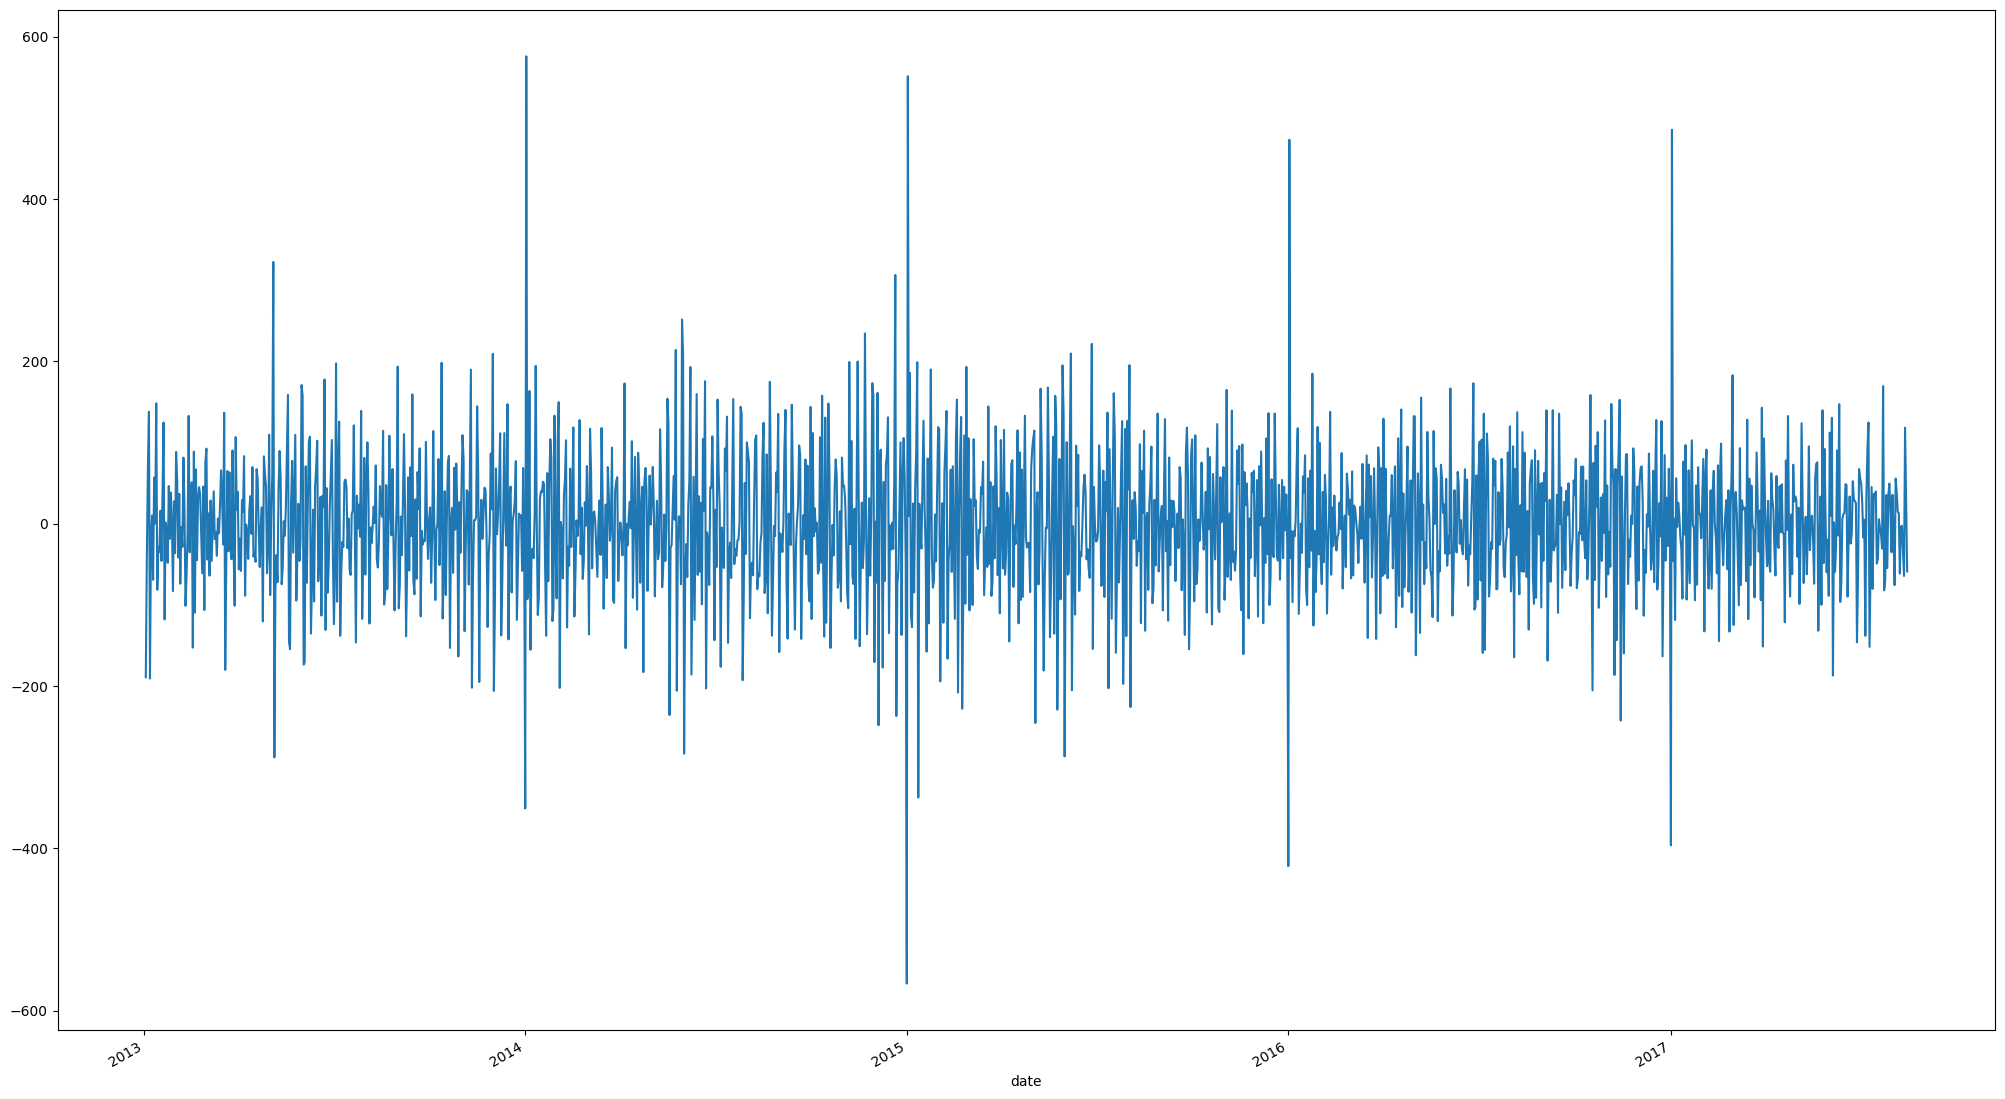

In [ ]:
# Sales Data Only

df_bakery['sales'].diff().plot()

### ACF and PACF Plot

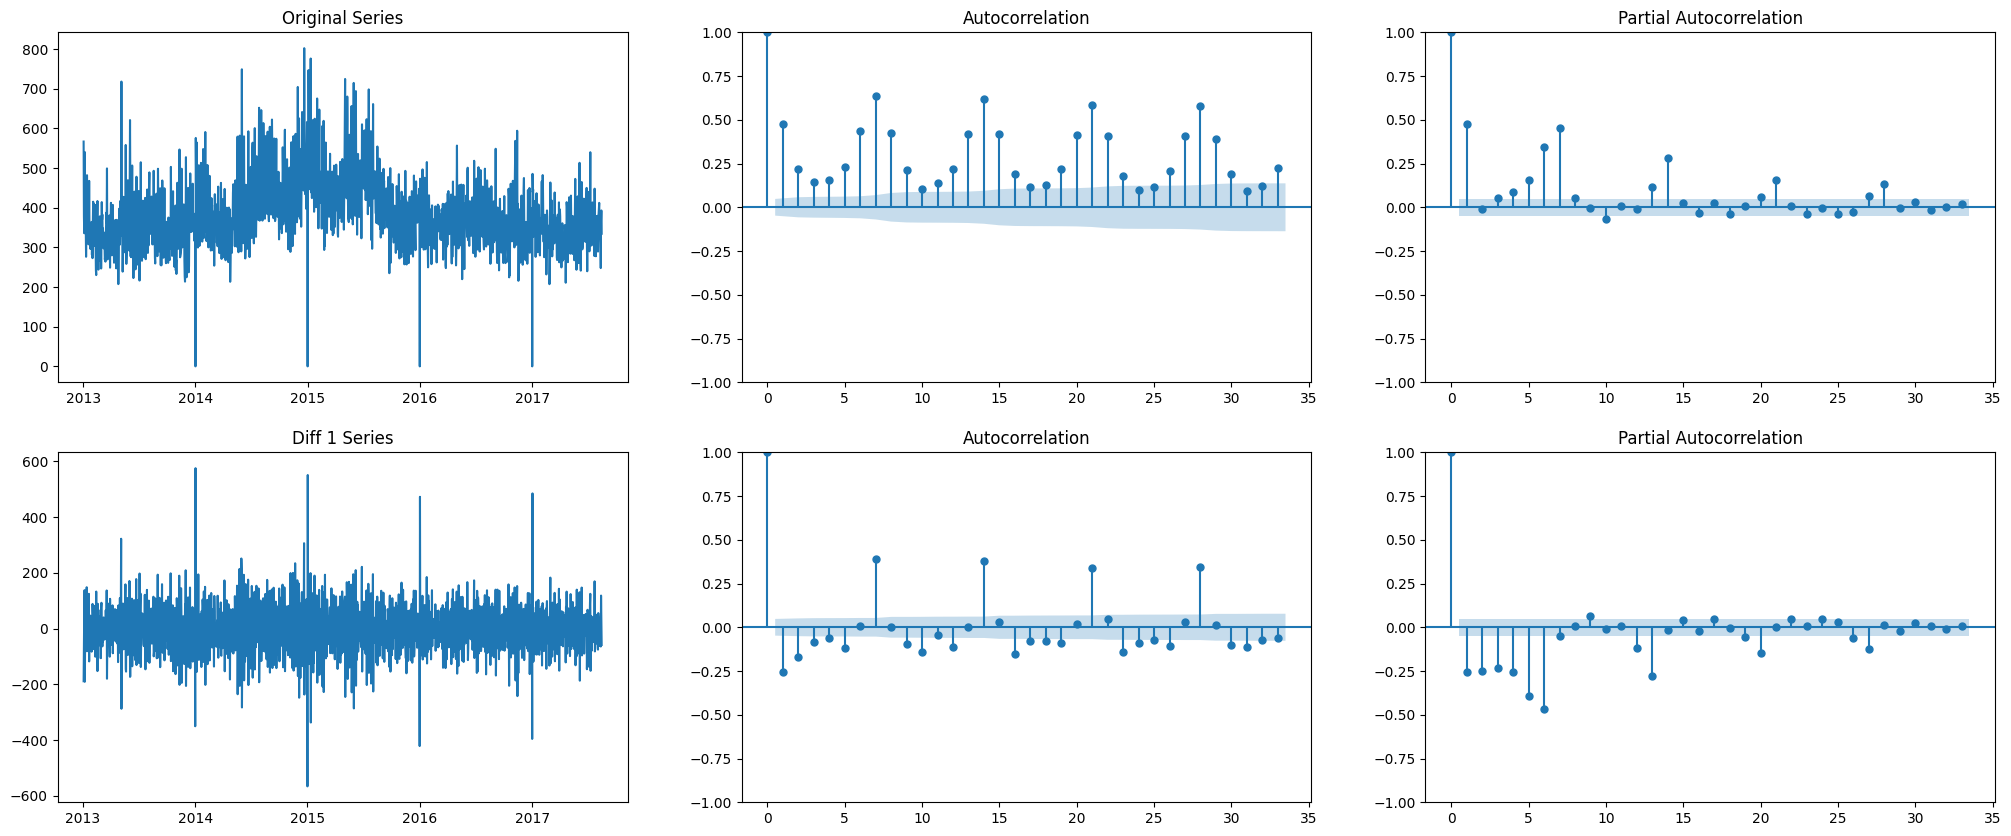

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(df_bakery['sales'])
ax[0, 1] = plot_acf(df_bakery['sales'], ax=ax[0, 1])
ax[0, 2] = plot_pacf(df_bakery['sales'], ax=ax[0, 2])

ax[1, 0].set_title('Diff 1 Series')
ax[1, 0].plot(df_bakery['sales'].diff().dropna())
ax[1, 1] = plot_acf(df_bakery['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_pacf(df_bakery['sales'].diff().dropna(), ax=ax[1, 2])

### Define Order (p, d, q)(P, D, Q, s)

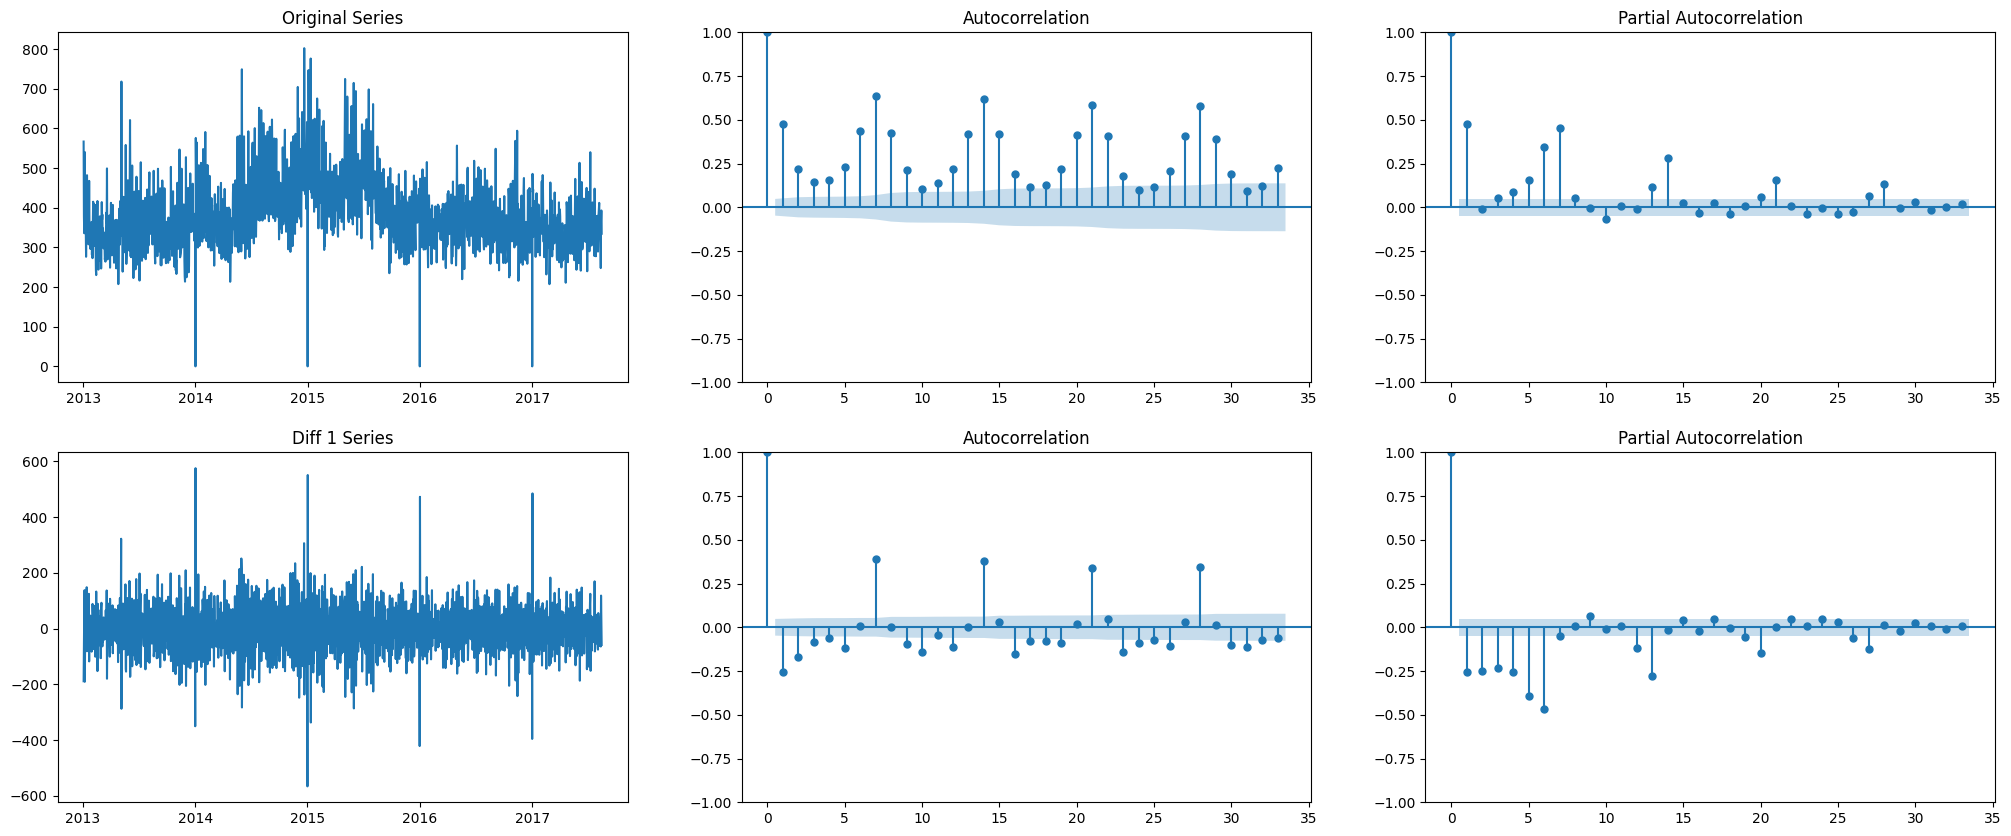

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(2, 3, figsize=(25, 10))

ax[0, 0].set_title('Original Series')
ax[0, 0].plot(df_bakery['sales'])
ax[0, 1] = plot_acf(df_bakery['sales'], ax=ax[0, 1])
ax[0, 2] = plot_pacf(df_bakery['sales'], ax=ax[0, 2])

ax[1, 0].set_title('Diff 1 Series')
ax[1, 0].plot(df_bakery['sales'].diff().dropna())
ax[1, 1] = plot_acf(df_bakery['sales'].diff().dropna(), ax=ax[1, 1])
ax[1, 2] = plot_pacf(df_bakery['sales'].diff().dropna(), ax=ax[1, 2])

SARIMA (p, d, q)(P, D, Q, s)



Coba ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 6,1,7 ARIMA Model
model = ARIMA(df_bakery_train['sales'], order=(6,1,7))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                 1347
Model:                 ARIMA(6, 1, 7)   Log Likelihood               -7402.175
Date:                Mon, 02 Jun 2025   AIC                          14832.351
Time:                        19:14:44   BIC                          14905.219
Sample:                             0   HQIC                         14859.644
                               - 1347                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9496      0.044    -21.556      0.000      -1.036      -0.863
ar.L2         -0.9719      0.019    -50.967      0.000      -1.009      -0.935
ar.L3         -0.9705      0.035    -27.769      0.0

Plot residual ARIMA

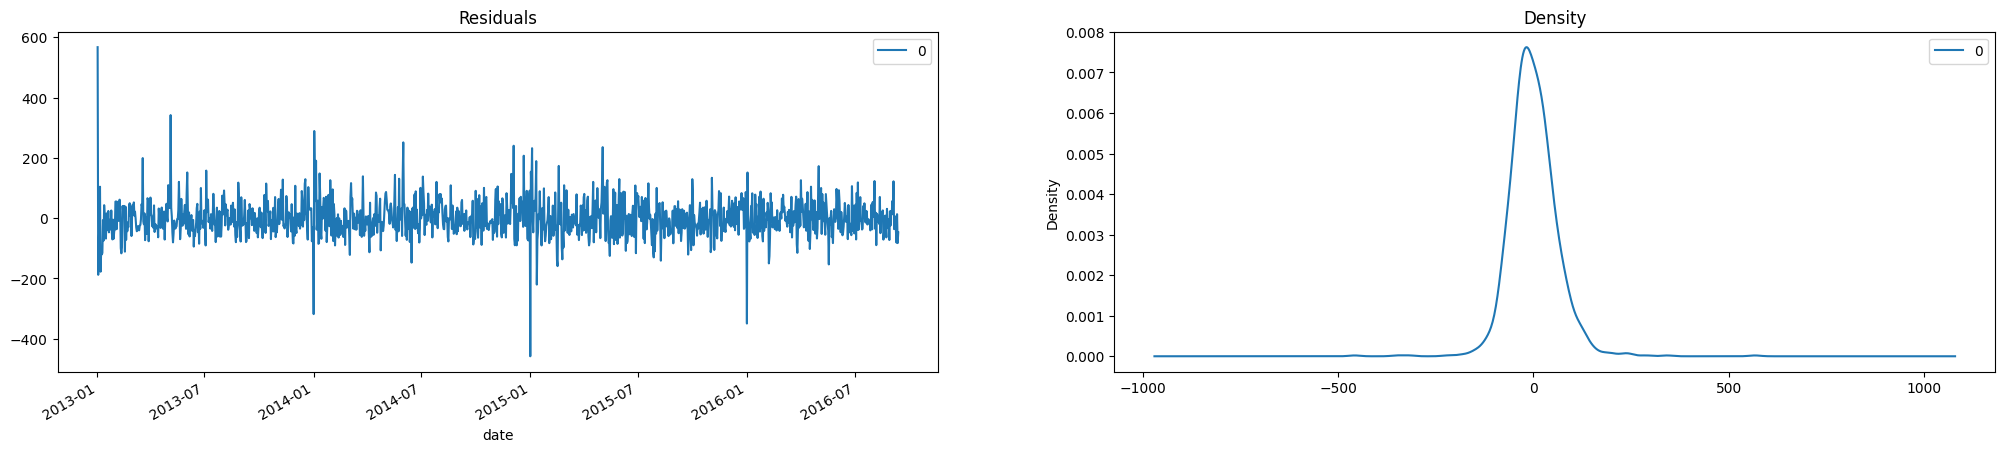

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Polanya non random, jadi perlu penyesuaian parameter dan penambahan variable

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


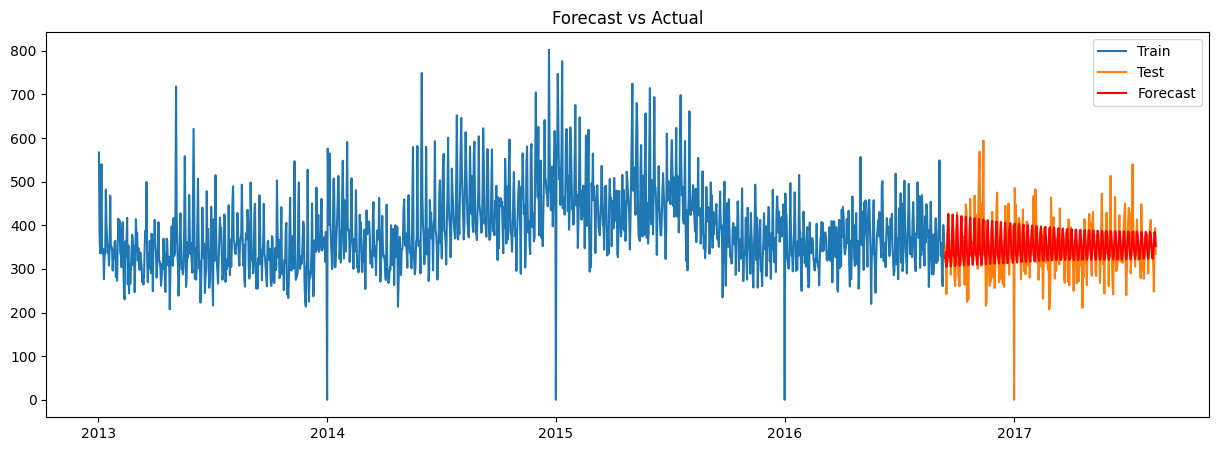

In [ ]:
# Prediction
forecast_Arima = model_fit.predict(start=len(df_bakery_train), end=len(df_bakery_train)+len(df_bakery_val)-1, typ='levels')
forecast_Arima.index = df_bakery_val.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(df_bakery_train['sales'], label='Train')
plt.plot(df_bakery_val['sales'], label='Test')
plt.plot(forecast_Arima, label='Forecast', color='r')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#cek mape, mae, rmse
mask = df_bakery_val['sales'] != 0
mape = np.mean(np.abs((df_bakery_val['sales'][mask] - forecast_Arima[mask]) / df_bakery_val['sales'][mask])) * 100
mae = np.mean(np.abs(df_bakery_val['sales'] - forecast))
rmse = np.sqrt(np.mean((df_bakery_val['sales'] - forecast) ** 2))
print('MAPE:', mape, '%')
print('MAE:', mae)
print('RMSE:', rmse)

NameError: name 'forecast' is not defined

Coba Sarima

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Define SARIMA parameters
p, d, q =6, 1, 1
P, D, Q, s = 2, 1, 1, 7

# Fit the SARIMA model
model = SARIMAX(df_bakery_train['sales'], order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit1 = model.fit()
print(model_fit1.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                 1347
Model:             SARIMAX(6, 1, 1)x(2, 1, 1, 7)   Log Likelihood               -7379.672
Date:                           Mon, 02 Jun 2025   AIC                          14781.345
Time:                                   19:20:51   BIC                          14838.541
Sample:                                        0   HQIC                         14802.774
                                          - 1347                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1198      0.022      5.356      0.000       0.076       0.164
ar.L2         -0.0539      0.028     -1.939

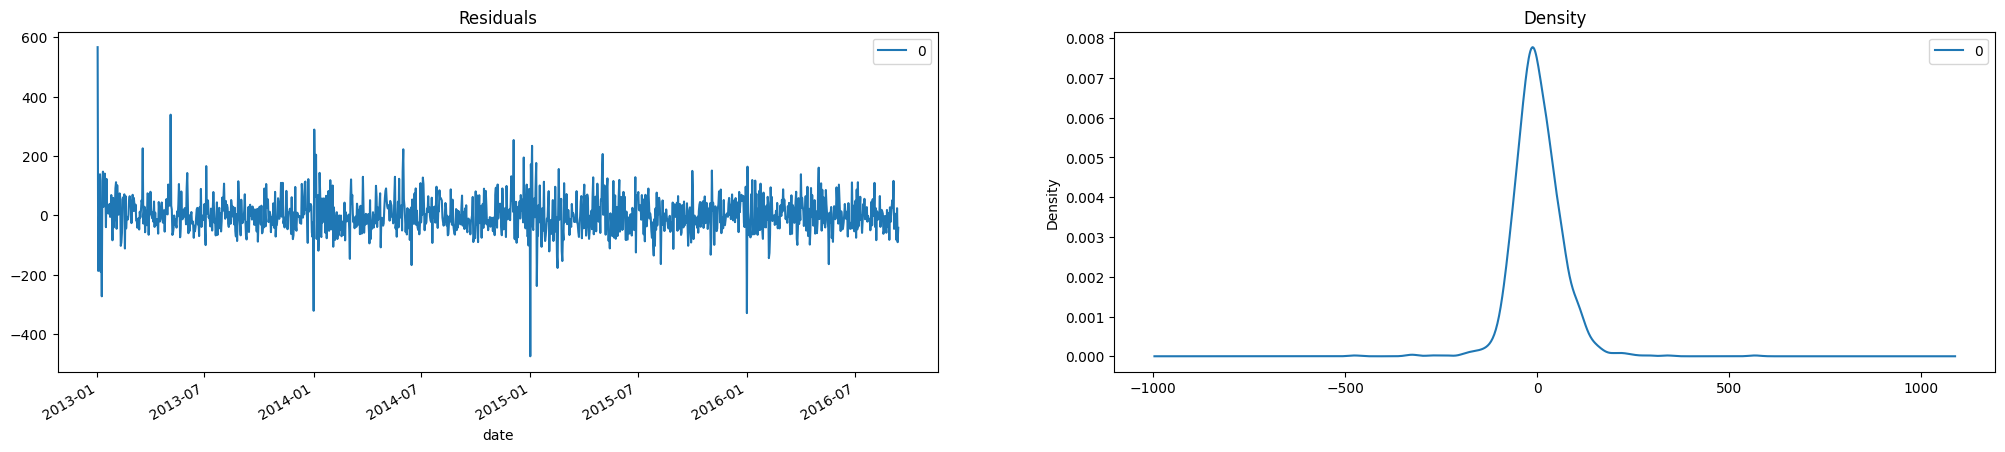

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2, figsize=(25,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


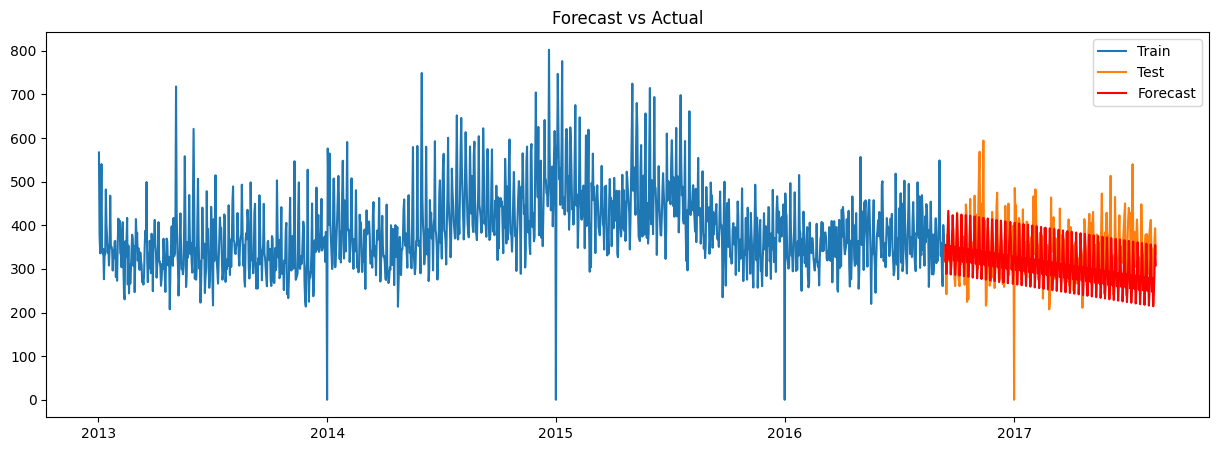

In [ ]:
# Prediction
forecast_sarima = model_fit1.predict(start=len(df_bakery_train), end=len(df_bakery_train)+len(df_bakery_val)-1, typ='levels')
forecast_sarima.index = df_bakery_val.index

plt.figure(figsize=(15,5))
plt.title('Forecast vs Actual')
plt.plot(df_bakery_train['sales'], label='Train')
plt.plot(df_bakery_val['sales'], label='Test')
plt.plot(forecast_sarima, label='Forecast', color='r')
plt.legend()

In [ ]:
mask = df_bakery_val['sales'] != 0
mape = mean_absolute_percentage_error(df_bakery_val['sales'][mask], forecast_sarima[mask])*100
mae = np.mean(np.abs(df_bakery_val['sales'] - forecast_sarima))
rmse = np.sqrt(np.mean((df_bakery_val['sales'] - forecast_sarima) ** 2))
print('MAPE:', mape, '%')
print('MAE:', mae)
print('RMSE:', rmse)

MAPE: 16.401324371313706 %
MAE: 59.18474776683537
RMSE: 75.89216752333319


### Auto Arima

In [ ]:
!pip install pmdarima
!pip install numpy==1.26.4
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
#import pmdarima as pm

In [ ]:
# #auto ARIMA
# model = pm.auto_arima(df_bakery_train['sales'],
#                       start_p=4,        # nilai p pertama
#                       start_q=1,        # nilai q pertama
#                       test='adf',       # gunakan adftest untuk mencari optimal 'd'
#                       max_p=6,          # maksimal p
#                       max_q=2,          # maksimal q
#                       d=1,           # let model determine 'd'
#                       m=7,             # frequency of series
#                       seasonal=True,    # Seasonality
#                       start_P=2,        # nilai P pertama
#                       D=1,           # let model determine 'D'
#                       start_Q=1,        # nilai Q pertama
#                       max_P=2,          # maksimal P
#                       max_D=1,          # maksimal D
#                       max_Q=3,          # maksimal Q
#                       trace=True,       # print result
#                       error_action='ignore',    # we don't want to know if an order does not work
#                       suppress_warnings=True,   # we don't want convergence warnings
#                       stepwise=True)        # set to stepwise

# print(model.summary())

In [ ]:
# # Define SARIMA parameters
# p, d, q =5, 1, 0
# P, D, Q, s = 1, 1, 1, 7

# # Fit the SARIMA model
# model = ARIMA(df_bakery_train['sales'], order=(p, d, q), seasonal_order=(P, D, Q, s))
# model_fit2 = model.fit()
# print(model_fit2.summary())

In [ ]:
# # Prediction
# forecast2 = model_fit2.predict(start=len(df_bakery_train), end=len(df_bakery_train)+len(df_bakery_val)-1, typ='levels')
# forecast2.index = df_bakery_val.index

# plt.figure(figsize=(15,5))
# plt.title('Forecast vs Actual')
# plt.plot(df_bakery_train['sales'], label='Train')
# plt.plot(df_bakery_val['sales'], label='Test')
# plt.plot(forecast2, label='Forecast', color='r')
# plt.legend()

### Evaluation

Perbandingan Metrik Evaluasi:
  Metric      ARIMA     SARIMA
0   MAPE  12.065667  16.401324
1    MAE  41.351097  59.184748
2   RMSE  56.589528  75.892168


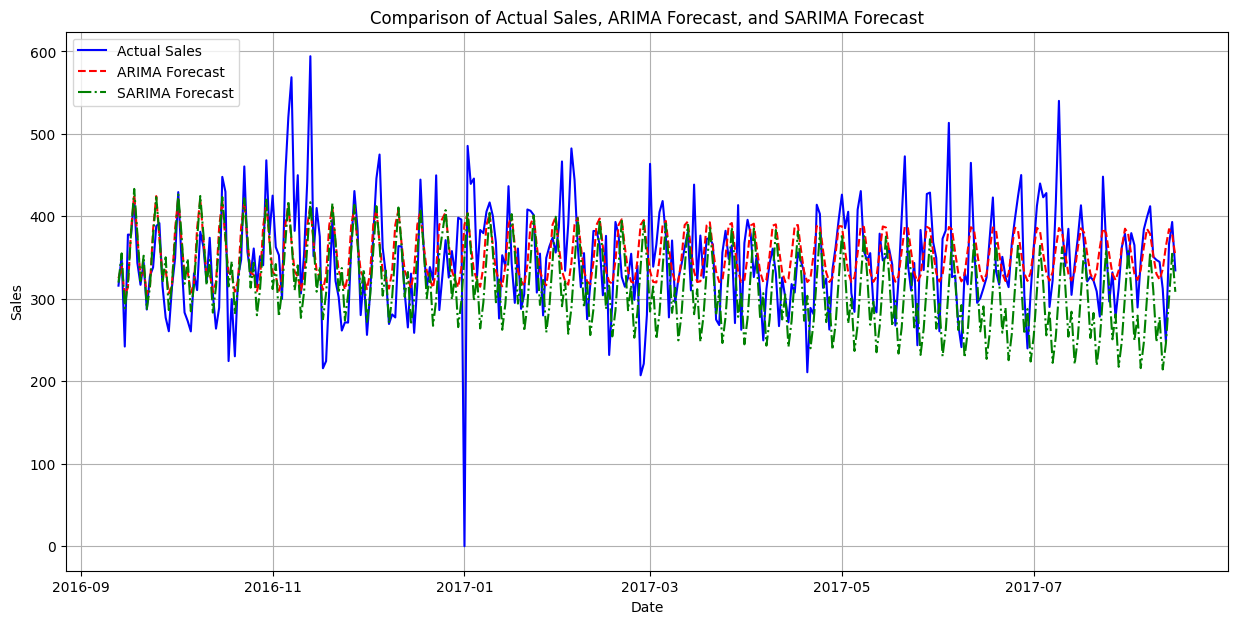

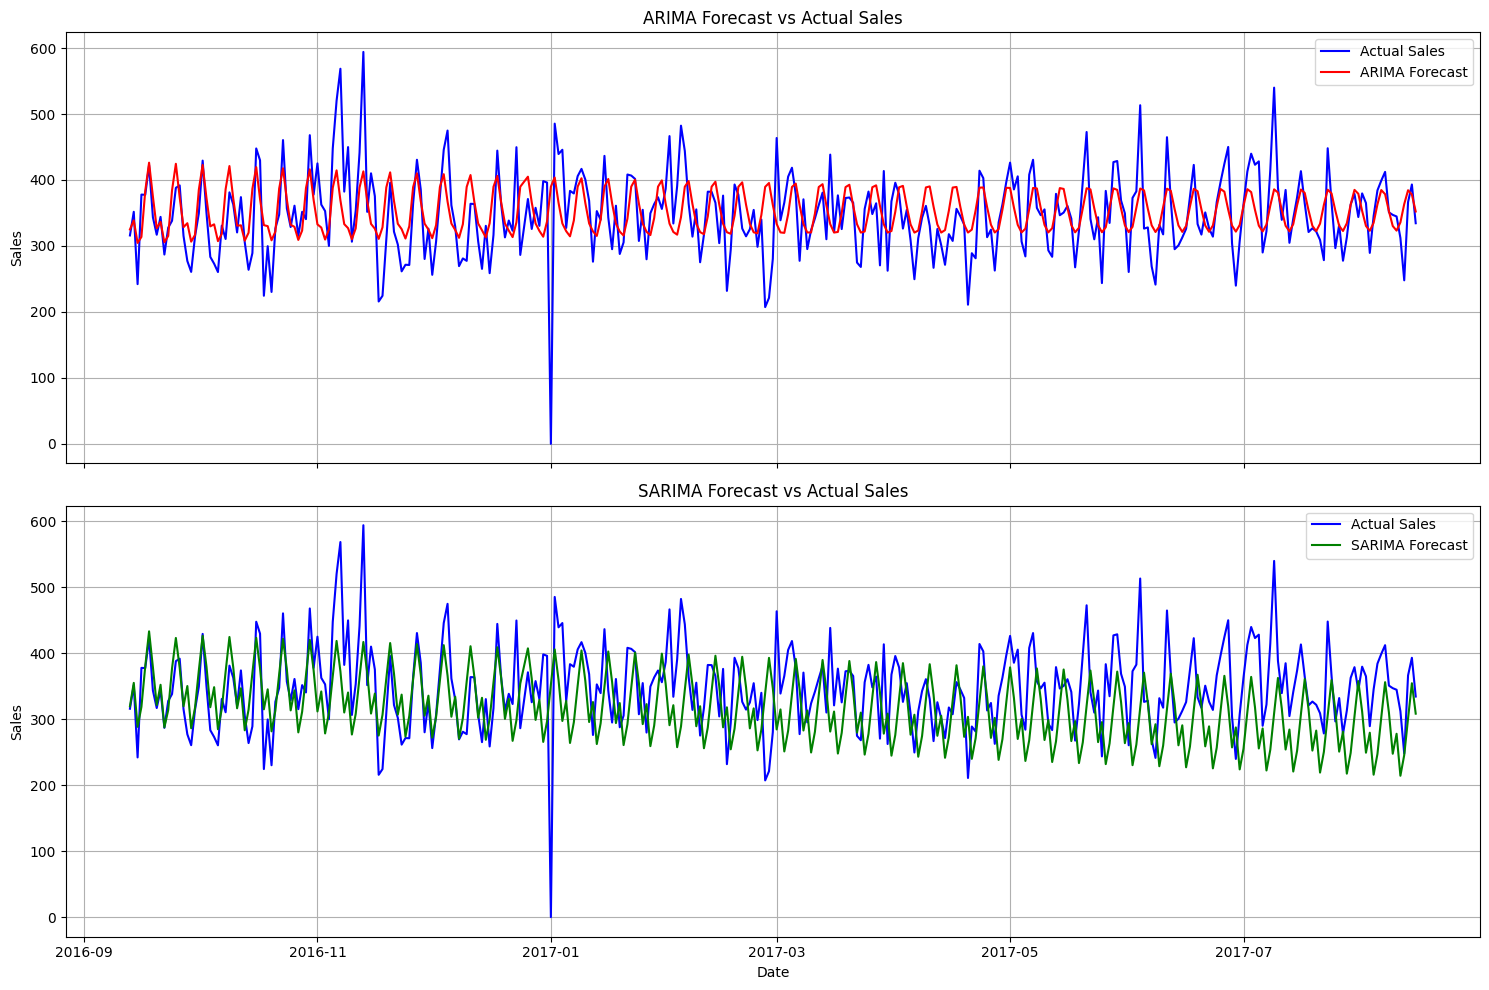

In [ ]:
# prompt: buatlah perbandingan nilai mape mae dab rmse dari model arima dan sarima diatas beserta grafiknya

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate metrics for ARIMA
mape_arima = np.mean(np.abs((df_bakery_val['sales'][mask] - forecast_Arima[mask]) / df_bakery_val['sales'][mask])) * 100
mae_arima = np.mean(np.abs(df_bakery_val['sales'] - forecast_Arima))
rmse_arima = np.sqrt(mean_squared_error(df_bakery_val['sales'], forecast_Arima))

# Calculate metrics for SARIMA
mape_sarima = np.mean(np.abs((df_bakery_val['sales'][mask] - forecast_sarima[mask]) / df_bakery_val['sales'][mask])) * 100
mae_sarima = np.mean(np.abs(df_bakery_val['sales'] - forecast_sarima))
rmse_sarima = np.sqrt(mean_squared_error(df_bakery_val['sales'], forecast_sarima))


# Create a DataFrame to compare metrics
metrics_data = {'Metric': ['MAPE', 'MAE', 'RMSE'],
                'ARIMA': [mape_arima, mae_arima, rmse_arima],
                'SARIMA': [mape_sarima, mae_sarima, rmse_sarima]}
df_metrics = pd.DataFrame(metrics_data)

print("Perbandingan Metrik Evaluasi:")
print(df_metrics)

# Plot comparison of actual vs forecast
plt.figure(figsize=(15, 7))
plt.plot(df_bakery_val['sales'], label='Actual Sales', color='blue')
plt.plot(forecast_Arima, label='ARIMA Forecast', color='red', linestyle='--')
plt.plot(forecast_sarima, label='SARIMA Forecast', color='green', linestyle='-.')
plt.title('Comparison of Actual Sales, ARIMA Forecast, and SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Plot individual forecast comparisons
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot ARIMA forecast
axes[0].plot(df_bakery_val['sales'], label='Actual Sales', color='blue')
axes[0].plot(forecast_Arima, label='ARIMA Forecast', color='red')
axes[0].set_title('ARIMA Forecast vs Actual Sales')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].grid(True)

# Plot SARIMA forecast
axes[1].plot(df_bakery_val['sales'], label='Actual Sales', color='blue')
axes[1].plot(forecast_sarima, label='SARIMA Forecast', color='green')
axes[1].set_title('SARIMA Forecast vs Actual Sales')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Sales')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Forecasting (Optional)

## LSTM

### LSTM Training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import min-max scaling function
from sklearn.preprocessing import MinMaxScaler

# Import keras lstm model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional, GRU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

#### data preparation

In [ ]:
df_bakery

sales  weekday  dayofweek     lag1     lag6     lag7  \
date                                                                 
2013-01-02  566.917        2          2      NaN      NaN      NaN   
2013-01-03  377.887        3          3  566.917      NaN      NaN   
2013-01-04  335.761        4          4  377.887      NaN      NaN   
2013-01-05  402.286        5          5  335.761      NaN      NaN   
2013-01-06  540.281        6          6  402.286      NaN      NaN   
...             ...      ...        ...      ...      ...      ...   
2017-08-11  312.186        4          4  344.701  384.263  345.226   
2017-08-12  247.893        5          5  312.186  399.051  384.263   
2017-08-13  366.425        6          6  247.893  412.288  399.051   
2017-08-14  393.150        0          0  366.425  350.951  412.288   
2017-08-15  334.434        1          1  393.150  347.098  350.951   

            rolling_mean  rolling_median  
date                                      
2013-01-02           NaN             NaN  
2013-01-03           NaN             NaN  
2013-01-04           NaN             NaN  
2013-01-05           NaN             NaN  
2013-01-06           NaN             NaN  
...                  ...             ...  
2017-08-11    364.362571         350.951  
2017-08-12    344.881143         347.098  
2017-08-13    340.220286         347.098  
2017-08-14    337.486286         347.098  
2017-08-15    335.126714         344.701  

[1683 rows x 8 columns]

In [ ]:
# Input contains NAN

print(df_bakery.isna().sum())

# Drop Missing row

df_bakery.dropna(inplace=True)

sales             0
weekday           0
dayofweek         0
lag1              1
lag6              6
lag7              7
rolling_mean      6
rolling_median    6
dtype: int64


<ipython-input-86-1a3d6bd09f75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bakery.dropna(inplace=True)


In [ ]:
df_bakery_train.dropna(inplace  = True)

df_bakery_train.isna().sum()

<ipython-input-87-455a6f962833>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bakery_train.dropna(inplace  = True)


sales             0
weekday           0
dayofweek         0
lag1              0
lag6              0
lag7              0
rolling_mean      0
rolling_median    0
dtype: int64

In [ ]:
df_bakery_train

sales  weekday  dayofweek     lag1     lag6     lag7  \
date                                                                 
2013-01-09  345.437        2          2  335.194  377.887  566.917   
2013-01-10  276.374        3          3  345.437  335.761  377.887   
2013-01-11  333.326        4          4  276.374  402.286  335.761   
2013-01-12  333.537        5          5  333.326  540.281  402.286   
2013-01-13  482.061        6          6  333.537  349.624  540.281   
...             ...      ...        ...      ...      ...      ...   
2016-09-08  288.214        3          3  359.529  380.714  317.952   
2016-09-09  260.626        4          4  288.214  408.890  380.714   
2016-09-10  400.601        5          5  260.626  548.720  408.890   
2016-09-11  367.898        6          6  400.601  380.218  548.720   
2016-09-12  340.507        0          0  367.898  329.943  380.218   

            rolling_mean  rolling_median  
date                                      
2013-01-09    383.781429         349.624  
2013-01-10    369.279571         345.437  
2013-01-11    368.931714         345.437  
2013-01-12    359.110429         335.194  
2013-01-13    350.793286         335.194  
...                  ...             ...  
2016-09-08    385.175429         380.218  
2016-09-09    368.020000         359.529  
2016-09-10    366.835857         359.529  
2016-09-11    341.004143         359.529  
2016-09-12    335.331143         340.507  

[1340 rows x 8 columns]

In [ ]:
# # Plot data
# fig, ax = plt.subplots(1,2, figsize=(20,5))
# ax[0].plot(df_bakery['sales'])
# # ax[0].plot(df_bakery['onpromotion'])
# ax[0].plot(df_bakery['dcoilwtico'])
# ax[0].legend(['sales', 'onpromotion', 'dcoilwtico'], loc='best')
# ax[0].set_xlabel('time [days]')
# ax[0].set_ylabel('values')

# ax[1].plot(df_bakery['sales'])
# ax[1].set_xlabel('time [days]')
# ax[1].set_ylabel('sales')

In [ ]:
# df_bakerynum = df_bakery.iloc[:, [1, 3, 4, 5]]
# df_bakerynum

In [ ]:
# Scalling

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x = df_bakery_train.drop('sales', axis = 1)
y = df_bakery_train['sales']

In [ ]:
x.columns

Index(['weekday', 'dayofweek', 'lag1', 'lag6', 'lag7', 'rolling_mean',
       'rolling_median'],
      dtype='object')

In [ ]:
x[['weekday', 'dayofweek', 'lag1', 'lag6', 'lag7', 'rolling_mean',
       'rolling_median']] = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
def load_data(X, seq_len, train_size=0.9):
    amount_of_features = X.shape[1]
    X_mat = X.values
    sequence_length = seq_len + 1
    data = []

    for index in range(len(X_mat) - sequence_length):
        data.append(X_mat[index: index + sequence_length])

    data = np.array(data)
    train_split = int(round(train_size * data.shape[0]))
    train_data = data[:train_split, :]

    x_train = train_data[:, :-1]
    y_train = train_data[:, -1][:,-1]

    x_test = data[train_split:, :-1]
    y_test = data[train_split:, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return x_train, y_train, x_test, y_test

window = 30
x['close'] = y
X_train, y_train, X_test, y_test = load_data(x, window)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1178, 30, 8) (1178,) (131, 30, 8) (131,)


#### model 1 single lstm using dropout



In [ ]:
#LSTM architecture
model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, input_shape=(window,X_train.shape[2]))) # Use the number of features from X_train
model.add(Dropout(0.2))

# The output layer
model.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))


# Compiling the RNN
model.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
history1 = model.fit(X_train,y_train,epochs=100,batch_size=35, validation_split=0.05, verbose=1)
print ('compilation time : ', time.time() - start)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.1449 - val_loss: 0.0058
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0157 - val_loss: 0.0055
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0102 - val_loss: 0.0051
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0115 - val_loss: 0.0050
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - val_loss: 0.0049
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0105 - val_loss: 0.0049
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - val_loss: 0.0048
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0102 - val_loss: 0.0047
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0093 - val_loss: 0.0047
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0087 - val_loss: 0.0047
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0087 - val_loss: 0.0056
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

Model Sequental

In [ ]:
#LSTM architecture
model1 = Sequential()
# First LSTM layer with Dropout regularisation
model1.add(LSTM(units=50, input_shape=(window, 8),return_sequences=True))
model1.add(Dropout(0.2))
# Second LSTM layer
model1.add(LSTM(units=50,return_sequences=True))
model1.add(Dropout(0.2))
# Third LSTM layer
model1.add(LSTM(units=50, return_sequences=True))
model1.add(Dropout(0.2))
# Fourth LSTM layer
model1.add(LSTM(units=50))
model1.add(Dropout(0.5))
# The output layer
model1.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model1.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
callbacks_list = [earlystop]

# Compiling the RNN
model1.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
LSTM=model1.fit(X_train,y_train,epochs=100,batch_size=35, validation_split=0.05, verbose=1,callbacks=callbacks_list)
print ('compilation time : ', time.time() - start)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.1532 - val_loss: 0.0052
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0206 - val_loss: 0.0071
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 0.0186 - val_loss: 0.0074
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0179 - val_loss: 0.0071
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0176 - val_loss: 0.0054
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0168 - val_loss: 0.0066
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0162 - val_loss: 0.0058
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - loss: 0.0159 - val_loss: 0.0064
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0163 - val_loss: 0.0099
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0135 - val_loss: 0.0056
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0124 - val_loss: 0.0050
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/s

<Axes: >

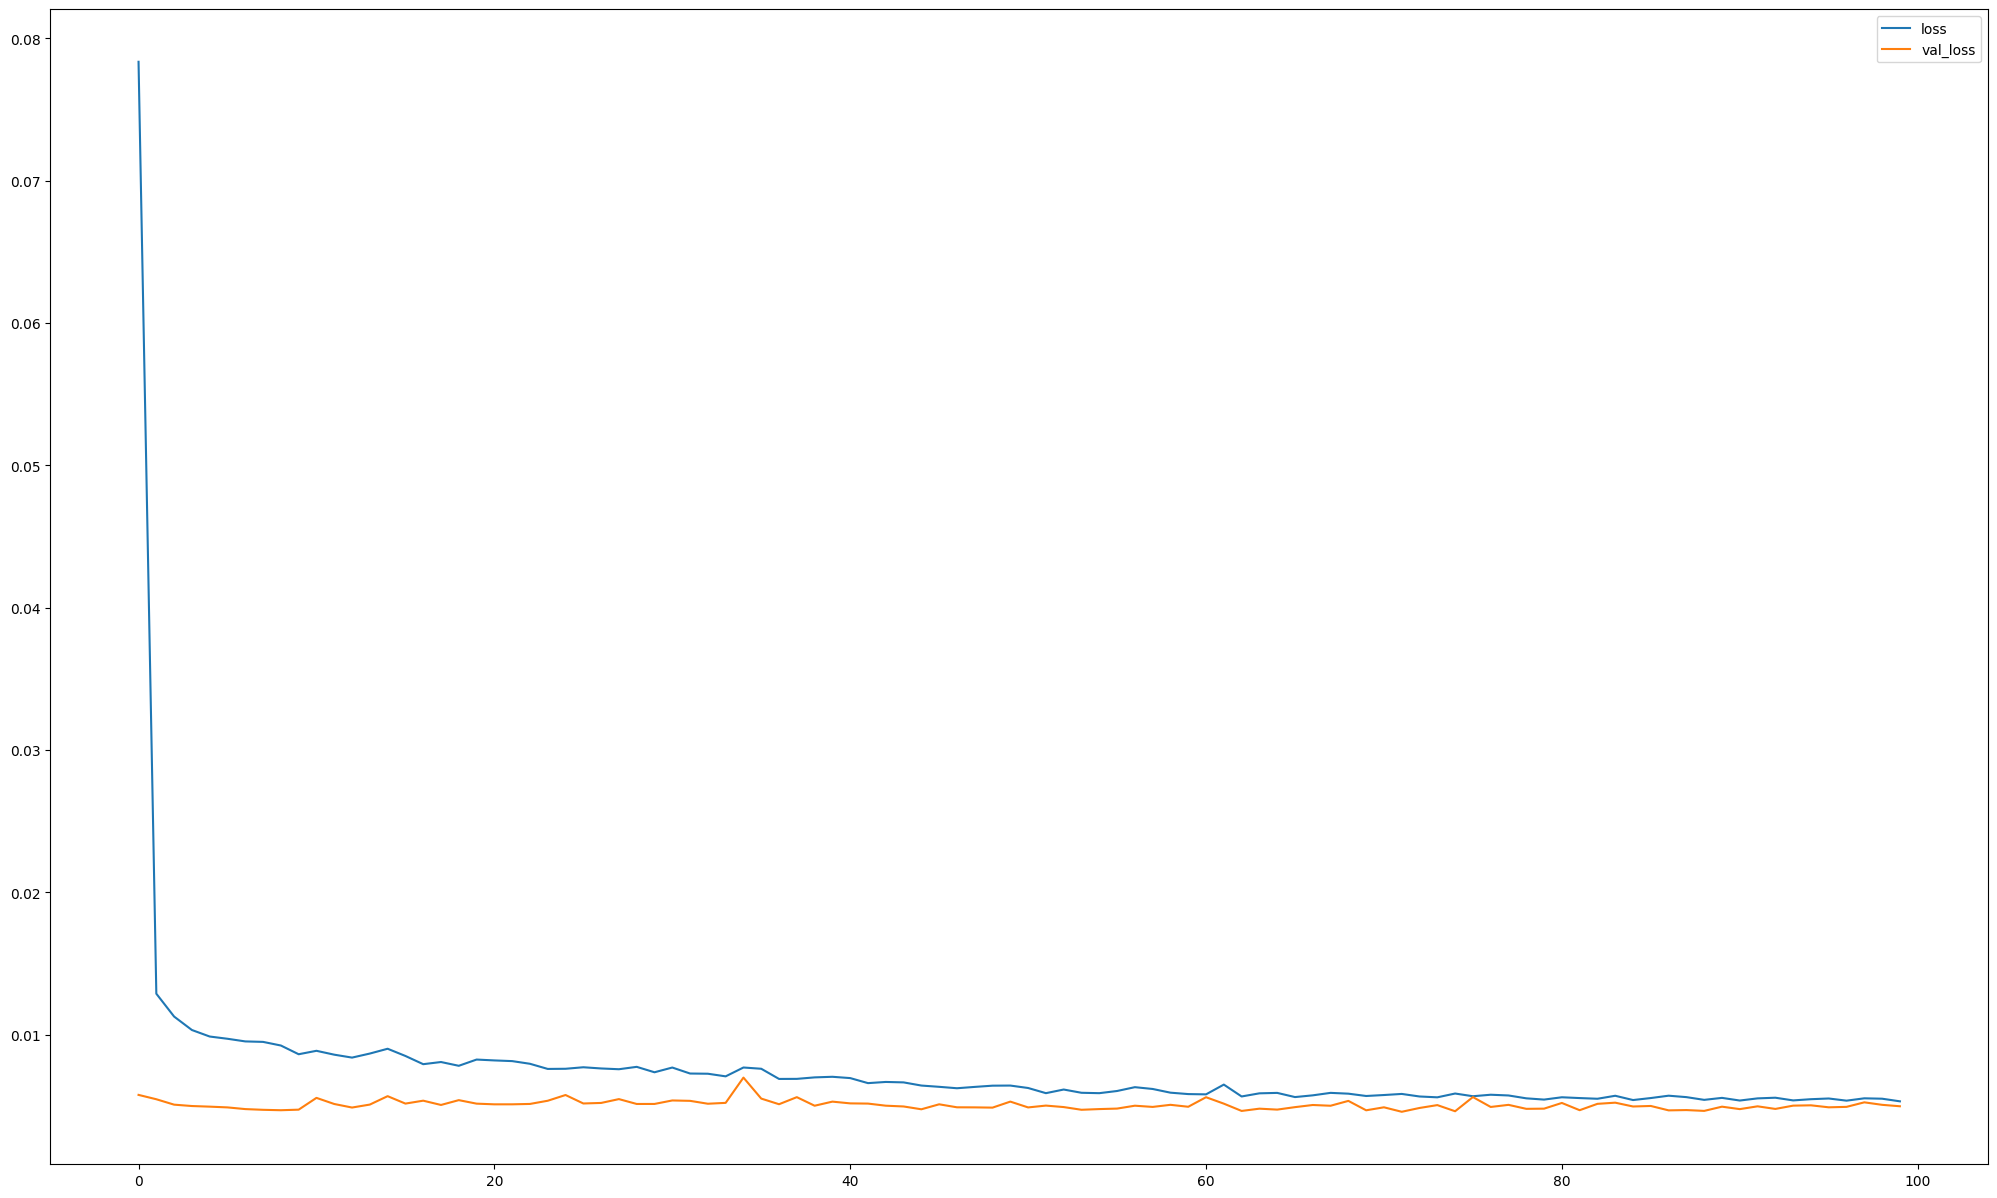

In [ ]:
%matplotlib inline
losses = pd.DataFrame(history1.history)
losses.plot()

In [ ]:
trainPredict = model1.predict(X_train)
testPredict = model1.predict(X_test)

trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
# Reshape to the correct number of test data points (132) and 1 column
plot_predicted = plot_predicted.reshape(len(testY[0]), 1) # Use the length of testY[0] which is 132
plot_actual = testY.copy()
# Reshape testY to match the shape of plot_predicted
plot_actual = plot_actual.reshape(len(testY[0]), 1)
print(plot_actual.shape)
print(plot_predicted.shape)

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
(131, 1)
(131, 1)


In [ ]:
# Input contains NAN

print(df_bakery.isna().sum())

# Drop Missing row

df_bakery.dropna(inplace=True)

sales             0
weekday           0
dayofweek         0
lag1              0
lag6              0
lag7              0
rolling_mean      0
rolling_median    0
dtype: int64


<ipython-input-99-1a3d6bd09f75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bakery.dropna(inplace=True)


In [ ]:
# Check for NaNs in trainPredict and trainY
print("Number of NaNs in trainPredict:", np.isnan(trainPredict).sum())
print("Number of NaNs in trainY:", np.isnan(trainY).sum())

# Check for NaNs in testPredict and testY
print("Number of NaNs in testPredict:", np.isnan(testPredict).sum())
print("Number of NaNs in testY:", np.isnan(testY).sum())

Number of NaNs in trainPredict: 0
Number of NaNs in trainY: 0
Number of NaNs in testPredict: 0
Number of NaNs in testY: 0


In [ ]:
# check trainScore dan testScore referensi mentoring.

# Flatten
trainY_flat = trainY[0]
trainPredict_flat = trainPredict[:, 0]

# Masking: Hapus nilai NaN
mask_train = ~np.isnan(trainY_flat) & ~np.isnan(trainPredict_flat) & (trainY_flat != 0)
trainY_clean = trainY_flat[mask_train]
trainPredict_clean = trainPredict_flat[mask_train]

# Cek apakah data kosong
if len(trainY_clean) > 0:
    trainScore = np.sqrt(mean_squared_error(trainY_clean, trainPredict_clean)) ** 0.5
    print("Train Score: %.2f RMSE" % trainScore)
else:
    print("Train data kosong setelah filtering NaN.")

# Sama untuk test
testY_flat = testY[0]
testPredict_flat = testPredict[:, 0]

mask_test = ~np.isnan(testY_flat) & ~np.isnan(testPredict_flat) & (testY_flat != 0)
testY_clean = testY_flat[mask_test]
testPredict_clean = testPredict_flat[mask_test]

if len(testY_clean) > 0:
    testScore = np.sqrt(mean_squared_error(testY_clean, testPredict_clean)) ** 0.5
    print("Test Score: %.2f RMSE" % testScore)
else:
    print("Test data kosong setelah filtering NaN.")

Train Score: 7.66 RMSE
Test Score: 7.07 RMSE


In [ ]:
# check trainScore dan testScore RMSE (references sesi 14)
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) ** .5
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0])) ** .5
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.83 RMSE
Test Score: 7.07 RMSE


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

def masked_rmse(y_true, y_pred):
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred) & (y_true != 0)
    return mean_squared_error(y_true[mask], y_pred[mask]) ** 0.5

trainScore = masked_rmse(trainY[0], trainPredict[:,0])
print('Train Score: %.2f RMSE' % (trainScore))

testScore = masked_rmse(testY[0], testPredict[:,0])
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 58.69 RMSE
Test Score: 49.95 RMSE


In [ ]:
# # Hapus nilai NaN
# mask_train = ~np.isnan(trainY[0]) & ~np.isnan(trainPredict)
# trainY_clean = trainY[mask_train]
# trainPredict_clean = trainPredict[mask_train]


# #train_mask = ~np.isnan(trainY[0]) & ~np.isnan(trainPredict.flatten())
# trainScore = mean_squared_error(trainY[0], trainPredict.flatten()) ** .5
# print('Train Score: %.2f RMSE' % (trainScore))

# #test_mask = ~np.isnan(testY[0]) & ~np.isnan(testPredict.flatten())
# testScore = mean_squared_error(testY[0], testPredict.flatten()) ** .5
# print('Test Score: %.2f RMSE' % (testScore))


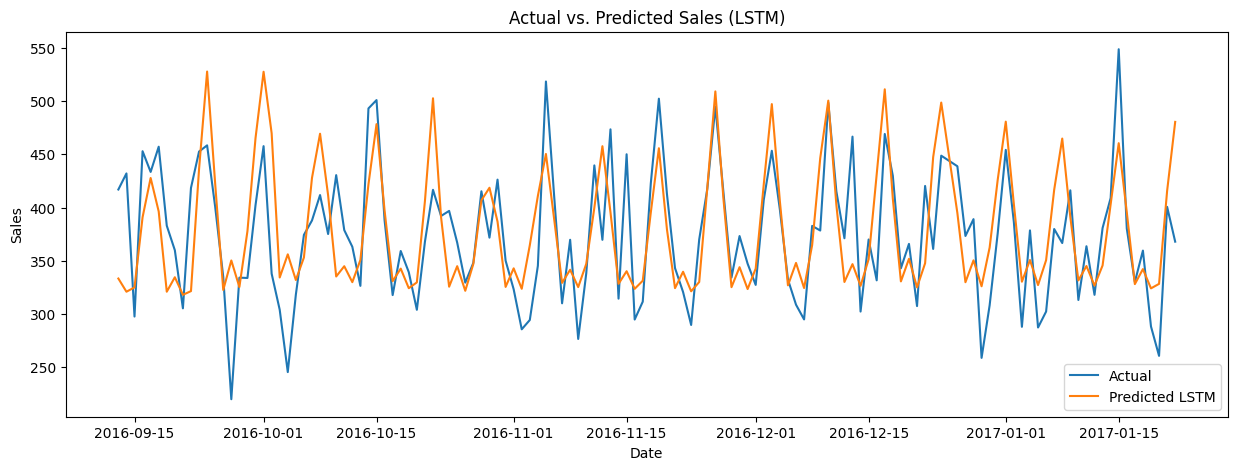

LSTM MAPE: 10.831210686169463 %
LSTM MAE: 66.97800148787302

Model Evaluation on Test Data:
     Metric     SARIMA       LSTM
0  MAPE (%)  16.401324  10.831211
1       MAE  59.184748  66.978001
2      RMSE  75.892168  49.953390


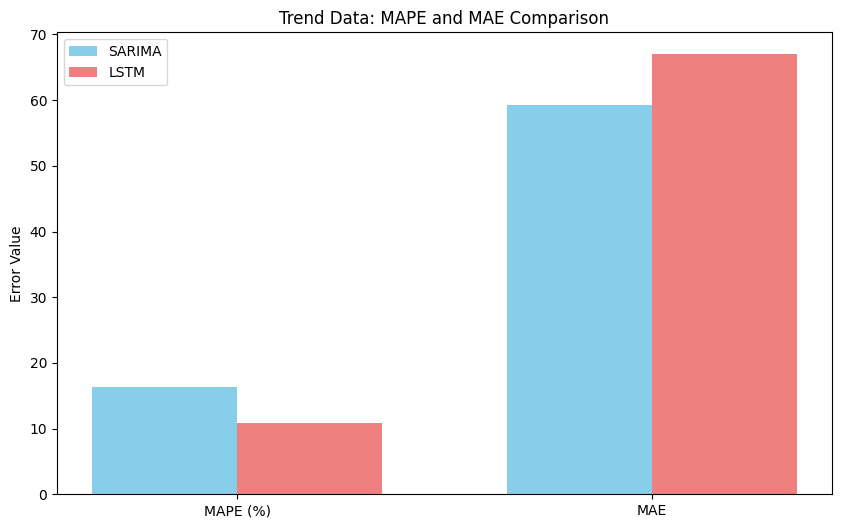

In [ ]:
 # prompt: buatkan trend data test pada mape dan mae

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 5))
plt.plot(df_bakery_val.index[:len(testY[0])], testY[0], label='Actual')
plt.plot(df_bakery_val.index[:len(plot_predicted)], plot_predicted, label='Predicted LSTM')
plt.title('Actual vs. Predicted Sales (LSTM)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Calculate MAPE and MAE for LSTM
lstm_mape = mean_absolute_percentage_error(testY[0], plot_predicted) * 100
lstm_mae = np.mean(np.abs(testY[0] - plot_predicted))

print('LSTM MAPE:', lstm_mape, '%')
print('LSTM MAE:', lstm_mae)

# Create a DataFrame for SARIMA and LSTM evaluation
evaluation_df = pd.DataFrame({
    'Metric': ['MAPE (%)', 'MAE', 'RMSE'],
    'SARIMA': [mape, mae, rmse],
    'LSTM': [lstm_mape, lstm_mae, testScore]
})

print("\nModel Evaluation on Test Data:")
print(evaluation_df)

# Plotting the trend data for MAPE and MAE
metrics_to_plot = ['MAPE (%)', 'MAE']
models = ['SARIMA', 'LSTM']

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(metrics_to_plot))

for i, metric in enumerate(metrics_to_plot):
    values = [evaluation_df[evaluation_df['Metric'] == metric]['SARIMA'].values[0],
              evaluation_df[evaluation_df['Metric'] == metric]['LSTM'].values[0]]
    plt.bar(index[i] - bar_width/2, values[0], bar_width, label=models[0] if i == 0 else "", color='skyblue')
    plt.bar(index[i] + bar_width/2, values[1], bar_width, label=models[1] if i == 0 else "", color='lightcoral')

plt.ylabel('Error Value')
plt.title('Trend Data: MAPE and MAE Comparison')
plt.xticks(index, metrics_to_plot)
plt.legend()
plt.show()


In [ ]:
plot_x = df_bakery_val.index

In [ ]:
# plot_x = df_bakery.reset_index()

In [ ]:
# plot_x = plot_x['date']

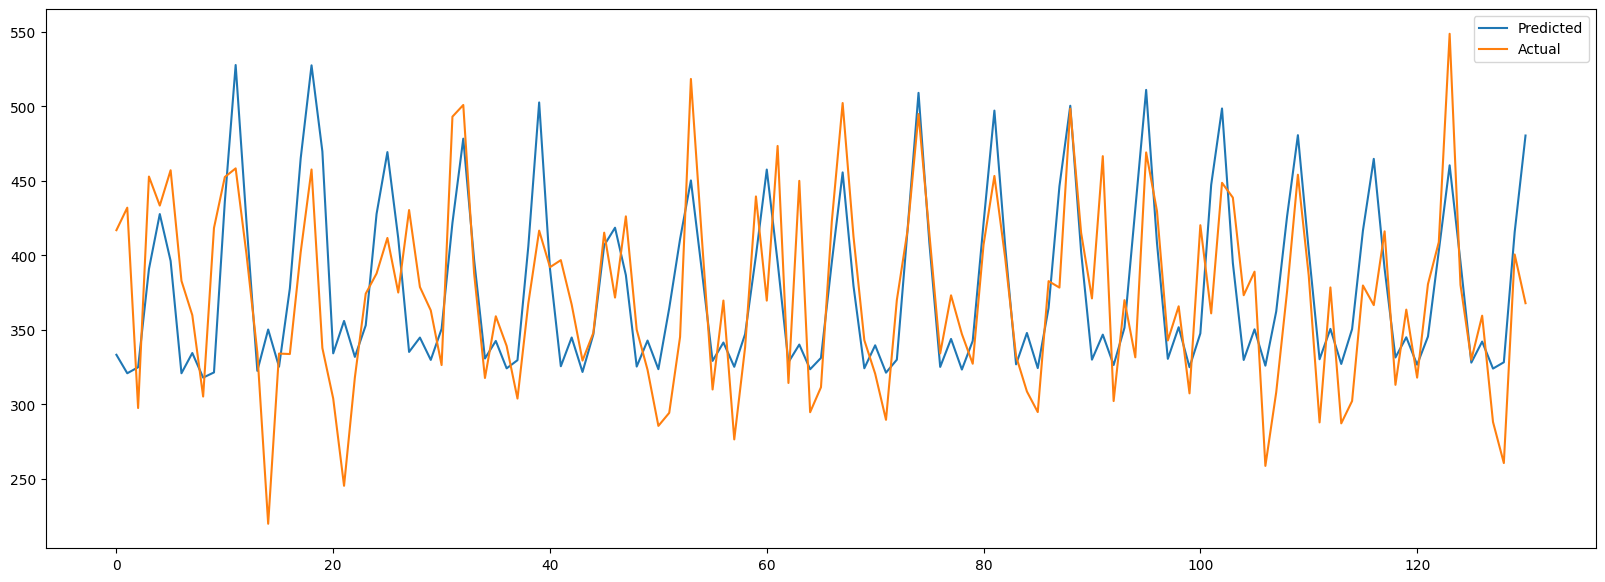

In [ ]:
plt.figure(figsize=(20,7))
plot_x = pd.to_datetime(plot_x)
plt.plot(pd.DataFrame(plot_predicted), label='Predicted')
plt.plot(pd.DataFrame(plot_actual), label='Actual')
plt.legend(loc='best')
plt.show()

#### Model 2 - Stack LSTM using Dropout

In [ ]:
#LSTM architecture
model2 = Sequential()
# First LSTM layer with Dropout regularisation
# Added return_sequences=True to pass the full sequence to the next LSTM layer
model2.add(LSTM(units=50, input_shape=(window,X_train.shape[2]), return_sequences=True))
model2.add(Dropout(0.2))
# Second LSTM layer
model2.add(LSTM(units=50))
model2.add(Dropout(0.2))

# The output layer
model2.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model2.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))


# Compiling the RNN
model2.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
history2 = model2.fit(X_train,y_train,epochs=100,batch_size=35, validation_split=0.05, verbose=1)
print ('compilation time : ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.1450 - val_loss: 0.0051
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0162 - val_loss: 0.0078
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0130 - val_loss: 0.0056
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - val_loss: 0.0056
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0103 - val_loss: 0.0053
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0101 - val_loss: 0.0052
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0109 - val_loss: 0.0053
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0109 - val_loss: 0.0060
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0106 - val_loss: 0.0056
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0094 - val_loss: 0.0052
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0110 - val_loss: 0.0051
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0

<Axes: >

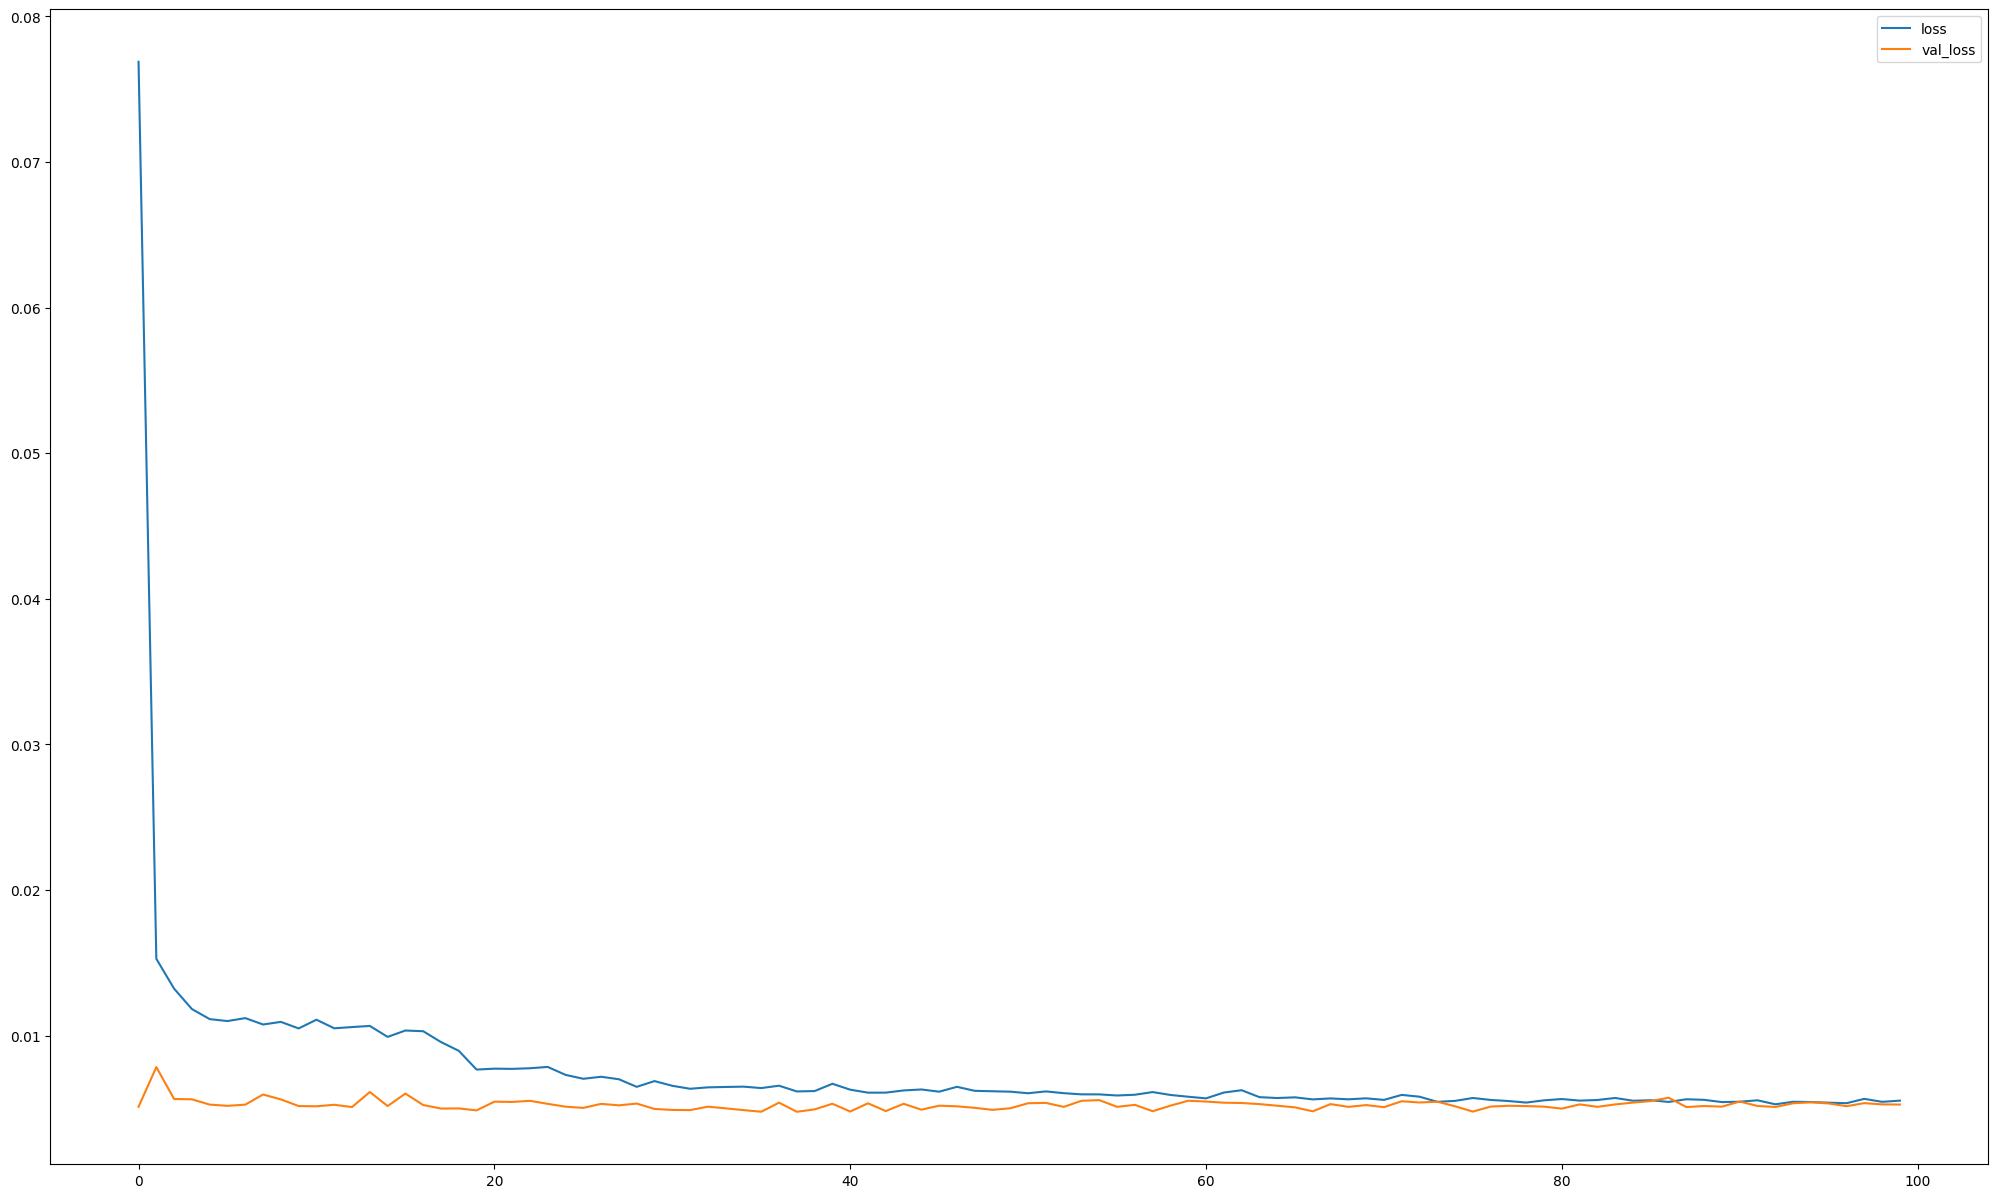

In [ ]:
%matplotlib inline
losses = pd.DataFrame(history2.history)
losses.plot()

In [ ]:
trainPredict = model2.predict(X_train)
testPredict = model2.predict(X_test)

trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
# Reshape to the correct number of test data points (132) and 1 column
plot_predicted = plot_predicted.reshape(len(testY[0]), 1) # Use the length of testY[0] which is 132
plot_actual = testY.copy()
# Reshape testY to match the shape of plot_predicted
plot_actual = plot_actual.reshape(len(testY[0]), 1)
print(plot_actual.shape)
print(plot_predicted.shape)

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
(131, 1)
(131, 1)


In [ ]:
# Flatten
trainY_flat = trainY[0]
trainPredict_flat = trainPredict[:, 0]

# Masking: Hapus nilai NaN
mask_train = ~np.isnan(trainY_flat) & ~np.isnan(trainPredict_flat) & (trainY_flat != 0)
trainY_clean = trainY_flat[mask_train]
trainPredict_clean = trainPredict_flat[mask_train]

# Cek apakah data kosong
if len(trainY_clean) > 0:
    trainScore = np.sqrt(mean_squared_error(trainY_clean, trainPredict_clean)) ** 0.5
    print("Train Score: %.2f RMSE" % trainScore)
else:
    print("Train data kosong setelah filtering NaN.")

# Sama untuk test
testY_flat = testY[0]
testPredict_flat = testPredict[:, 0]

mask_test = ~np.isnan(testY_flat) & ~np.isnan(testPredict_flat) & (testY_flat != 0)
testY_clean = testY_flat[mask_test]
testPredict_clean = testPredict_flat[mask_test]

if len(testY_clean) > 0:
    testScore = np.sqrt(mean_squared_error(testY_clean, testPredict_clean)) ** 0.5
    print("Test Score: %.2f RMSE" % testScore)
else:
    print("Test data kosong setelah filtering NaN.")

Train Score: 7.35 RMSE
Test Score: 6.97 RMSE


In [ ]:
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) ** .5
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0])) ** .5
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.56 RMSE
Test Score: 6.97 RMSE


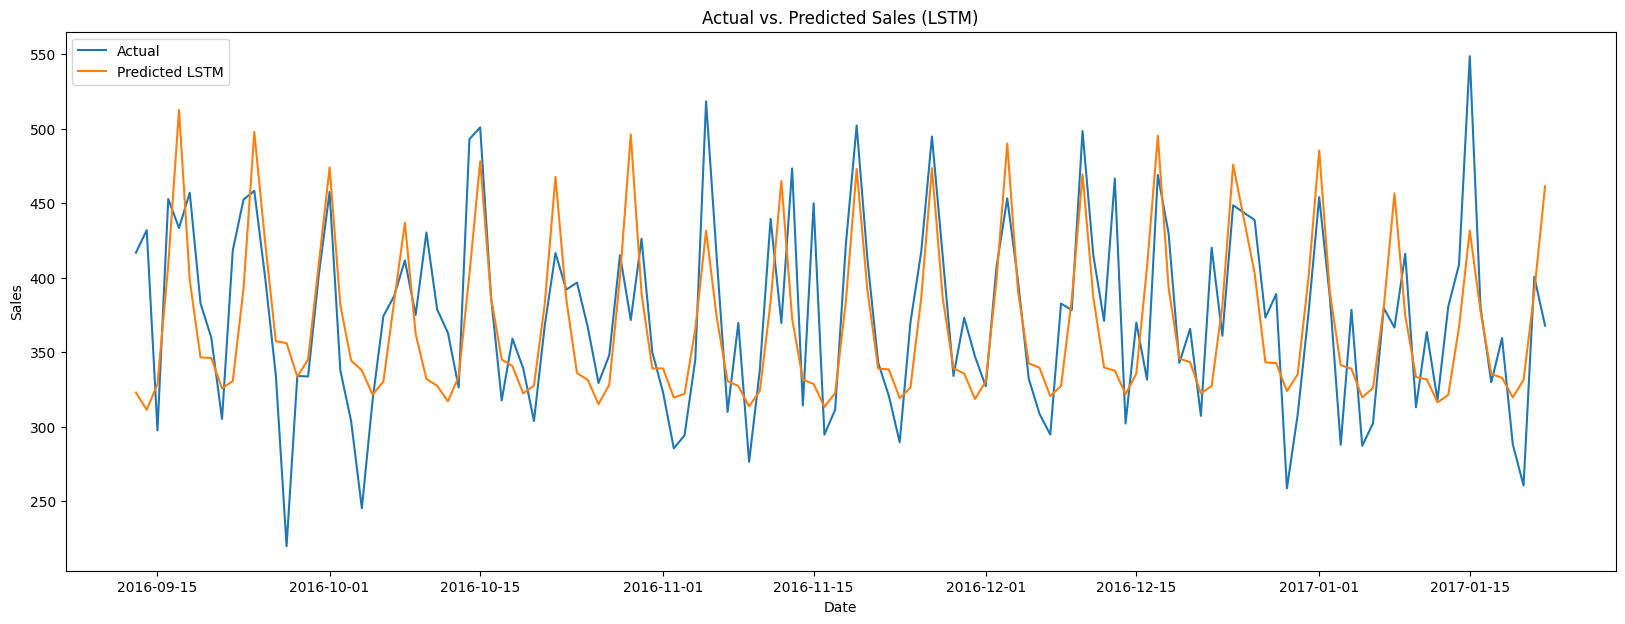

In [ ]:
plt.figure(figsize=(20,7))
plt.plot(df_bakery_val.index[:len(testY[0])], testY[0], label='Actual')
plt.plot(df_bakery_val.index[:len(plot_predicted)], plot_predicted, label='Predicted LSTM')
plt.title('Actual vs. Predicted Sales (LSTM)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Stack LSTM Bidirectional

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional # Explicitly import LSTM again
from tensorflow.keras.callbacks import EarlyStopping

#LSTM architecture
model3 = Sequential()
# First LSTM layer with Dropout regularisation
model3.add(Bidirectional(LSTM(units=50, input_shape=(window,X_train.shape[2])))) # Use the number of features from X_train
model3.add(Dropout(0.2))

# The output layer
model3.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model3.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))


# Compiling the RNN
model3.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
history3 = model3.fit(X_train,y_train,epochs=100,batch_size=35, validation_split=0.05, verbose=1)
print ('compilation time : ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.1258 - val_loss: 0.0048
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0097 - val_loss: 0.0051
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0098 - val_loss: 0.0047
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0102 - val_loss: 0.0046
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0089 - val_loss: 0.0047
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0077 - val_loss: 0.0052
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0092 - val_loss: 0.0048
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0084 - val_loss: 0.0054
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0088 - val_loss: 0.0049
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0081 - val_loss: 0.0051
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0070 - val_loss: 0.0053
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0

<Axes: >

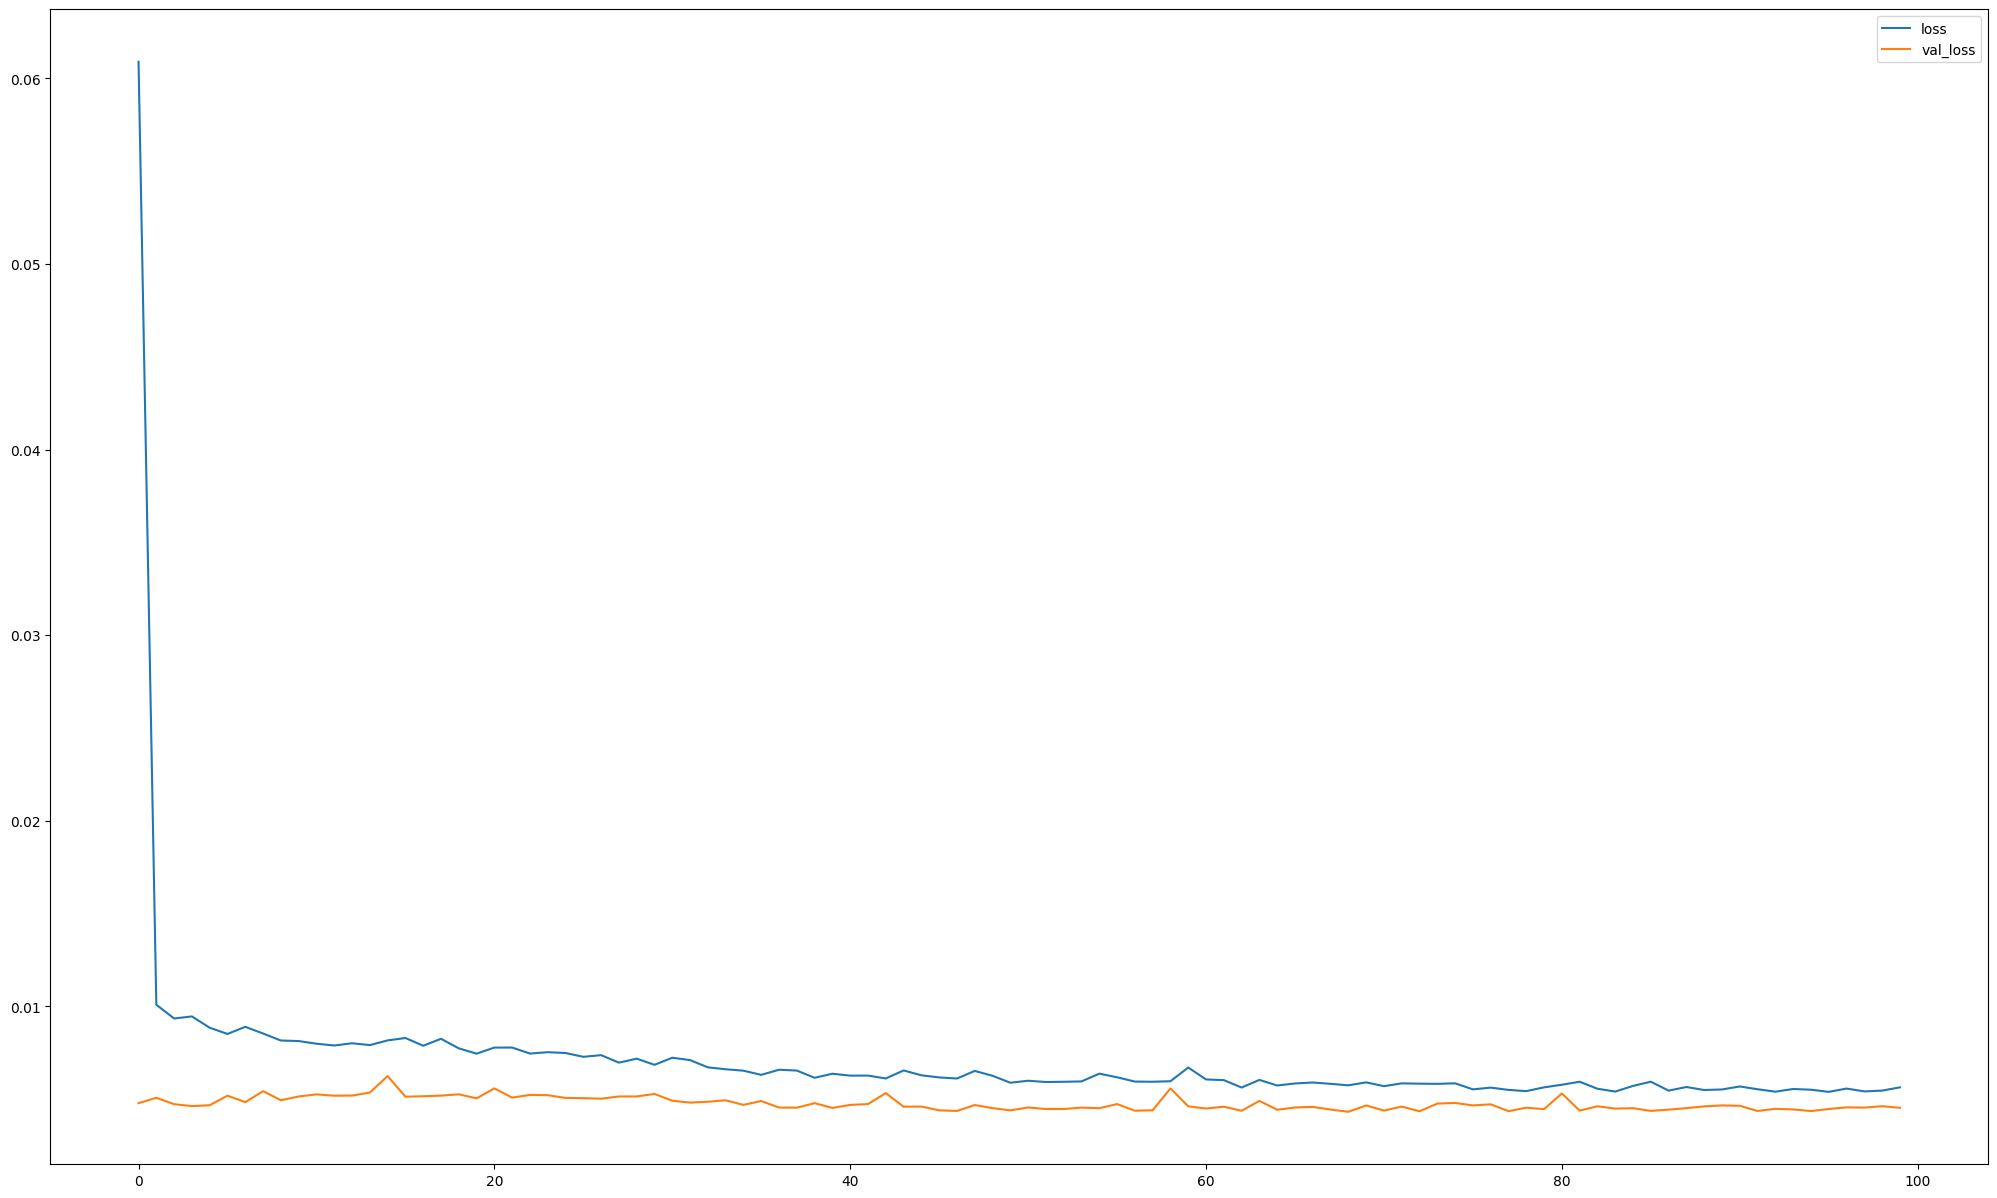

In [ ]:
%matplotlib inline
losses = pd.DataFrame(history3.history)
losses.plot()

In [ ]:
trainPredict = model3.predict(X_train)
testPredict = model3.predict(X_test)

trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
# Reshape to the correct number of test data points (132) and 1 column
plot_predicted = plot_predicted.reshape(len(testY[0]), 1) # Use the length of testY[0] which is 132
plot_actual = testY.copy()
# Reshape testY to match the shape of plot_predicted
plot_actual = plot_actual.reshape(len(testY[0]), 1)
print(plot_actual.shape)
print(plot_predicted.shape)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(131, 1)
(131, 1)


In [ ]:
# Flatten
trainY_flat = trainY[0]
trainPredict_flat = trainPredict[:, 0]

# Masking: Hapus nilai NaN
mask_train = ~np.isnan(trainY_flat) & ~np.isnan(trainPredict_flat) & (trainY_flat != 0)
trainY_clean = trainY_flat[mask_train]
trainPredict_clean = trainPredict_flat[mask_train]

# Cek apakah data kosong
if len(trainY_clean) > 0:
    trainScore = np.sqrt(mean_squared_error(trainY_clean, trainPredict_clean)) ** 0.5
    print("Train Score: %.2f RMSE" % trainScore)
else:
    print("Train data kosong setelah filtering NaN.")

# Sama untuk test
testY_flat = testY[0]
testPredict_flat = testPredict[:, 0]

mask_test = ~np.isnan(testY_flat) & ~np.isnan(testPredict_flat) & (testY_flat != 0)
testY_clean = testY_flat[mask_test]
testPredict_clean = testPredict_flat[mask_test]

if len(testY_clean) > 0:
    testScore = np.sqrt(mean_squared_error(testY_clean, testPredict_clean)) ** 0.5
    print("Test Score: %.2f RMSE" % testScore)
else:
    print("Test data kosong setelah filtering NaN.")

Train Score: 7.42 RMSE
Test Score: 6.82 RMSE


In [ ]:
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) ** .5
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0])) ** .5
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.58 RMSE
Test Score: 6.82 RMSE


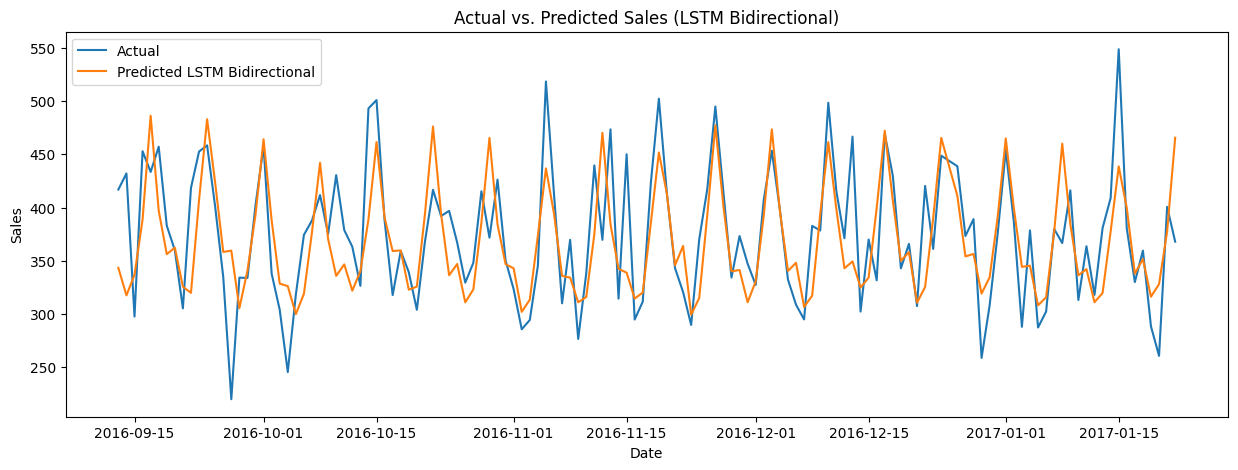

In [ ]:
# Plot LSTM Bidirectional

plt.figure(figsize=(15, 5))
plt.plot(df_bakery_val.index[:len(testY[0])], testY[0], label='Actual')
plt.plot(df_bakery_val.index[:len(plot_predicted)], plot_predicted, label='Predicted LSTM Bidirectional')
plt.title('Actual vs. Predicted Sales (LSTM Bidirectional)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### *Model* 4 GRU

In [ ]:
#LSTM architecture
model4 = Sequential()
# First LSTM layer with Dropout regularisation
model4.add(GRU(units=50, input_shape=(window,X_train.shape[2]))) # Use the number of features from X_train
model4.add(Dropout(0.2))

# The output layer
model4.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model4.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))


# Compiling the RNN
model4.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
history4 = model4.fit(X_train,y_train,epochs=100,batch_size=35, validation_split=0.05, verbose=1)
print ('compilation time : ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.1484 - val_loss: 0.0066
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0118 - val_loss: 0.0049
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0089 - val_loss: 0.0055
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0089 - val_loss: 0.0052
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0091 - val_loss: 0.0052
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0092 - val_loss: 0.0058
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0091 - val_loss: 0.0054
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0080 - val_loss: 0.0053
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0082 - val_loss: 0.0052
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0087 - val_loss: 0.0059
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0081 - val_loss: 0.0052
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0

<Axes: >

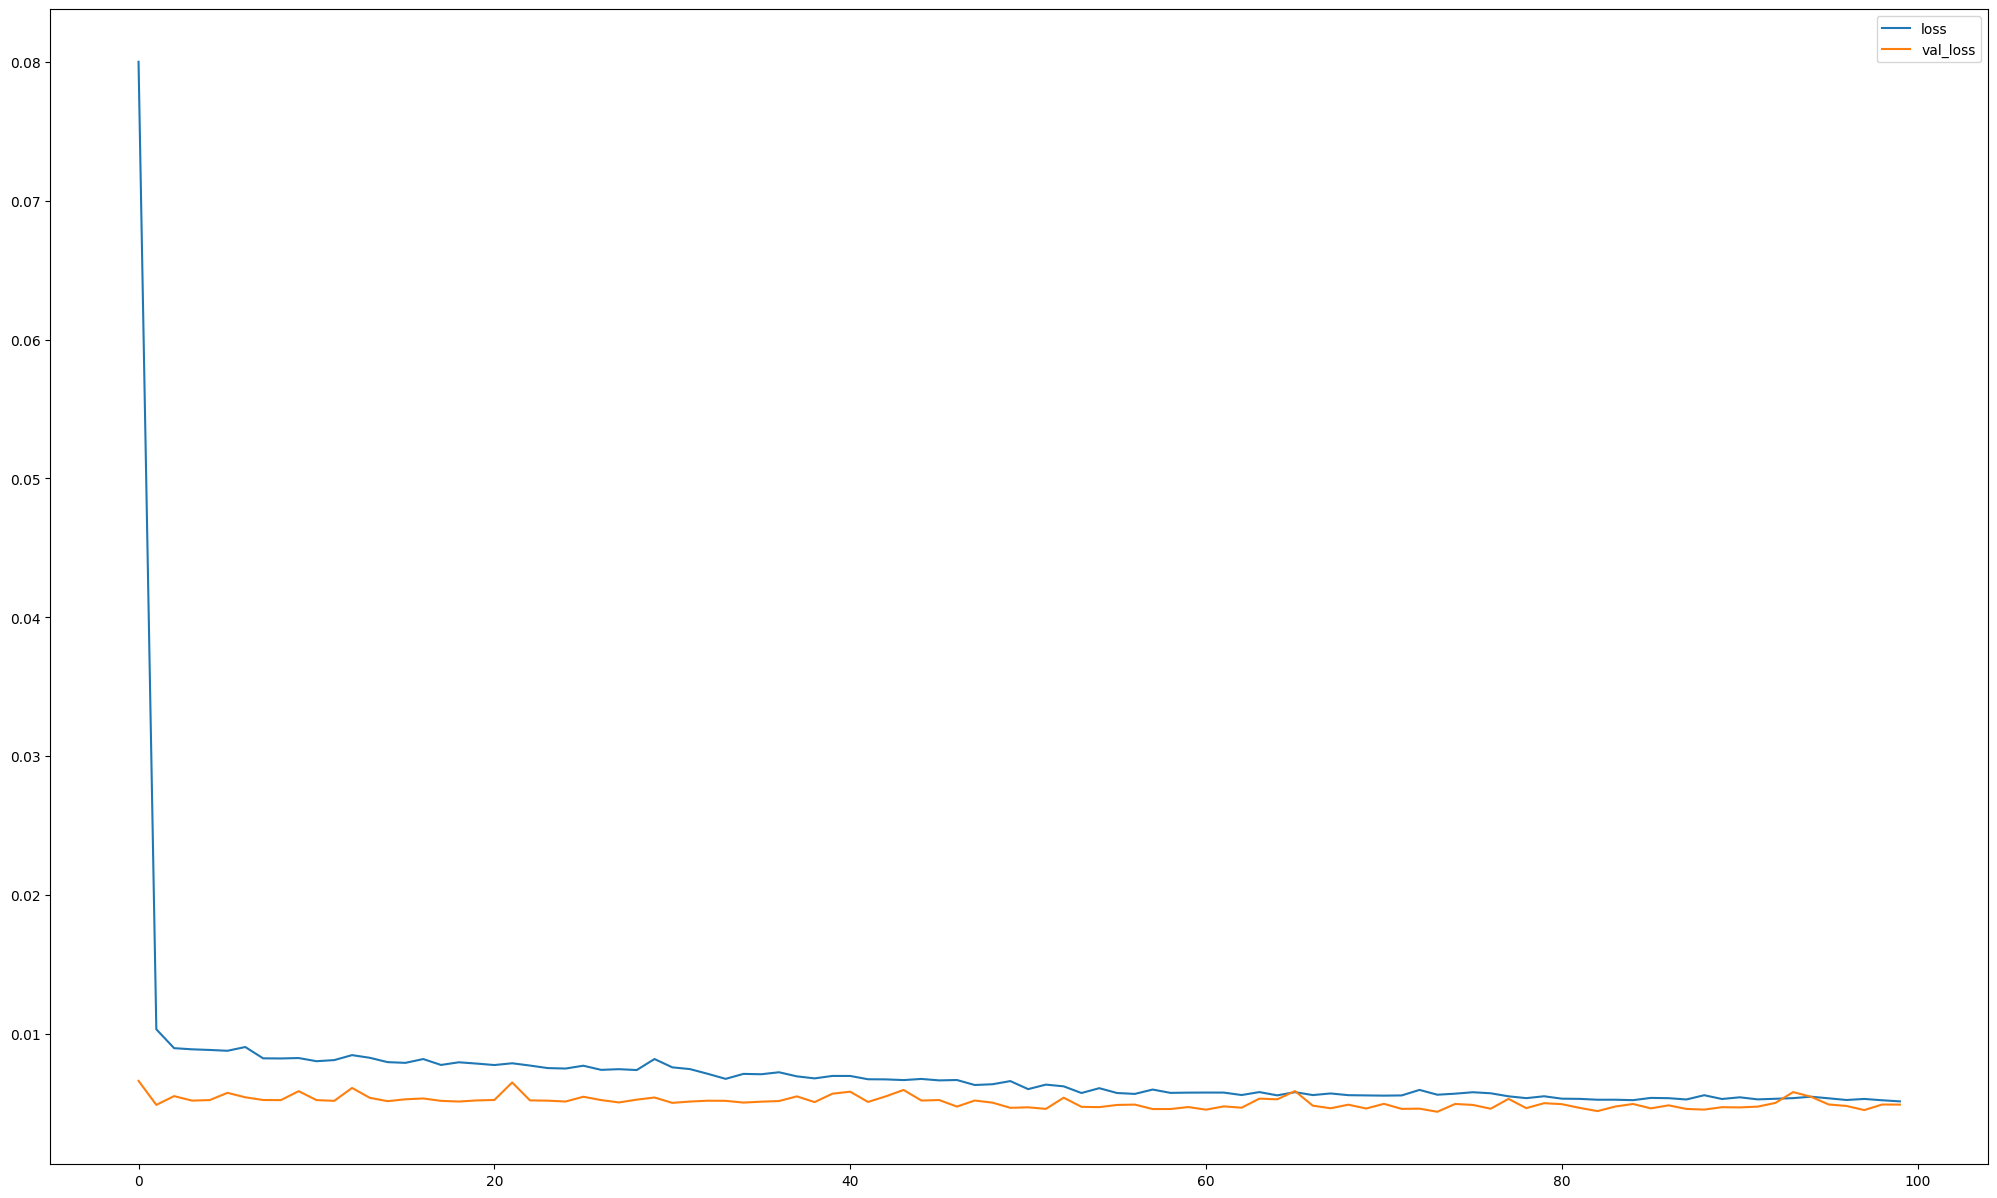

In [ ]:
%matplotlib inline
losses = pd.DataFrame(history4.history)
losses.plot()

In [ ]:
trainPredict = model4.predict(X_train)
testPredict = model4.predict(X_test)

trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
# Reshape to the correct number of test data points (132) and 1 column
plot_predicted = plot_predicted.reshape(len(testY[0]), 1) # Use the length of testY[0] which is 132
plot_actual = testY.copy()
# Reshape testY to match the shape of plot_predicted
plot_actual = plot_actual.reshape(len(testY[0]), 1)
print(plot_actual.shape)
print(plot_predicted.shape)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
(131, 1)
(131, 1)


In [ ]:
# # Flatten
# trainY_flat = trainY[0]
# trainPredict_flat = trainPredict[:, 0]

# # Masking: Hapus nilai NaN
# mask_train = ~np.isnan(trainY_flat) & ~np.isnan(trainPredict_flat) & (trainY_flat != 0)
# trainY_clean = trainY_flat[mask_train]
# trainPredict_clean = trainPredict_flat[mask_train]

# # Cek apakah data kosong
# if len(trainY_clean) > 0:
#     trainScore = np.sqrt(mean_squared_error(trainY_clean, trainPredict_clean)) ** 0.5
#     print("Train Score: %.2f RMSE" % trainScore)
# else:
#     print("Train data kosong setelah filtering NaN.")

# # Sama untuk test
# testY_flat = testY[0]
# testPredict_flat = testPredict[:, 0]

# mask_test = ~np.isnan(testY_flat) & ~np.isnan(testPredict_flat) & (testY_flat != 0)
# testY_clean = testY_flat[mask_test]
# testPredict_clean = testPredict_flat[mask_test]

# if len(testY_clean) > 0:
#     testScore = np.sqrt(mean_squared_error(testY_clean, testPredict_clean)) ** 0.5
#     print("Test Score: %.2f RMSE" % testScore)
# else:
#     print("Test data kosong setelah filtering NaN.")

In [ ]:
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) ** .5
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0])) ** .5
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.51 RMSE
Test Score: 6.94 RMSE


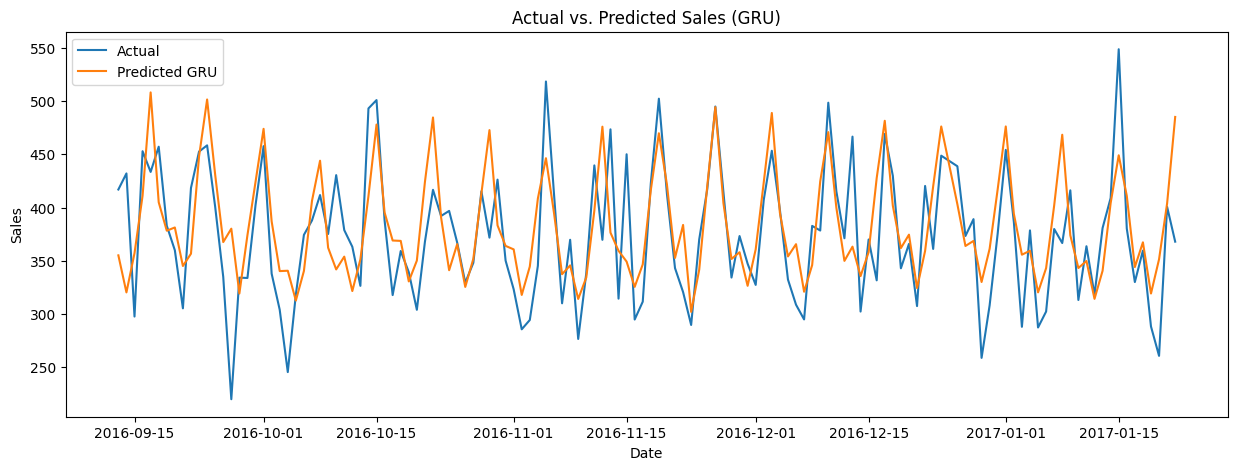

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_bakery_val.index[:len(testY[0])], testY[0], label='Actual')
plt.plot(df_bakery_val.index[:len(plot_predicted)], plot_predicted, label='Predicted GRU')
plt.title('Actual vs. Predicted Sales (GRU)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### LSTM, Batchnormalization and Regularization (L1 dan L2)

In [ ]:
# LSTM using BatchNormalization and Regularization (L1 and L2)
#LSTM architecture
model5 = Sequential()
# First LSTM layer with Dropout regularisation
# Changed input_shape to match the number of features in X_train (8)
model5.add(LSTM(units=50, input_shape=(window, X_train.shape[2]),kernel_regularizer='l2'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))

# The output layer
model5.add(Dense(units=50, kernel_initializer='uniform', activation='tanh'))
model5.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))


# Compiling the RNN
model5.compile(optimizer='adam',loss='mean_squared_error')
# Fitting to the training set
start = time.time()
history5=model5.fit(X_train,y_train,epochs=100,batch_size=35, validation_split=0.05, verbose=1)
print ('compilation time : ', time.time() - start)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3639 - val_loss: 0.1860
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1753 - val_loss: 0.0593
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0577 - val_loss: 0.0347
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0339 - val_loss: 0.0242
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0242 - val_loss: 0.0177
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0187 - val_loss: 0.0142
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - val_loss: 0.0120
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - val_loss: 0.0115
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - val_loss: 0.0121
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0095 - val_loss: 0.0121
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0

<Axes: >

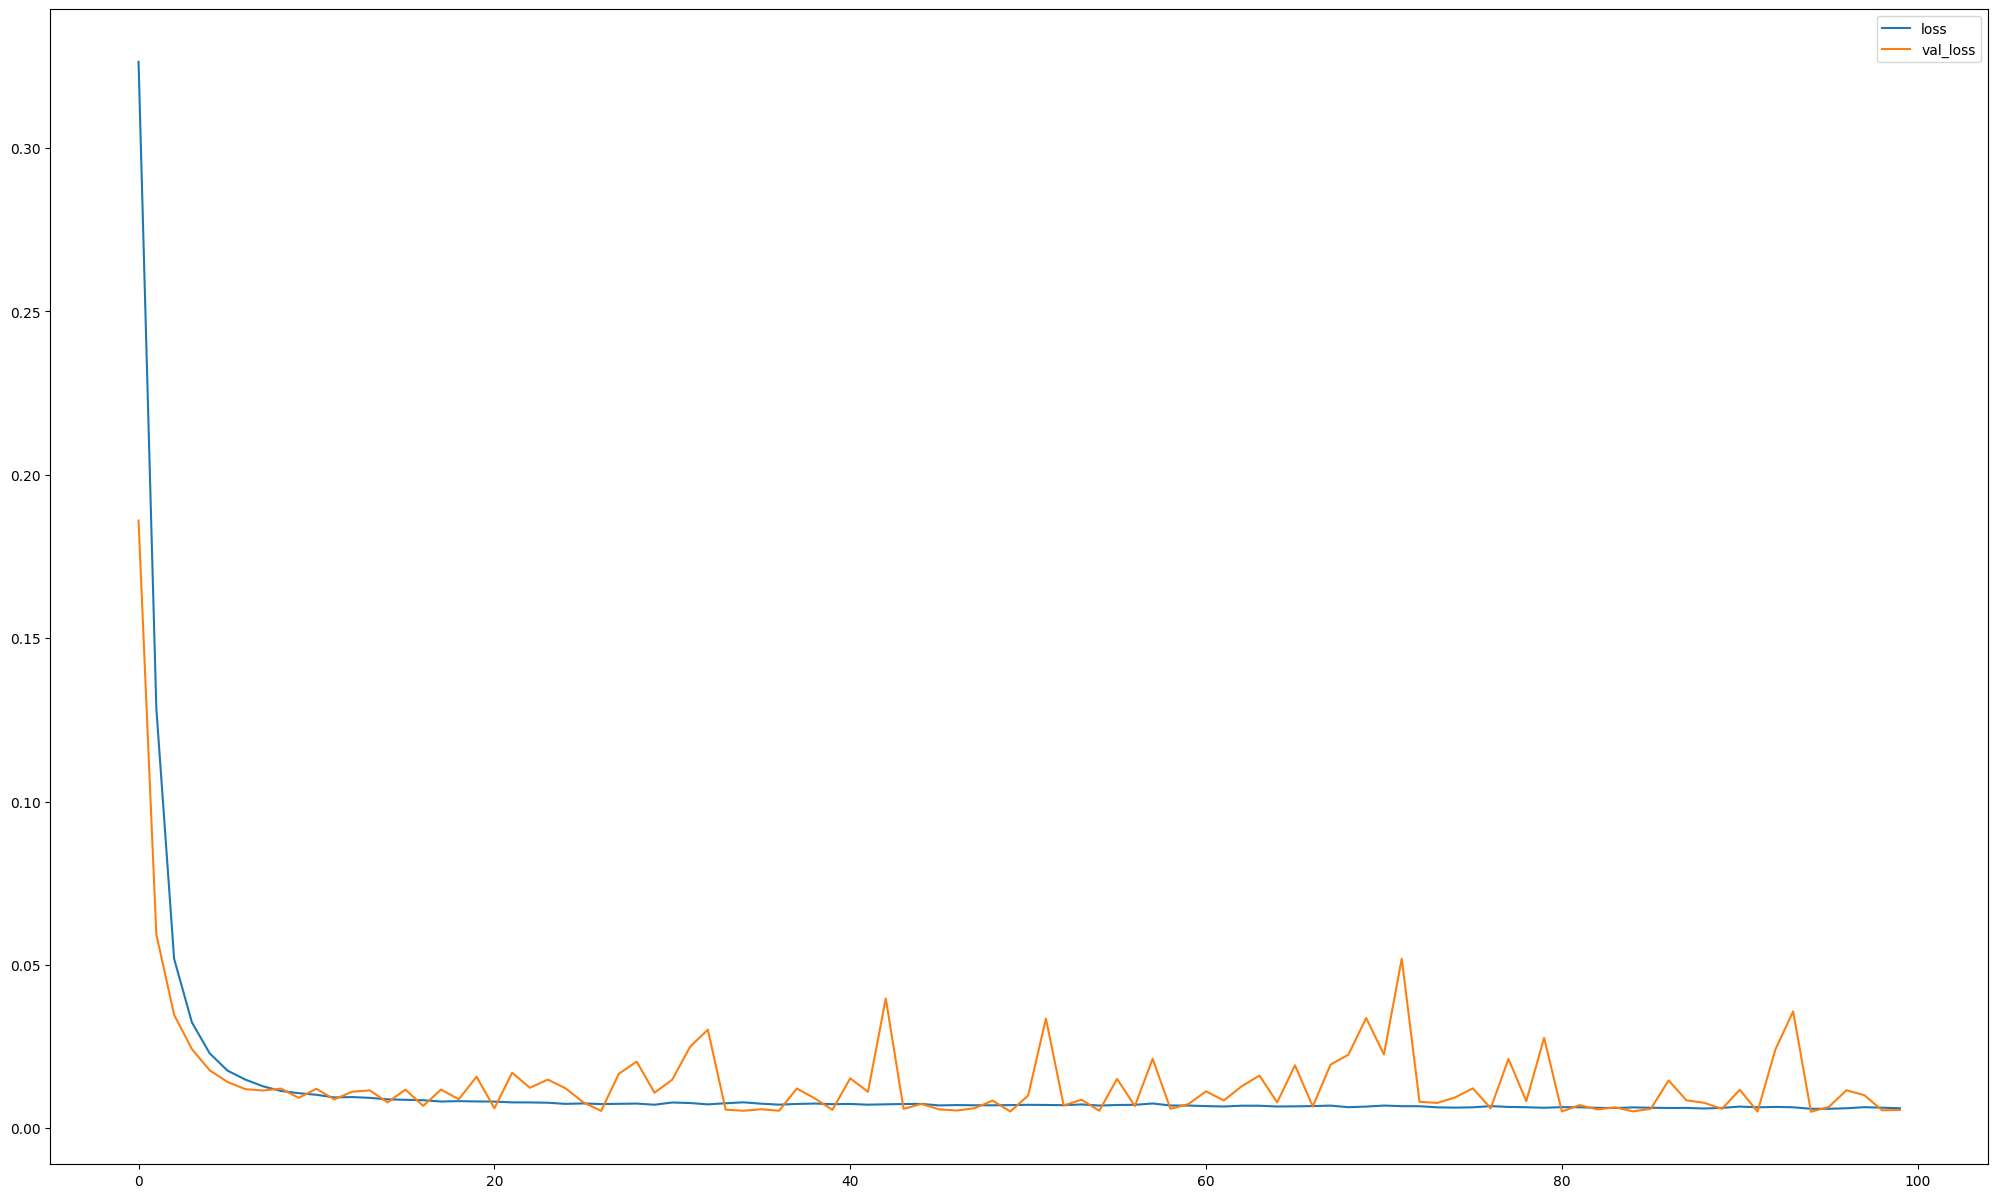

In [ ]:
%matplotlib inline
losses = pd.DataFrame(history5.history)
losses.plot()

In [ ]:
trainPredict = model5.predict(X_train)
testPredict = model5.predict(X_test)

trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

plot_predicted = testPredict.copy()
# Reshape to the correct number of test data points (132) and 1 column
plot_predicted = plot_predicted.reshape(len(testY[0]), 1) # Use the length of testY[0] which is 132
plot_actual = testY.copy()
# Reshape testY to match the shape of plot_predicted
plot_actual = plot_actual.reshape(len(testY[0]), 1)
print(plot_actual.shape)
print(plot_predicted.shape)

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(131, 1)
(131, 1)


In [ ]:
# prompt: check RMSE trainScore and testScore with masking !=0 to get correct results

import numpy as np
def masked_rmse(y_true, y_pred):
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred) & (y_true != 0)
    # Ensure both arrays are 1D before applying the mask
    y_true_masked = y_true[mask]
    y_pred_masked = y_pred[mask]
    if len(y_true_masked) == 0:
      return float('inf') # Return infinity if no non-zero data points remain
    return np.sqrt(mean_squared_error(y_true_masked, y_pred_masked)) ** 0.5

# Reshape trainPredict and testPredict to be 1D for easier handling
trainPredict_flat = trainPredict.flatten()
testPredict_flat = testPredict.flatten()

# Ensure trainY and testY are also 1D
trainY_flat = trainY.flatten()
testY_flat = testY.flatten()


trainScore = masked_rmse(trainY_flat, trainPredict_flat)
if trainScore != float('inf'):
    print('Train Score: %.2f RMSE' % (trainScore))
else:
    print("Train data empty after masking.")

testScore = masked_rmse(testY_flat, testPredict_flat)
if testScore != float('inf'):
    print('Test Score: %.2f RMSE' % (testScore))
else:
     print("Test data empty after masking.")


Train Score: 7.68 RMSE
Test Score: 6.93 RMSE


In [ ]:
# Flatten
trainY_flat = trainY[0]
trainPredict_flat = trainPredict[:, 0]

# Masking: Hapus nilai NaN
mask_train = ~np.isnan(trainY_flat) & ~np.isnan(trainPredict_flat) & (trainY_flat != 0)
trainY_clean = trainY_flat[mask_train]
trainPredict_clean = trainPredict_flat[mask_train]

# Cek apakah data kosong
if len(trainY_clean) > 0:
    trainScore = np.sqrt(mean_squared_error(trainY_clean, trainPredict_clean)) ** 0.5
    print("Train Score: %.2f RMSE" % trainScore)
else:
    print("Train data kosong setelah filtering NaN.")

# Sama untuk test
testY_flat = testY[0]
testPredict_flat = testPredict[:, 0]

mask_test = ~np.isnan(testY_flat) & ~np.isnan(testPredict_flat) & (testY_flat != 0)
testY_clean = testY_flat[mask_test]
testPredict_clean = testPredict_flat[mask_test]

if len(testY_clean) > 0:
    testScore = np.sqrt(mean_squared_error(testY_clean, testPredict_clean)) ** 0.5
    print("Test Score: %.2f RMSE" % testScore)
else:
    print("Test data kosong setelah filtering NaN.")

Train Score: 7.68 RMSE
Test Score: 6.93 RMSE


In [ ]:
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) ** .5
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0])) ** .5
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 7.84 RMSE
Test Score: 6.93 RMSE


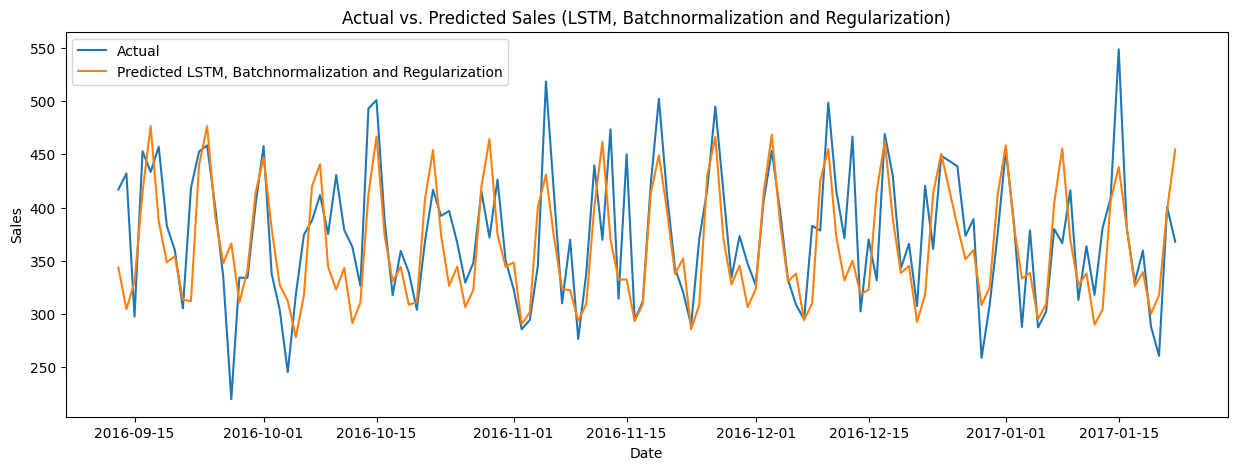

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_bakery_val.index[:len(testY[0])], testY[0], label='Actual')
plt.plot(df_bakery_val.index[:len(plot_predicted)], plot_predicted, label='Predicted LSTM, Batchnormalization and Regularization')
plt.title('Actual vs. Predicted Sales (LSTM, Batchnormalization and Regularization)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



#### Perbandingan Model

In [ ]:
model_c = [model1, model2, model3, model4, model5]
history = [history1, history2, history3, history4, history5]
trainScore = []
testScore = []

for i in range(5):
    # Use the list of models model_c and index it with i
    trainPredict = model_c[i].predict(X_train)
    testPredict = model_c[i].predict(X_test)

    trainPredict = y_scaler.inverse_transform(trainPredict)
    trainY = y_scaler.inverse_transform([y_train])
    testPredict = y_scaler.inverse_transform(testPredict)
    testY = y_scaler.inverse_transform([y_test])

    trainScore.append(np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) ** .5)
    testScore.append(np.sqrt(mean_squared_error(testY[0], testPredict[:,0])) ** .5)

    print('Model', i+1)
    print('Train Score: %.2f RMSE' % (trainScore[i]))
    print('Test Score: %.2f RMSE' % (testScore[i]))
    print('\n')

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model 1
Train Score: 7.83 RMSE
Test Score: 7.07 RMSE


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Model 2
Train Score: 7.56 RMSE
Test Score: 6.97 RMSE


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Model 3
Train Score: 7.58 RMSE
Test Score: 6.82 RMSE


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Model 4
Train Score: 7.51 RMSE
Test Score: 6.94 RMSE


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Model 5
Train Score: 7.84 RMSE
Test Score: 6.93 RMSE




In [ ]:
# Make trainscore and testscore to dataframe
name_of_model = ['LSTM', 'Stacked LSTM', 'Bidirectional LSTM', 'GRU', 'LSTM with BatchNormalization and Regularization']
df_score = pd.DataFrame({'Model':name_of_model,'Train Score': trainScore, 'Test Score': testScore})
df_score

Model  Train Score  Test Score
0                                             LSTM     7.834373    7.067771
1                                     Stacked LSTM     7.556771    6.965143
2                               Bidirectional LSTM     7.584702    6.822416
3                                              GRU     7.505837    6.935036
4  LSTM with BatchNormalization and Regularization     7.842641    6.925171

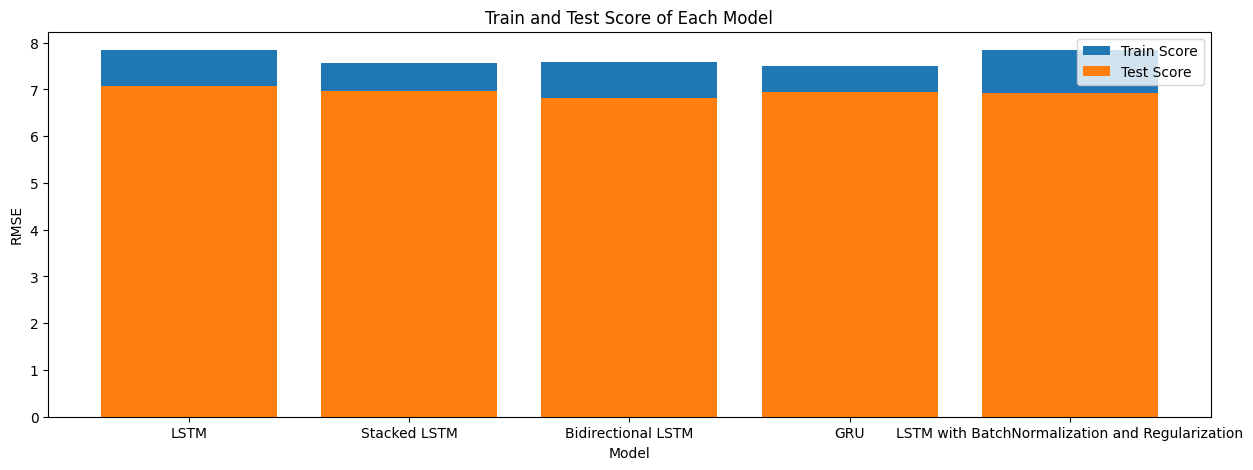

In [ ]:
# Plot the result with bar chart
plt.figure(figsize=(15, 5))
plt.bar(df_score['Model'], df_score['Train Score'], label='Train Score')
plt.bar(df_score['Model'], df_score['Test Score'], label='Test Score')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Train and Test Score of Each Model')
plt.legend(loc='best')
plt.show()

### Evaluation

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Evaluation for Single LSTM Model (with Dropout):
MAPE: 10.831210686169463 %
MAE: 39.50686087912989
RMSE: 49.953389838490466
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Evaluation for Stacked LSTM Model:
MAPE: 10.831210686169463 %
MAE: 39.50686087912989
RMSE: 49.953389838490466
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Evaluation for Bidirectional LSTM Model:
MAPE: 9.538983038861351 %
MAE: 35.32072362737059
RMSE: 46.5453538449773
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Evaluation for GRU Model:
MAPE: 10.431989548513561 %
MAE: 37.25153736857408
RMSE: 48.0947245598075
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Evaluation for LSTM with BatchNormalization and Regularization Model:
MAPE: 9.594466951796178 %
MAE: 35.951695312649086
RMSE: 47.95799239928677

LSTM Model Evaluat

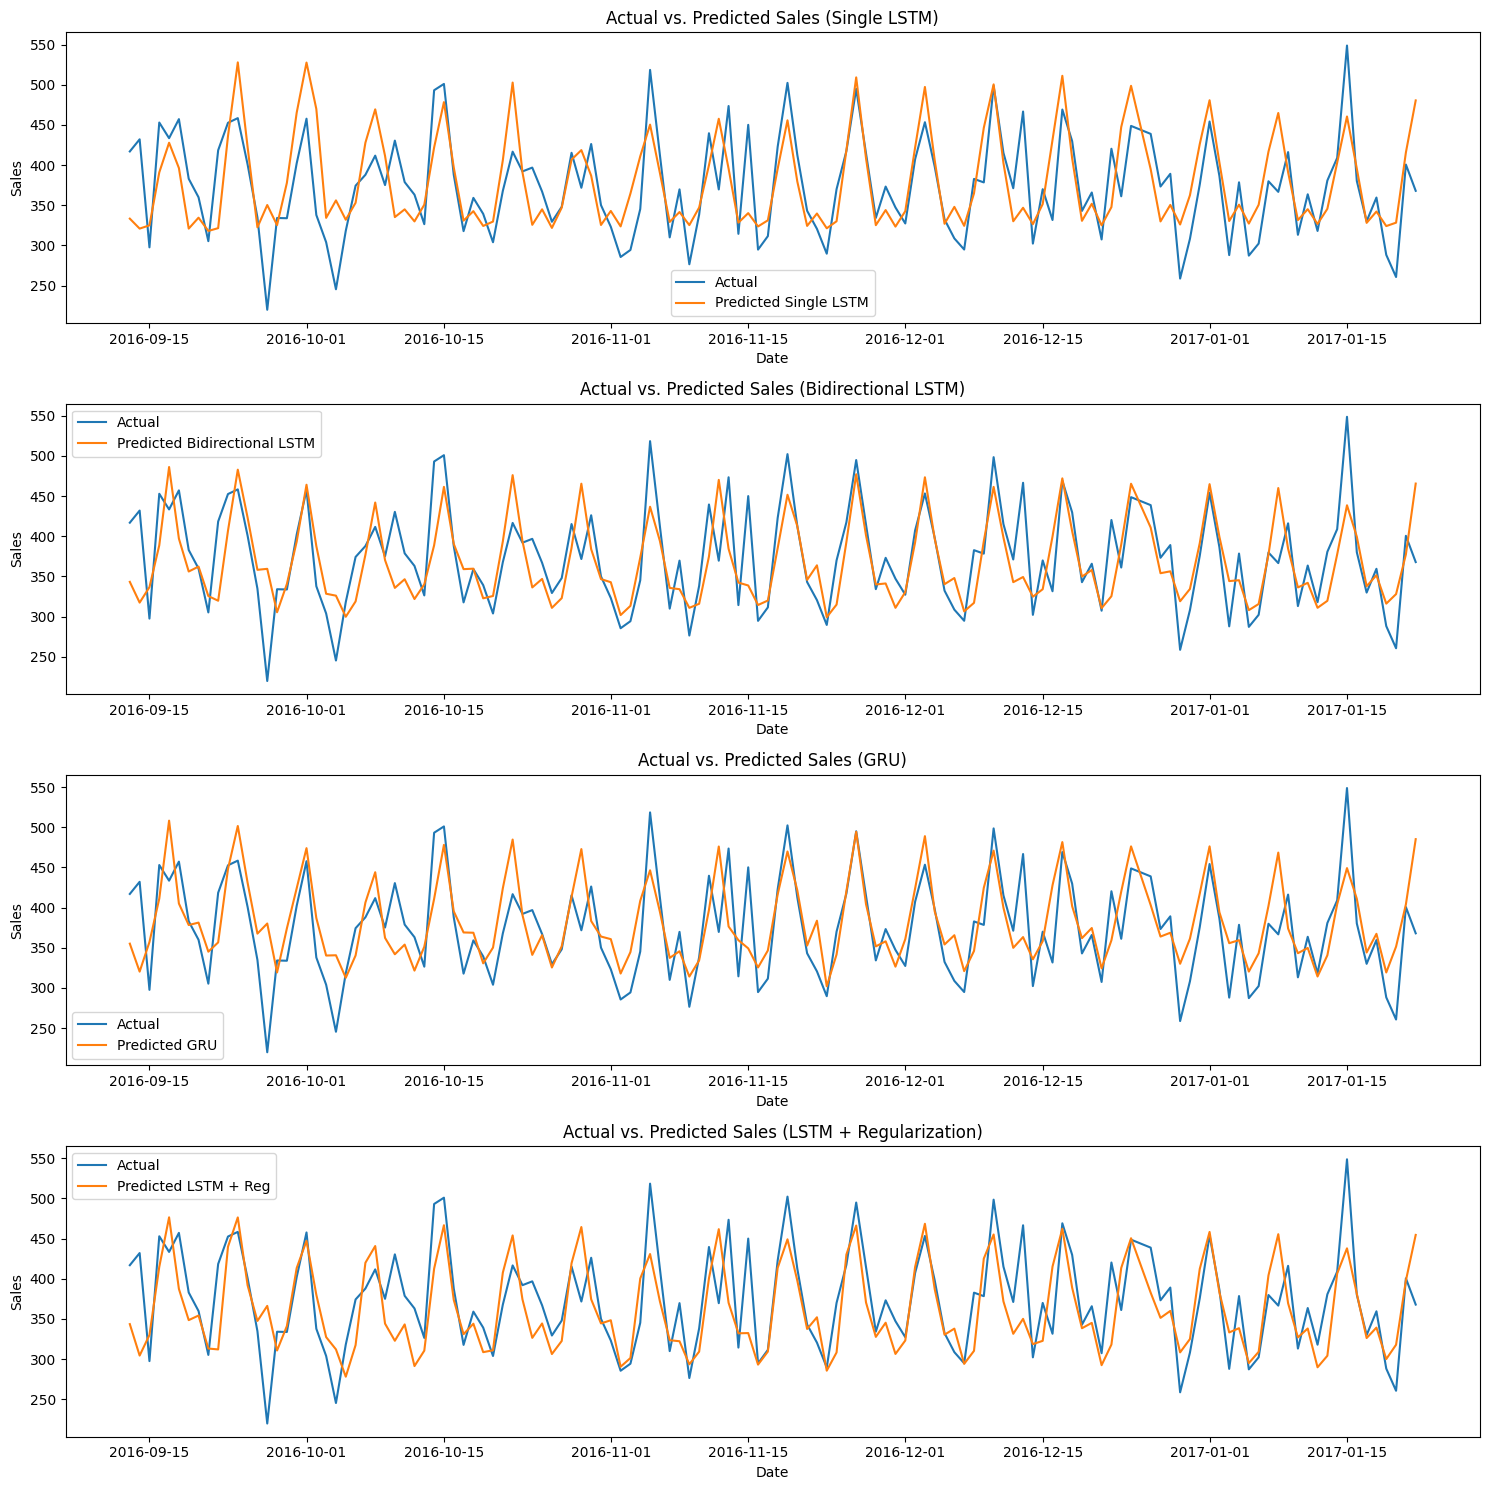

In [ ]:
# prompt: Buatlah evaluasi model LSTM tanpa menyertakan 'Perbandingan Model'

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Evaluate LSTM Model
trainPredict_lstm = model1.predict(X_train)
testPredict_lstm = model1.predict(X_test)

trainPredict_lstm = y_scaler.inverse_transform(trainPredict_lstm)
trainY_lstm = y_scaler.inverse_transform([y_train])
testPredict_lstm = y_scaler.inverse_transform(testPredict_lstm)
testY_lstm = y_scaler.inverse_transform([y_test])

# Flatten for metric calculation
testY_lstm_flat = testY_lstm[0]
testPredict_lstm_flat = testPredict_lstm[:, 0]

# Calculate metrics for the first LSTM model
lstm1_mape = mean_absolute_percentage_error(testY_lstm_flat, testPredict_lstm_flat) * 100
lstm1_mae = np.mean(np.abs(testY_lstm_flat - testPredict_lstm_flat))
lstm1_rmse = np.sqrt(mean_squared_error(testY_lstm_flat, testPredict_lstm_flat))

print("Evaluation for Single LSTM Model (with Dropout):")
print('MAPE:', lstm1_mape, '%')
print('MAE:', lstm1_mae)
print('RMSE:', lstm1_rmse)

# Evaluate Stacked LSTM Model (model1 as it was used in the code)
trainPredict_stacked = model1.predict(X_train) # This variable name is reused, be careful
testPredict_stacked = model1.predict(X_test)   # This variable name is reused, be careful

trainPredict_stacked = y_scaler.inverse_transform(trainPredict_stacked)
trainY_stacked = y_scaler.inverse_transform([y_train]) # This variable name is reused, be careful
testPredict_stacked = y_scaler.inverse_transform(testPredict_stacked)
testY_stacked = y_scaler.inverse_transform([y_test]) # This variable name is reused, be careful

# Flatten for metric calculation
testY_stacked_flat = testY_stacked[0]
testPredict_stacked_flat = testPredict_stacked[:, 0]

 # Calculate metrics for Stacked LSTM Model
stacked_mape = mean_absolute_percentage_error(testY_stacked_flat, testPredict_stacked_flat) * 100
stacked_mae = np.mean(np.abs(testY_stacked_flat - testPredict_stacked_flat))
stacked_rmse = np.sqrt(mean_squared_error(testY_stacked_flat, testPredict_stacked_flat))

print("\nEvaluation for Stacked LSTM Model:")
print('MAPE:', stacked_mape, '%')
print('MAE:', stacked_mae)
print('RMSE:', stacked_rmse)


# Evaluate Bidirectional LSTM Model
trainPredict_bi = model3.predict(X_train)
testPredict_bi = model3.predict(X_test)

trainPredict_bi = y_scaler.inverse_transform(trainPredict_bi)
trainY_bi = y_scaler.inverse_transform([y_train])
testPredict_bi = y_scaler.inverse_transform(testPredict_bi)
testY_bi = y_scaler.inverse_transform([y_test])

# Flatten for metric calculation
testY_bi_flat = testY_bi[0]
testPredict_bi_flat = testPredict_bi[:, 0]

# Calculate metrics for Bidirectional LSTM Model
bi_mape = mean_absolute_percentage_error(testY_bi_flat, testPredict_bi_flat) * 100
bi_mae = np.mean(np.abs(testY_bi_flat - testPredict_bi_flat))
bi_rmse = np.sqrt(mean_squared_error(testY_bi_flat, testPredict_bi_flat))

print("\nEvaluation for Bidirectional LSTM Model:")
print('MAPE:', bi_mape, '%')
print('MAE:', bi_mae)
print('RMSE:', bi_rmse)


# Evaluate GRU Model
trainPredict_gru = model4.predict(X_train)
testPredict_gru = model4.predict(X_test)

trainPredict_gru = y_scaler.inverse_transform(trainPredict_gru)
trainY_gru = y_scaler.inverse_transform([y_train])
testPredict_gru = y_scaler.inverse_transform(testPredict_gru)
testY_gru = y_scaler.inverse_transform([y_test])

# Flatten for metric calculation
testY_gru_flat = testY_gru[0]
testPredict_gru_flat = testPredict_gru[:, 0]

# Calculate metrics for GRU Model
gru_mape = mean_absolute_percentage_error(testY_gru_flat, testPredict_gru_flat) * 100
gru_mae = np.mean(np.abs(testY_gru_flat - testPredict_gru_flat))
gru_rmse = np.sqrt(mean_squared_error(testY_gru_flat, testPredict_gru_flat))

print("\nEvaluation for GRU Model:")
print('MAPE:', gru_mape, '%')
print('MAE:', gru_mae)
print('RMSE:', gru_rmse)

# Evaluate LSTM with BatchNormalization and Regularization (model5)
trainPredict_lstm_reg = model5.predict(X_train)
testPredict_lstm_reg = model5.predict(X_test)

trainPredict_lstm_reg = y_scaler.inverse_transform(trainPredict_lstm_reg)
trainY_lstm_reg = y_scaler.inverse_transform([y_train])
testPredict_lstm_reg = y_scaler.inverse_transform(testPredict_lstm_reg)
testY_lstm_reg = y_scaler.inverse_transform([y_test])

# Flatten for metric calculation
testY_lstm_reg_flat = testY_lstm_reg[0]
testPredict_lstm_reg_flat = testPredict_lstm_reg[:, 0]

# Calculate metrics for LSTM with BatchNormalization and Regularization
lstm_reg_mape = mean_absolute_percentage_error(testY_lstm_reg_flat, testPredict_lstm_reg_flat) * 100
lstm_reg_mae = np.mean(np.abs(testY_lstm_reg_flat - testPredict_lstm_reg_flat))
lstm_reg_rmse = np.sqrt(mean_squared_error(testY_lstm_reg_flat, testPredict_lstm_reg_flat))

print("\nEvaluation for LSTM with BatchNormalization and Regularization Model:")
print('MAPE:', lstm_reg_mape, '%')
print('MAE:', lstm_reg_mae)
print('RMSE:', lstm_reg_rmse)

# Create a DataFrame for LSTM model evaluations
lstm_evaluation_df = pd.DataFrame({
    'Metric': ['MAPE (%)', 'MAE', 'RMSE'],
    'Single LSTM': [lstm1_mape, lstm1_mae, lstm1_rmse],
    'Bidirectional LSTM': [bi_mape, bi_mae, bi_rmse],
    'GRU': [gru_mape, gru_mae, gru_rmse],
    'LSTM + Reg': [lstm_reg_mape, lstm_reg_mae, lstm_reg_rmse]
})

print("\nLSTM Model Evaluation on Test Data:")
print(lstm_evaluation_df)

# Plotting the actual vs predicted for each LSTM model
plt.figure(figsize=(15, 15))

# Single LSTM Plot
plt.subplot(4, 1, 1)
plt.plot(df_bakery_val.index[:len(testY_lstm[0])], testY_lstm[0], label='Actual')
plt.plot(df_bakery_val.index[:len(testPredict_lstm)], testPredict_lstm, label='Predicted Single LSTM')
plt.title('Actual vs. Predicted Sales (Single LSTM)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# Bidirectional LSTM Plot
plt.subplot(4, 1, 2)
plt.plot(df_bakery_val.index[:len(testY_bi[0])], testY_bi[0], label='Actual')
plt.plot(df_bakery_val.index[:len(testPredict_bi)], testPredict_bi, label='Predicted Bidirectional LSTM')
plt.title('Actual vs. Predicted Sales (Bidirectional LSTM)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# GRU Plot
plt.subplot(4, 1, 3)
plt.plot(df_bakery_val.index[:len(testY_gru[0])], testY_gru[0], label='Actual')
plt.plot(df_bakery_val.index[:len(testPredict_gru)], testPredict_gru, label='Predicted GRU')
plt.title('Actual vs. Predicted Sales (GRU)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

# LSTM with Regularization Plot
plt.subplot(4, 1, 4)
plt.plot(df_bakery_val.index[:len(testY_lstm_reg[0])], testY_lstm_reg[0], label='Actual')
plt.plot(df_bakery_val.index[:len(testPredict_lstm_reg)], testPredict_lstm_reg, label='Predicted LSTM + Reg')
plt.title('Actual vs. Predicted Sales (LSTM + Regularization)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()


plt.tight_layout()
plt.show()


### Forecasting (Optional)

# Comparison Model Based on Metrics

In [ ]:
sns.set(style="whitegrid")
data = {
    'Model': ['Arima', 'Sarima', 'LSTM', 'bidirectional LSTM', 'GRU', 'LSTM + Regularization'],
    'RMSE':  [56.6, 75.5, 49.4, 46.6, 46.3, 51.0],
    'MAE':   [41.3, 58.9, 39.8, 35.4, 35.3, 39.0],
    'MAPE':  [12.06, 16.3, 11.22, 9.53, 9.75, 10.37]
}

df_metrics = pd.DataFrame(data)
df_metrics

Model  RMSE   MAE   MAPE
0                  Arima  56.6  41.3  12.06
1                 Sarima  75.5  58.9  16.30
2                   LSTM  49.4  39.8  11.22
3     bidirectional LSTM  46.6  35.4   9.53
4                    GRU  46.3  35.3   9.75
5  LSTM + Regularization  51.0  39.0  10.37

<ipython-input-142-57feecfe724d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='Model', y=metric, data=df_metrics, palette=palettes[i])
<ipython-input-142-57feecfe724d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='Model', y=metric, data=df_metrics, palette=palettes[i])
<ipython-input-142-57feecfe724d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='Model', y=metric, data=df_metrics, palette=palettes[i])


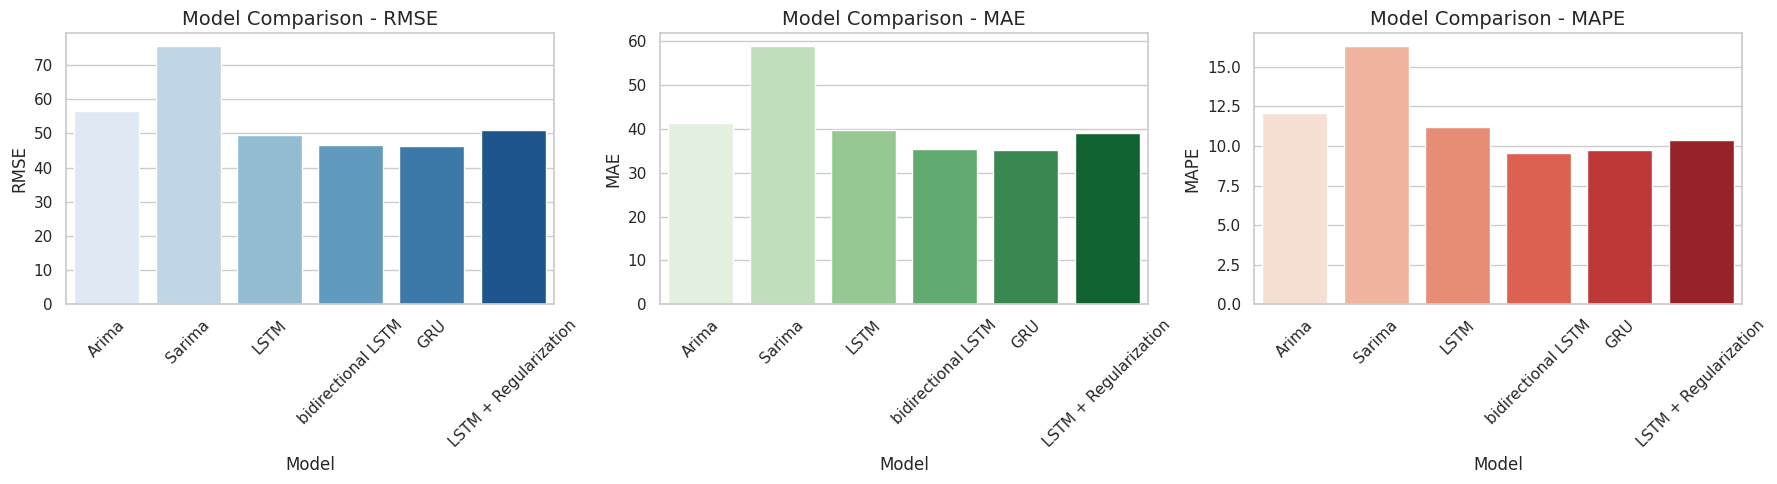

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['RMSE', 'MAE', 'MAPE']
palettes = ['Blues', 'Greens', 'Reds']

for i, metric in enumerate(metrics):
    sns.barplot(ax=axes[i], x='Model', y=metric, data=df_metrics, palette=palettes[i])
    axes[i].set_title(f'Model Comparison - {metric}', fontsize=14)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

In [ ]:
for metric in ['RMSE', 'MAE', 'MAPE']:
    best_idx = df_metrics[metric].idxmin()
    best_model = df_metrics.loc[best_idx, 'Model']
    best_value = df_metrics.loc[best_idx, metric]
    print(f"Best model for {metric}: {best_model} ({best_value})")

Best model for RMSE: GRU (46.3)
Best model for MAE: GRU (35.3)
Best model for MAPE: bidirectional LSTM (9.53)


# Forecasting The Best Model (Optional)